# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 72339 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all, max_distance=1)


  0% (    1 of 72339) |          | Elapsed Time: 0:00:31 ETA:  26 days, 10:34:02

  0% (   78 of 72339) |                    | Elapsed Time: 0:00:32 ETA:  0:15:17

  0% (  151 of 72339) |                    | Elapsed Time: 0:00:33 ETA:  0:15:42

  0% (  220 of 72339) |                    | Elapsed Time: 0:00:34 ETA:  0:16:05

  0% (  288 of 72339) |                    | Elapsed Time: 0:00:35 ETA:  0:16:21

  0% (  357 of 72339) |                    | Elapsed Time: 0:00:36 ETA:  0:16:26

  0% (  428 of 72339) |                    | Elapsed Time: 0:00:37 ETA:  0:16:25

  0% (  499 of 72339) |                    | Elapsed Time: 0:00:38 ETA:  0:16:25

  0% (  569 of 72339) |                    | Elapsed Time: 0:00:39 ETA:  0:16:26

  0% (  638 of 72339) |                    | Elapsed Time: 0:00:40 ETA:  0:16:28

  0% (  703 of 72339) |                    | Elapsed Time: 0:00:41 ETA:  0:16:46

  1% (  773 of 72339) |                    | Elapsed Time: 0:00:42 ETA:  0:16:49

  1% (  842 of 72339) |                    | Elapsed Time: 0:00:43 ETA:  0:16:48

  1% (  905 of 72339) |                    | Elapsed Time: 0:00:44 ETA:  0:16:43

  1% (  975 of 72339) |                    | Elapsed Time: 0:00:45 ETA:  0:16:41

  1% ( 1045 of 72339) |                    | Elapsed Time: 0:00:46 ETA:  0:16:42

  1% ( 1118 of 72339) |                    | Elapsed Time: 0:00:47 ETA:  0:16:36

  1% ( 1192 of 72339) |                    | Elapsed Time: 0:00:48 ETA:  0:16:29

  1% ( 1263 of 72339) |                    | Elapsed Time: 0:00:49 ETA:  0:16:25

  1% ( 1335 of 72339) |                    | Elapsed Time: 0:00:50 ETA:  0:16:12

  1% ( 1407 of 72339) |                    | Elapsed Time: 0:00:51 ETA:  0:16:08

  2% ( 1475 of 72339) |                    | Elapsed Time: 0:00:52 ETA:  0:16:10

  2% ( 1548 of 72339) |                    | Elapsed Time: 0:00:53 ETA:  0:16:05

  2% ( 1621 of 72339) |                    | Elapsed Time: 0:00:54 ETA:  0:15:59

  2% ( 1696 of 72339) |                    | Elapsed Time: 0:00:55 ETA:  0:15:49

  2% ( 1764 of 72339) |                    | Elapsed Time: 0:00:56 ETA:  0:15:57

  2% ( 1809 of 72339) |                    | Elapsed Time: 0:00:57 ETA:  0:15:59

  2% ( 1882 of 72339) |                    | Elapsed Time: 0:00:58 ETA:  0:15:53

  2% ( 1956 of 72339) |                    | Elapsed Time: 0:00:59 ETA:  0:15:49

  2% ( 2031 of 72339) |                    | Elapsed Time: 0:01:01 ETA:  0:17:34

  2% ( 2092 of 72339) |                    | Elapsed Time: 0:01:02 ETA:  0:17:44

  2% ( 2152 of 72339) |                    | Elapsed Time: 0:01:03 ETA:  0:18:08

  3% ( 2214 of 72339) |                    | Elapsed Time: 0:01:04 ETA:  0:18:29

  3% ( 2275 of 72339) |                    | Elapsed Time: 0:01:05 ETA:  0:18:56

  3% ( 2330 of 72339) |                    | Elapsed Time: 0:01:06 ETA:  0:19:22

  3% ( 2393 of 72339) |                    | Elapsed Time: 0:01:07 ETA:  0:19:31

  3% ( 2454 of 72339) |                    | Elapsed Time: 0:01:08 ETA:  0:19:57

  3% ( 2518 of 72339) |                    | Elapsed Time: 0:01:09 ETA:  0:20:19

  3% ( 2579 of 72339) |                    | Elapsed Time: 0:01:10 ETA:  0:18:44

  3% ( 2642 of 72339) |                    | Elapsed Time: 0:01:11 ETA:  0:18:40

  3% ( 2713 of 72339) |                    | Elapsed Time: 0:01:12 ETA:  0:18:34

  3% ( 2774 of 72339) |                    | Elapsed Time: 0:01:13 ETA:  0:18:33

  3% ( 2835 of 72339) |                    | Elapsed Time: 0:01:14 ETA:  0:18:18

  3% ( 2893 of 72339) |                    | Elapsed Time: 0:01:15 ETA:  0:18:29

  4% ( 2958 of 72339) |                    | Elapsed Time: 0:01:16 ETA:  0:18:17

  4% ( 3026 of 72339) |                    | Elapsed Time: 0:01:17 ETA:  0:18:08

  4% ( 3094 of 72339) |                    | Elapsed Time: 0:01:18 ETA:  0:17:52

  4% ( 3161 of 72339) |                    | Elapsed Time: 0:01:19 ETA:  0:17:43

  4% ( 3227 of 72339) |                    | Elapsed Time: 0:01:20 ETA:  0:17:37

  4% ( 3298 of 72339) |                    | Elapsed Time: 0:01:21 ETA:  0:17:20

  4% ( 3367 of 72339) |                    | Elapsed Time: 0:01:22 ETA:  0:17:04

  4% ( 3431 of 72339) |                    | Elapsed Time: 0:01:23 ETA:  0:16:58

  4% ( 3497 of 72339) |                    | Elapsed Time: 0:01:24 ETA:  0:16:44

  4% ( 3566 of 72339) |                    | Elapsed Time: 0:01:25 ETA:  0:16:36

  5% ( 3617 of 72339) |#                   | Elapsed Time: 0:01:26 ETA:  0:16:35

  5% ( 3693 of 72339) |#                   | Elapsed Time: 0:01:27 ETA:  0:16:19

  5% ( 3766 of 72339) |#                   | Elapsed Time: 0:01:28 ETA:  0:16:06

  5% ( 3835 of 72339) |#                   | Elapsed Time: 0:01:29 ETA:  0:15:59

  5% ( 3907 of 72339) |#                   | Elapsed Time: 0:01:30 ETA:  0:15:55

  5% ( 3980 of 72339) |#                   | Elapsed Time: 0:01:31 ETA:  0:15:48

  5% ( 4051 of 72339) |#                   | Elapsed Time: 0:01:32 ETA:  0:15:33

  5% ( 4124 of 72339) |#                   | Elapsed Time: 0:01:33 ETA:  0:15:21

  5% ( 4198 of 72339) |#                   | Elapsed Time: 0:01:34 ETA:  0:15:12

  5% ( 4270 of 72339) |#                   | Elapsed Time: 0:01:35 ETA:  0:15:07

  6% ( 4345 of 72339) |#                   | Elapsed Time: 0:01:36 ETA:  0:15:08

  6% ( 4418 of 72339) |#                   | Elapsed Time: 0:01:37 ETA:  0:15:07

  6% ( 4491 of 72339) |#                   | Elapsed Time: 0:01:38 ETA:  0:15:00

  6% ( 4522 of 72339) |#                   | Elapsed Time: 0:01:38 ETA:  0:15:00

  6% ( 4590 of 72339) |#                   | Elapsed Time: 0:01:39 ETA:  0:15:07

  6% ( 4664 of 72339) |#                   | Elapsed Time: 0:01:40 ETA:  0:15:02

  6% ( 4736 of 72339) |#                   | Elapsed Time: 0:01:41 ETA:  0:15:01

  6% ( 4809 of 72339) |#                   | Elapsed Time: 0:01:42 ETA:  0:15:02

  6% ( 4882 of 72339) |#                   | Elapsed Time: 0:01:43 ETA:  0:15:00

  6% ( 4952 of 72339) |#                   | Elapsed Time: 0:01:44 ETA:  0:15:08

  6% ( 5024 of 72339) |#                   | Elapsed Time: 0:01:45 ETA:  0:15:09

  7% ( 5095 of 72339) |#                   | Elapsed Time: 0:01:46 ETA:  0:15:12

  7% ( 5168 of 72339) |#                   | Elapsed Time: 0:01:47 ETA:  0:15:08

  7% ( 5235 of 72339) |#                   | Elapsed Time: 0:01:48 ETA:  0:15:09

  7% ( 5301 of 72339) |#                   | Elapsed Time: 0:01:49 ETA:  0:15:20

  7% ( 5375 of 72339) |#                   | Elapsed Time: 0:01:50 ETA:  0:15:17

  7% ( 5426 of 72339) |#                   | Elapsed Time: 0:01:52 ETA:  0:18:06

  7% ( 5486 of 72339) |#                   | Elapsed Time: 0:01:53 ETA:  0:18:27

  7% ( 5548 of 72339) |#                   | Elapsed Time: 0:01:54 ETA:  0:18:49

  7% ( 5609 of 72339) |#                   | Elapsed Time: 0:01:55 ETA:  0:19:14

  7% ( 5668 of 72339) |#                   | Elapsed Time: 0:01:56 ETA:  0:19:47

  7% ( 5730 of 72339) |#                   | Elapsed Time: 0:01:57 ETA:  0:20:00

  8% ( 5792 of 72339) |#                   | Elapsed Time: 0:01:58 ETA:  0:20:11

  8% ( 5852 of 72339) |#                   | Elapsed Time: 0:01:59 ETA:  0:20:51

  8% ( 5916 of 72339) |#                   | Elapsed Time: 0:02:00 ETA:  0:17:53

  8% ( 5975 of 72339) |#                   | Elapsed Time: 0:02:01 ETA:  0:17:57

  8% ( 6037 of 72339) |#                   | Elapsed Time: 0:02:02 ETA:  0:17:53

  8% ( 6107 of 72339) |#                   | Elapsed Time: 0:02:03 ETA:  0:17:35

  8% ( 6170 of 72339) |#                   | Elapsed Time: 0:02:05 ETA:  0:17:30

  8% ( 6245 of 72339) |#                   | Elapsed Time: 0:02:06 ETA:  0:16:57

  8% ( 6311 of 72339) |#                   | Elapsed Time: 0:02:07 ETA:  0:16:48

  8% ( 6330 of 72339) |#                   | Elapsed Time: 0:02:07 ETA:  0:16:40

  8% ( 6388 of 72339) |#                   | Elapsed Time: 0:02:08 ETA:  0:16:41

  8% ( 6454 of 72339) |#                   | Elapsed Time: 0:02:09 ETA:  0:16:36

  9% ( 6522 of 72339) |#                   | Elapsed Time: 0:02:10 ETA:  0:16:15

  9% ( 6588 of 72339) |#                   | Elapsed Time: 0:02:11 ETA:  0:16:04

  9% ( 6656 of 72339) |#                   | Elapsed Time: 0:02:12 ETA:  0:16:07

  9% ( 6724 of 72339) |#                   | Elapsed Time: 0:02:13 ETA:  0:15:55

  9% ( 6793 of 72339) |#                   | Elapsed Time: 0:02:14 ETA:  0:16:06

  9% ( 6860 of 72339) |#                   | Elapsed Time: 0:02:15 ETA:  0:16:03

  9% ( 6935 of 72339) |#                   | Elapsed Time: 0:02:16 ETA:  0:15:46

  9% ( 7011 of 72339) |#                   | Elapsed Time: 0:02:17 ETA:  0:15:14

  9% ( 7091 of 72339) |#                   | Elapsed Time: 0:02:18 ETA:  0:14:50

  9% ( 7171 of 72339) |#                   | Elapsed Time: 0:02:19 ETA:  0:14:30

 10% ( 7234 of 72339) |##                  | Elapsed Time: 0:02:20 ETA:  0:14:34

 10% ( 7300 of 72339) |##                  | Elapsed Time: 0:02:21 ETA:  0:14:35

 10% ( 7371 of 72339) |##                  | Elapsed Time: 0:02:22 ETA:  0:14:30

 10% ( 7443 of 72339) |##                  | Elapsed Time: 0:02:23 ETA:  0:14:25

 10% ( 7511 of 72339) |##                  | Elapsed Time: 0:02:24 ETA:  0:14:22

 10% ( 7579 of 72339) |##                  | Elapsed Time: 0:02:25 ETA:  0:14:34

 10% ( 7646 of 72339) |##                  | Elapsed Time: 0:02:26 ETA:  0:14:48

 10% ( 7708 of 72339) |##                  | Elapsed Time: 0:02:27 ETA:  0:15:16

 10% ( 7775 of 72339) |##                  | Elapsed Time: 0:02:28 ETA:  0:15:38

 10% ( 7836 of 72339) |##                  | Elapsed Time: 0:02:29 ETA:  0:15:42

 10% ( 7902 of 72339) |##                  | Elapsed Time: 0:02:30 ETA:  0:15:42

 11% ( 7965 of 72339) |##                  | Elapsed Time: 0:02:31 ETA:  0:15:57

 11% ( 8031 of 72339) |##                  | Elapsed Time: 0:02:32 ETA:  0:16:06

 11% ( 8101 of 72339) |##                  | Elapsed Time: 0:02:33 ETA:  0:16:01

 11% ( 8139 of 72339) |##                  | Elapsed Time: 0:02:34 ETA:  0:15:59

 11% ( 8207 of 72339) |##                  | Elapsed Time: 0:02:35 ETA:  0:15:55

 11% ( 8271 of 72339) |##                  | Elapsed Time: 0:02:36 ETA:  0:15:51

 11% ( 8340 of 72339) |##                  | Elapsed Time: 0:02:37 ETA:  0:15:46

 11% ( 8409 of 72339) |##                  | Elapsed Time: 0:02:38 ETA:  0:15:30

 11% ( 8478 of 72339) |##                  | Elapsed Time: 0:02:39 ETA:  0:15:22

 11% ( 8545 of 72339) |##                  | Elapsed Time: 0:02:40 ETA:  0:15:13

 11% ( 8614 of 72339) |##                  | Elapsed Time: 0:02:41 ETA:  0:15:06

 12% ( 8682 of 72339) |##                  | Elapsed Time: 0:02:42 ETA:  0:15:10

 12% ( 8751 of 72339) |##                  | Elapsed Time: 0:02:43 ETA:  0:15:10

 12% ( 8822 of 72339) |##                  | Elapsed Time: 0:02:44 ETA:  0:15:05

 12% ( 8892 of 72339) |##                  | Elapsed Time: 0:02:45 ETA:  0:14:52

 12% ( 8964 of 72339) |##                  | Elapsed Time: 0:02:46 ETA:  0:14:47

 12% ( 9043 of 72339) |##                  | Elapsed Time: 0:02:47 ETA:  0:14:42

 12% ( 9115 of 72339) |##                  | Elapsed Time: 0:02:48 ETA:  0:14:32

 12% ( 9186 of 72339) |##                  | Elapsed Time: 0:02:49 ETA:  0:14:27

 12% ( 9261 of 72339) |##                  | Elapsed Time: 0:02:50 ETA:  0:14:12

 12% ( 9334 of 72339) |##                  | Elapsed Time: 0:02:51 ETA:  0:14:03

 12% ( 9403 of 72339) |##                  | Elapsed Time: 0:02:52 ETA:  0:14:05

 13% ( 9476 of 72339) |##                  | Elapsed Time: 0:02:53 ETA:  0:13:59

 13% ( 9547 of 72339) |##                  | Elapsed Time: 0:02:54 ETA:  0:13:59

 13% ( 9620 of 72339) |##                  | Elapsed Time: 0:02:55 ETA:  0:13:54

 13% ( 9630 of 72339) |##                  | Elapsed Time: 0:02:57 ETA:  0:17:18

 13% ( 9700 of 72339) |##                  | Elapsed Time: 0:02:58 ETA:  0:17:21

 13% ( 9763 of 72339) |##                  | Elapsed Time: 0:02:59 ETA:  0:17:38

 13% ( 9824 of 72339) |##                  | Elapsed Time: 0:03:00 ETA:  0:18:09

 13% ( 9882 of 72339) |##                  | Elapsed Time: 0:03:01 ETA:  0:18:43

 13% ( 9947 of 72339) |##                  | Elapsed Time: 0:03:02 ETA:  0:20:11

 13% (10001 of 72339) |##                  | Elapsed Time: 0:03:03 ETA:  0:21:01

 13% (10059 of 72339) |##                  | Elapsed Time: 0:03:04 ETA:  0:21:47

 14% (10129 of 72339) |##                  | Elapsed Time: 0:03:05 ETA:  0:16:50

 14% (10198 of 72339) |##                  | Elapsed Time: 0:03:06 ETA:  0:16:51

 14% (10266 of 72339) |##                  | Elapsed Time: 0:03:07 ETA:  0:16:36

 14% (10342 of 72339) |##                  | Elapsed Time: 0:03:08 ETA:  0:16:00

 14% (10416 of 72339) |##                  | Elapsed Time: 0:03:09 ETA:  0:15:25

 14% (10491 of 72339) |##                  | Elapsed Time: 0:03:10 ETA:  0:14:42

 14% (10562 of 72339) |##                  | Elapsed Time: 0:03:11 ETA:  0:14:31

 14% (10632 of 72339) |##                  | Elapsed Time: 0:03:12 ETA:  0:14:03

 14% (10706 of 72339) |##                  | Elapsed Time: 0:03:13 ETA:  0:13:37

 14% (10778 of 72339) |##                  | Elapsed Time: 0:03:14 ETA:  0:13:34

 15% (10851 of 72339) |###                 | Elapsed Time: 0:03:15 ETA:  0:13:23

 15% (10924 of 72339) |###                 | Elapsed Time: 0:03:16 ETA:  0:13:27

 15% (10994 of 72339) |###                 | Elapsed Time: 0:03:17 ETA:  0:13:33

 15% (11069 of 72339) |###                 | Elapsed Time: 0:03:18 ETA:  0:13:33

 15% (11142 of 72339) |###                 | Elapsed Time: 0:03:19 ETA:  0:13:29

 15% (11215 of 72339) |###                 | Elapsed Time: 0:03:20 ETA:  0:13:22

 15% (11287 of 72339) |###                 | Elapsed Time: 0:03:21 ETA:  0:13:26

 15% (11359 of 72339) |###                 | Elapsed Time: 0:03:22 ETA:  0:13:24

 15% (11431 of 72339) |###                 | Elapsed Time: 0:03:23 ETA:  0:13:21

 15% (11503 of 72339) |###                 | Elapsed Time: 0:03:24 ETA:  0:13:20

 15% (11574 of 72339) |###                 | Elapsed Time: 0:03:25 ETA:  0:13:22

 16% (11646 of 72339) |###                 | Elapsed Time: 0:03:26 ETA:  0:13:19

 16% (11717 of 72339) |###                 | Elapsed Time: 0:03:27 ETA:  0:13:25

 16% (11756 of 72339) |###                 | Elapsed Time: 0:03:28 ETA:  0:13:24

 16% (11827 of 72339) |###                 | Elapsed Time: 0:03:29 ETA:  0:13:27

 16% (11895 of 72339) |###                 | Elapsed Time: 0:03:30 ETA:  0:13:32

 16% (11956 of 72339) |###                 | Elapsed Time: 0:03:31 ETA:  0:13:50

 16% (12025 of 72339) |###                 | Elapsed Time: 0:03:32 ETA:  0:13:55

 16% (12092 of 72339) |###                 | Elapsed Time: 0:03:33 ETA:  0:14:04

 16% (12160 of 72339) |###                 | Elapsed Time: 0:03:34 ETA:  0:14:08

 16% (12219 of 72339) |###                 | Elapsed Time: 0:03:35 ETA:  0:14:31

 16% (12289 of 72339) |###                 | Elapsed Time: 0:03:36 ETA:  0:14:31

 17% (12359 of 72339) |###                 | Elapsed Time: 0:03:37 ETA:  0:14:31

 17% (12430 of 72339) |###                 | Elapsed Time: 0:03:38 ETA:  0:14:31

 17% (12501 of 72339) |###                 | Elapsed Time: 0:03:39 ETA:  0:14:26

 17% (12565 of 72339) |###                 | Elapsed Time: 0:03:40 ETA:  0:14:18

 17% (12634 of 72339) |###                 | Elapsed Time: 0:03:41 ETA:  0:14:17

 17% (12660 of 72339) |###                 | Elapsed Time: 0:03:41 ETA:  0:14:16

 17% (12728 of 72339) |###                 | Elapsed Time: 0:03:42 ETA:  0:14:16

 17% (12789 of 72339) |###                 | Elapsed Time: 0:03:43 ETA:  0:14:12

 17% (12859 of 72339) |###                 | Elapsed Time: 0:03:44 ETA:  0:14:10

 17% (12927 of 72339) |###                 | Elapsed Time: 0:03:45 ETA:  0:14:12

 17% (12995 of 72339) |###                 | Elapsed Time: 0:03:46 ETA:  0:14:17

 18% (13065 of 72339) |###                 | Elapsed Time: 0:03:47 ETA:  0:14:16

 18% (13137 of 72339) |###                 | Elapsed Time: 0:03:48 ETA:  0:14:01

 18% (13204 of 72339) |###                 | Elapsed Time: 0:03:49 ETA:  0:14:04

 18% (13276 of 72339) |###                 | Elapsed Time: 0:03:50 ETA:  0:13:55

 18% (13344 of 72339) |###                 | Elapsed Time: 0:03:51 ETA:  0:13:53

 18% (13416 of 72339) |###                 | Elapsed Time: 0:03:52 ETA:  0:13:32

 18% (13485 of 72339) |###                 | Elapsed Time: 0:03:53 ETA:  0:13:33

 18% (13564 of 72339) |###                 | Elapsed Time: 0:03:54 ETA:  0:13:22

 18% (13636 of 72339) |###                 | Elapsed Time: 0:03:55 ETA:  0:13:19

 18% (13710 of 72339) |###                 | Elapsed Time: 0:03:56 ETA:  0:13:12

 19% (13779 of 72339) |###                 | Elapsed Time: 0:03:57 ETA:  0:13:07

 19% (13851 of 72339) |###                 | Elapsed Time: 0:03:58 ETA:  0:13:04

 19% (13927 of 72339) |###                 | Elapsed Time: 0:03:59 ETA:  0:12:50

 19% (14003 of 72339) |###                 | Elapsed Time: 0:04:00 ETA:  0:12:42

 19% (14077 of 72339) |###                 | Elapsed Time: 0:04:01 ETA:  0:12:34

 19% (14140 of 72339) |###                 | Elapsed Time: 0:04:02 ETA:  0:12:46

 19% (14210 of 72339) |###                 | Elapsed Time: 0:04:03 ETA:  0:12:49

 19% (14281 of 72339) |###                 | Elapsed Time: 0:04:04 ETA:  0:12:50

 19% (14349 of 72339) |###                 | Elapsed Time: 0:04:05 ETA:  0:12:59

 19% (14420 of 72339) |###                 | Elapsed Time: 0:04:06 ETA:  0:12:55

 20% (14468 of 72339) |####                | Elapsed Time: 0:04:07 ETA:  0:12:58

 20% (14534 of 72339) |####                | Elapsed Time: 0:04:08 ETA:  0:13:13

 20% (14598 of 72339) |####                | Elapsed Time: 0:04:09 ETA:  0:13:34

 20% (14668 of 72339) |####                | Elapsed Time: 0:04:10 ETA:  0:13:40

 20% (14737 of 72339) |####                | Elapsed Time: 0:04:11 ETA:  0:13:27

 20% (14805 of 72339) |####                | Elapsed Time: 0:04:12 ETA:  0:13:31

 20% (14847 of 72339) |####                | Elapsed Time: 0:04:15 ETA:  0:17:40

 20% (14909 of 72339) |####                | Elapsed Time: 0:04:16 ETA:  0:17:53

 20% (14965 of 72339) |####                | Elapsed Time: 0:04:17 ETA:  0:18:29

 20% (15032 of 72339) |####                | Elapsed Time: 0:04:18 ETA:  0:18:23

 20% (15100 of 72339) |####                | Elapsed Time: 0:04:19 ETA:  0:18:17

 20% (15169 of 72339) |####                | Elapsed Time: 0:04:20 ETA:  0:18:05

 21% (15241 of 72339) |####                | Elapsed Time: 0:04:21 ETA:  0:17:59

 21% (15299 of 72339) |####                | Elapsed Time: 0:04:22 ETA:  0:18:25

 21% (15373 of 72339) |####                | Elapsed Time: 0:04:23 ETA:  0:14:26

 21% (15440 of 72339) |####                | Elapsed Time: 0:04:24 ETA:  0:14:14

 21% (15508 of 72339) |####                | Elapsed Time: 0:04:25 ETA:  0:13:49

 21% (15568 of 72339) |####                | Elapsed Time: 0:04:26 ETA:  0:14:02

 21% (15639 of 72339) |####                | Elapsed Time: 0:04:27 ETA:  0:13:56

 21% (15702 of 72339) |####                | Elapsed Time: 0:04:28 ETA:  0:14:05

 21% (15773 of 72339) |####                | Elapsed Time: 0:04:29 ETA:  0:14:07

 21% (15839 of 72339) |####                | Elapsed Time: 0:04:30 ETA:  0:13:49

 21% (15906 of 72339) |####                | Elapsed Time: 0:04:31 ETA:  0:13:41

 22% (15971 of 72339) |####                | Elapsed Time: 0:04:32 ETA:  0:13:45

 22% (16038 of 72339) |####                | Elapsed Time: 0:04:33 ETA:  0:13:43

 22% (16101 of 72339) |####                | Elapsed Time: 0:04:34 ETA:  0:13:49

 22% (16162 of 72339) |####                | Elapsed Time: 0:04:35 ETA:  0:13:46

 22% (16229 of 72339) |####                | Elapsed Time: 0:04:36 ETA:  0:13:52

 22% (16277 of 72339) |####                | Elapsed Time: 0:04:37 ETA:  0:13:45

 22% (16344 of 72339) |####                | Elapsed Time: 0:04:38 ETA:  0:13:52

 22% (16414 of 72339) |####                | Elapsed Time: 0:04:39 ETA:  0:13:44

 22% (16480 of 72339) |####                | Elapsed Time: 0:04:40 ETA:  0:13:43

 22% (16547 of 72339) |####                | Elapsed Time: 0:04:41 ETA:  0:13:39

 22% (16614 of 72339) |####                | Elapsed Time: 0:04:42 ETA:  0:13:39

 23% (16683 of 72339) |####                | Elapsed Time: 0:04:43 ETA:  0:13:27

 23% (16749 of 72339) |####                | Elapsed Time: 0:04:44 ETA:  0:13:17

 23% (16812 of 72339) |####                | Elapsed Time: 0:04:45 ETA:  0:13:23

 23% (16876 of 72339) |####                | Elapsed Time: 0:04:46 ETA:  0:13:28

 23% (16942 of 72339) |####                | Elapsed Time: 0:04:47 ETA:  0:13:28

 23% (17010 of 72339) |####                | Elapsed Time: 0:04:48 ETA:  0:13:30

 23% (17077 of 72339) |####                | Elapsed Time: 0:04:49 ETA:  0:13:27

 23% (17140 of 72339) |####                | Elapsed Time: 0:04:50 ETA:  0:13:32

 23% (17181 of 72339) |####                | Elapsed Time: 0:04:50 ETA:  0:13:31

 23% (17243 of 72339) |####                | Elapsed Time: 0:04:51 ETA:  0:13:43

 23% (17308 of 72339) |####                | Elapsed Time: 0:04:52 ETA:  0:13:45

 24% (17379 of 72339) |####                | Elapsed Time: 0:04:53 ETA:  0:13:29

 24% (17449 of 72339) |####                | Elapsed Time: 0:04:54 ETA:  0:13:15

 24% (17510 of 72339) |####                | Elapsed Time: 0:04:55 ETA:  0:13:25

 24% (17565 of 72339) |####                | Elapsed Time: 0:04:56 ETA:  0:13:49

 24% (17628 of 72339) |####                | Elapsed Time: 0:04:57 ETA:  0:13:58

 24% (17696 of 72339) |####                | Elapsed Time: 0:04:58 ETA:  0:13:47

 24% (17757 of 72339) |####                | Elapsed Time: 0:04:59 ETA:  0:13:57

 24% (17807 of 72339) |####                | Elapsed Time: 0:05:00 ETA:  0:14:20

 24% (17870 of 72339) |####                | Elapsed Time: 0:05:01 ETA:  0:14:24

 24% (17937 of 72339) |####                | Elapsed Time: 0:05:02 ETA:  0:14:31

 24% (18006 of 72339) |####                | Elapsed Time: 0:05:03 ETA:  0:14:32

 25% (18085 of 72339) |#####               | Elapsed Time: 0:05:05 ETA:  0:14:00

 25% (18144 of 72339) |#####               | Elapsed Time: 0:05:06 ETA:  0:14:08

 25% (18208 of 72339) |#####               | Elapsed Time: 0:05:07 ETA:  0:14:16

 25% (18265 of 72339) |#####               | Elapsed Time: 0:05:08 ETA:  0:14:25

 25% (18327 of 72339) |#####               | Elapsed Time: 0:05:09 ETA:  0:13:56

 25% (18388 of 72339) |#####               | Elapsed Time: 0:05:10 ETA:  0:13:58

 25% (18450 of 72339) |#####               | Elapsed Time: 0:05:11 ETA:  0:14:08

 25% (18511 of 72339) |#####               | Elapsed Time: 0:05:12 ETA:  0:14:27

 25% (18579 of 72339) |#####               | Elapsed Time: 0:05:13 ETA:  0:14:24

 25% (18648 of 72339) |#####               | Elapsed Time: 0:05:14 ETA:  0:14:10

 25% (18722 of 72339) |#####               | Elapsed Time: 0:05:15 ETA:  0:13:38

 25% (18795 of 72339) |#####               | Elapsed Time: 0:05:16 ETA:  0:13:18

 26% (18865 of 72339) |#####               | Elapsed Time: 0:05:17 ETA:  0:12:53

 26% (18935 of 72339) |#####               | Elapsed Time: 0:05:18 ETA:  0:12:38

 26% (18989 of 72339) |#####               | Elapsed Time: 0:05:19 ETA:  0:12:25

 26% (19062 of 72339) |#####               | Elapsed Time: 0:05:20 ETA:  0:12:06

 26% (19129 of 72339) |#####               | Elapsed Time: 0:05:21 ETA:  0:11:55

 26% (19201 of 72339) |#####               | Elapsed Time: 0:05:22 ETA:  0:11:48

 26% (19273 of 72339) |#####               | Elapsed Time: 0:05:23 ETA:  0:11:41

 26% (19343 of 72339) |#####               | Elapsed Time: 0:05:24 ETA:  0:11:47

 26% (19415 of 72339) |#####               | Elapsed Time: 0:05:25 ETA:  0:11:50

 26% (19488 of 72339) |#####               | Elapsed Time: 0:05:26 ETA:  0:11:44

 27% (19557 of 72339) |#####               | Elapsed Time: 0:05:27 ETA:  0:11:46

 27% (19625 of 72339) |#####               | Elapsed Time: 0:05:28 ETA:  0:11:45

 27% (19690 of 72339) |#####               | Elapsed Time: 0:05:29 ETA:  0:11:57

 27% (19759 of 72339) |#####               | Elapsed Time: 0:05:30 ETA:  0:11:52

 27% (19833 of 72339) |#####               | Elapsed Time: 0:05:31 ETA:  0:11:47

 27% (19894 of 72339) |#####               | Elapsed Time: 0:05:32 ETA:  0:11:58

 27% (19962 of 72339) |#####               | Elapsed Time: 0:05:33 ETA:  0:12:00

 27% (20033 of 72339) |#####               | Elapsed Time: 0:05:34 ETA:  0:12:01

 27% (20110 of 72339) |#####               | Elapsed Time: 0:05:35 ETA:  0:11:52

 27% (20188 of 72339) |#####               | Elapsed Time: 0:05:36 ETA:  0:11:35

 28% (20260 of 72339) |#####               | Elapsed Time: 0:05:37 ETA:  0:11:28

 28% (20338 of 72339) |#####               | Elapsed Time: 0:05:38 ETA:  0:11:06

 28% (20411 of 72339) |#####               | Elapsed Time: 0:05:39 ETA:  0:11:00

 28% (20486 of 72339) |#####               | Elapsed Time: 0:05:40 ETA:  0:10:57

 28% (20559 of 72339) |#####               | Elapsed Time: 0:05:41 ETA:  0:10:44

 28% (20622 of 72339) |#####               | Elapsed Time: 0:05:42 ETA:  0:10:50

 28% (20697 of 72339) |#####               | Elapsed Time: 0:05:43 ETA:  0:10:43

 28% (20778 of 72339) |#####               | Elapsed Time: 0:05:44 ETA:  0:10:37

 28% (20798 of 72339) |#####               | Elapsed Time: 0:05:44 ETA:  0:10:41

 28% (20872 of 72339) |#####               | Elapsed Time: 0:05:45 ETA:  0:10:36

 28% (20942 of 72339) |#####               | Elapsed Time: 0:05:46 ETA:  0:10:48

 29% (21011 of 72339) |#####               | Elapsed Time: 0:05:47 ETA:  0:10:54

 29% (21084 of 72339) |#####               | Elapsed Time: 0:05:48 ETA:  0:10:56

 29% (21153 of 72339) |#####               | Elapsed Time: 0:05:49 ETA:  0:11:03

 29% (21223 of 72339) |#####               | Elapsed Time: 0:05:50 ETA:  0:10:50

 29% (21264 of 72339) |#####               | Elapsed Time: 0:05:53 ETA:  0:16:21

 29% (21338 of 72339) |#####               | Elapsed Time: 0:05:54 ETA:  0:16:37

 29% (21409 of 72339) |#####               | Elapsed Time: 0:05:55 ETA:  0:16:13

 29% (21483 of 72339) |#####               | Elapsed Time: 0:05:56 ETA:  0:16:12

 29% (21555 of 72339) |#####               | Elapsed Time: 0:05:57 ETA:  0:16:07

 29% (21632 of 72339) |#####               | Elapsed Time: 0:05:58 ETA:  0:15:49

 30% (21702 of 72339) |######              | Elapsed Time: 0:05:59 ETA:  0:15:46

 30% (21771 of 72339) |######              | Elapsed Time: 0:06:00 ETA:  0:15:45

 30% (21834 of 72339) |######              | Elapsed Time: 0:06:01 ETA:  0:15:59

 30% (21900 of 72339) |######              | Elapsed Time: 0:06:02 ETA:  0:11:01

 30% (21979 of 72339) |######              | Elapsed Time: 0:06:03 ETA:  0:10:52

 30% (22053 of 72339) |######              | Elapsed Time: 0:06:04 ETA:  0:10:46

 30% (22119 of 72339) |######              | Elapsed Time: 0:06:05 ETA:  0:10:56

 30% (22189 of 72339) |######              | Elapsed Time: 0:06:06 ETA:  0:10:59

 30% (22254 of 72339) |######              | Elapsed Time: 0:06:07 ETA:  0:11:18

 30% (22328 of 72339) |######              | Elapsed Time: 0:06:08 ETA:  0:11:18

 30% (22400 of 72339) |######              | Elapsed Time: 0:06:09 ETA:  0:11:12

 31% (22474 of 72339) |######              | Elapsed Time: 0:06:10 ETA:  0:10:53

 31% (22547 of 72339) |######              | Elapsed Time: 0:06:11 ETA:  0:10:42

 31% (22606 of 72339) |######              | Elapsed Time: 0:06:12 ETA:  0:10:59

 31% (22679 of 72339) |######              | Elapsed Time: 0:06:13 ETA:  0:11:00

 31% (22749 of 72339) |######              | Elapsed Time: 0:06:14 ETA:  0:10:53

 31% (22817 of 72339) |######              | Elapsed Time: 0:06:15 ETA:  0:10:57

 31% (22884 of 72339) |######              | Elapsed Time: 0:06:16 ETA:  0:10:53

 31% (22954 of 72339) |######              | Elapsed Time: 0:06:17 ETA:  0:10:58

 31% (23025 of 72339) |######              | Elapsed Time: 0:06:18 ETA:  0:10:58

 31% (23087 of 72339) |######              | Elapsed Time: 0:06:19 ETA:  0:11:18

 32% (23154 of 72339) |######              | Elapsed Time: 0:06:20 ETA:  0:11:27

 32% (23227 of 72339) |######              | Elapsed Time: 0:06:21 ETA:  0:11:15

 32% (23297 of 72339) |######              | Elapsed Time: 0:06:22 ETA:  0:11:20

 32% (23367 of 72339) |######              | Elapsed Time: 0:06:23 ETA:  0:11:18

 32% (23433 of 72339) |######              | Elapsed Time: 0:06:24 ETA:  0:11:20

 32% (23511 of 72339) |######              | Elapsed Time: 0:06:25 ETA:  0:11:21

 32% (23580 of 72339) |######              | Elapsed Time: 0:06:26 ETA:  0:11:24

 32% (23647 of 72339) |######              | Elapsed Time: 0:06:27 ETA:  0:11:13

 32% (23703 of 72339) |######              | Elapsed Time: 0:06:28 ETA:  0:11:34

 32% (23773 of 72339) |######              | Elapsed Time: 0:06:29 ETA:  0:11:39

 32% (23836 of 72339) |######              | Elapsed Time: 0:06:30 ETA:  0:11:52

 33% (23906 of 72339) |######              | Elapsed Time: 0:06:31 ETA:  0:11:51

 33% (23976 of 72339) |######              | Elapsed Time: 0:06:32 ETA:  0:11:43

 33% (24046 of 72339) |######              | Elapsed Time: 0:06:33 ETA:  0:11:34

 33% (24113 of 72339) |######              | Elapsed Time: 0:06:34 ETA:  0:11:35

 33% (24183 of 72339) |######              | Elapsed Time: 0:06:35 ETA:  0:11:31

 33% (24258 of 72339) |######              | Elapsed Time: 0:06:36 ETA:  0:11:16

 33% (24330 of 72339) |######              | Elapsed Time: 0:06:37 ETA:  0:10:48

 33% (24415 of 72339) |######              | Elapsed Time: 0:06:39 ETA:  0:10:23

 33% (24491 of 72339) |######              | Elapsed Time: 0:06:40 ETA:  0:10:11

 33% (24567 of 72339) |######              | Elapsed Time: 0:06:41 ETA:  0:10:00

 34% (24637 of 72339) |######              | Elapsed Time: 0:06:42 ETA:  0:09:59

 34% (24707 of 72339) |######              | Elapsed Time: 0:06:43 ETA:  0:09:53

 34% (24777 of 72339) |######              | Elapsed Time: 0:06:44 ETA:  0:09:52

 34% (24845 of 72339) |######              | Elapsed Time: 0:06:45 ETA:  0:10:02

 34% (24917 of 72339) |######              | Elapsed Time: 0:06:46 ETA:  0:10:01

 34% (24991 of 72339) |######              | Elapsed Time: 0:06:47 ETA:  0:10:06

 34% (25065 of 72339) |######              | Elapsed Time: 0:06:48 ETA:  0:10:00

 34% (25136 of 72339) |######              | Elapsed Time: 0:06:49 ETA:  0:10:07

 34% (25208 of 72339) |######              | Elapsed Time: 0:06:50 ETA:  0:10:11

 34% (25280 of 72339) |######              | Elapsed Time: 0:06:51 ETA:  0:10:06

 35% (25319 of 72339) |#######             | Elapsed Time: 0:06:51 ETA:  0:10:16

 35% (25378 of 72339) |#######             | Elapsed Time: 0:06:52 ETA:  0:10:34

 35% (25446 of 72339) |#######             | Elapsed Time: 0:06:53 ETA:  0:10:34

 35% (25515 of 72339) |#######             | Elapsed Time: 0:06:54 ETA:  0:10:38

 35% (25581 of 72339) |#######             | Elapsed Time: 0:06:55 ETA:  0:10:51

 35% (25647 of 72339) |#######             | Elapsed Time: 0:06:56 ETA:  0:11:05

 35% (25717 of 72339) |#######             | Elapsed Time: 0:06:57 ETA:  0:11:05

 35% (25786 of 72339) |#######             | Elapsed Time: 0:06:58 ETA:  0:11:11

 35% (25858 of 72339) |#######             | Elapsed Time: 0:06:59 ETA:  0:11:10

 35% (25928 of 72339) |#######             | Elapsed Time: 0:07:00 ETA:  0:10:55

 35% (26003 of 72339) |#######             | Elapsed Time: 0:07:01 ETA:  0:10:27

 36% (26073 of 72339) |#######             | Elapsed Time: 0:07:02 ETA:  0:10:21

 36% (26140 of 72339) |#######             | Elapsed Time: 0:07:03 ETA:  0:10:23

 36% (26210 of 72339) |#######             | Elapsed Time: 0:07:04 ETA:  0:10:16

 36% (26223 of 72339) |#######             | Elapsed Time: 0:07:05 ETA:  0:10:13

 36% (26285 of 72339) |#######             | Elapsed Time: 0:07:06 ETA:  0:10:27

 36% (26348 of 72339) |#######             | Elapsed Time: 0:07:07 ETA:  0:10:36

 36% (26417 of 72339) |#######             | Elapsed Time: 0:07:08 ETA:  0:10:40

 36% (26483 of 72339) |#######             | Elapsed Time: 0:07:09 ETA:  0:10:47

 36% (26556 of 72339) |#######             | Elapsed Time: 0:07:10 ETA:  0:10:50

 36% (26628 of 72339) |#######             | Elapsed Time: 0:07:11 ETA:  0:10:46

 36% (26698 of 72339) |#######             | Elapsed Time: 0:07:12 ETA:  0:10:41

 36% (26760 of 72339) |#######             | Elapsed Time: 0:07:13 ETA:  0:10:56

 37% (26834 of 72339) |#######             | Elapsed Time: 0:07:14 ETA:  0:10:39

 37% (26907 of 72339) |#######             | Elapsed Time: 0:07:15 ETA:  0:10:19

 37% (26979 of 72339) |#######             | Elapsed Time: 0:07:16 ETA:  0:10:04

 37% (27051 of 72339) |#######             | Elapsed Time: 0:07:17 ETA:  0:09:59

 37% (27128 of 72339) |#######             | Elapsed Time: 0:07:18 ETA:  0:10:01

 37% (27195 of 72339) |#######             | Elapsed Time: 0:07:19 ETA:  0:10:08

 37% (27252 of 72339) |#######             | Elapsed Time: 0:07:20 ETA:  0:10:31

 37% (27307 of 72339) |#######             | Elapsed Time: 0:07:21 ETA:  0:10:44

 37% (27363 of 72339) |#######             | Elapsed Time: 0:07:22 ETA:  0:11:22

 37% (27419 of 72339) |#######             | Elapsed Time: 0:07:23 ETA:  0:11:59

 37% (27484 of 72339) |#######             | Elapsed Time: 0:07:24 ETA:  0:12:14

 38% (27552 of 72339) |#######             | Elapsed Time: 0:07:25 ETA:  0:12:22

 38% (27616 of 72339) |#######             | Elapsed Time: 0:07:26 ETA:  0:12:27

 38% (27680 of 72339) |#######             | Elapsed Time: 0:07:27 ETA:  0:12:24

 38% (27745 of 72339) |#######             | Elapsed Time: 0:07:28 ETA:  0:12:28

 38% (27817 of 72339) |#######             | Elapsed Time: 0:07:29 ETA:  0:11:55

 38% (27885 of 72339) |#######             | Elapsed Time: 0:07:30 ETA:  0:11:26

 38% (27932 of 72339) |#######             | Elapsed Time: 0:07:31 ETA:  0:11:42

 38% (27979 of 72339) |#######             | Elapsed Time: 0:07:32 ETA:  0:11:59

 38% (28032 of 72339) |#######             | Elapsed Time: 0:07:33 ETA:  0:12:12

 38% (28098 of 72339) |#######             | Elapsed Time: 0:07:34 ETA:  0:12:17

 38% (28160 of 72339) |#######             | Elapsed Time: 0:07:35 ETA:  0:12:21

 39% (28223 of 72339) |#######             | Elapsed Time: 0:07:36 ETA:  0:12:21

 39% (28281 of 72339) |#######             | Elapsed Time: 0:07:37 ETA:  0:12:35

 39% (28347 of 72339) |#######             | Elapsed Time: 0:07:38 ETA:  0:12:49

 39% (28417 of 72339) |#######             | Elapsed Time: 0:07:39 ETA:  0:12:44

 39% (28486 of 72339) |#######             | Elapsed Time: 0:07:40 ETA:  0:11:54

 39% (28557 of 72339) |#######             | Elapsed Time: 0:07:41 ETA:  0:11:03

 39% (28621 of 72339) |#######             | Elapsed Time: 0:07:42 ETA:  0:10:52

 39% (28689 of 72339) |#######             | Elapsed Time: 0:07:43 ETA:  0:10:46

 39% (28741 of 72339) |#######             | Elapsed Time: 0:07:44 ETA:  0:11:05

 39% (28792 of 72339) |#######             | Elapsed Time: 0:07:45 ETA:  0:11:28

 39% (28862 of 72339) |#######             | Elapsed Time: 0:07:46 ETA:  0:11:04

 39% (28920 of 72339) |#######             | Elapsed Time: 0:07:47 ETA:  0:11:18

 40% (28936 of 72339) |########            | Elapsed Time: 0:07:47 ETA:  0:11:30

 40% (29001 of 72339) |########            | Elapsed Time: 0:07:48 ETA:  0:11:38

 40% (29062 of 72339) |########            | Elapsed Time: 0:07:49 ETA:  0:12:01

 40% (29128 of 72339) |########            | Elapsed Time: 0:07:50 ETA:  0:12:12

 40% (29174 of 72339) |########            | Elapsed Time: 0:07:55 ETA:  0:20:52

 40% (29236 of 72339) |########            | Elapsed Time: 0:07:56 ETA:  0:20:14

 40% (29303 of 72339) |########            | Elapsed Time: 0:07:57 ETA:  0:19:18

 40% (29368 of 72339) |########            | Elapsed Time: 0:07:58 ETA:  0:19:34

 40% (29435 of 72339) |########            | Elapsed Time: 0:07:59 ETA:  0:19:04

 40% (29503 of 72339) |########            | Elapsed Time: 0:08:00 ETA:  0:18:12

 40% (29570 of 72339) |########            | Elapsed Time: 0:08:01 ETA:  0:18:06

 40% (29640 of 72339) |########            | Elapsed Time: 0:08:02 ETA:  0:17:40

 41% (29709 of 72339) |########            | Elapsed Time: 0:08:03 ETA:  0:17:14

 41% (29772 of 72339) |########            | Elapsed Time: 0:08:04 ETA:  0:10:10

 41% (29840 of 72339) |########            | Elapsed Time: 0:08:05 ETA:  0:10:13

 41% (29897 of 72339) |########            | Elapsed Time: 0:08:06 ETA:  0:10:28

 41% (29960 of 72339) |########            | Elapsed Time: 0:08:07 ETA:  0:10:37

 41% (30026 of 72339) |########            | Elapsed Time: 0:08:08 ETA:  0:10:39

 41% (30088 of 72339) |########            | Elapsed Time: 0:08:09 ETA:  0:10:49

 41% (30150 of 72339) |########            | Elapsed Time: 0:08:10 ETA:  0:11:07

 41% (30220 of 72339) |########            | Elapsed Time: 0:08:11 ETA:  0:11:04

 41% (30295 of 72339) |########            | Elapsed Time: 0:08:12 ETA:  0:10:35

 41% (30369 of 72339) |########            | Elapsed Time: 0:08:13 ETA:  0:10:07

 42% (30445 of 72339) |########            | Elapsed Time: 0:08:14 ETA:  0:09:49

 42% (30518 of 72339) |########            | Elapsed Time: 0:08:15 ETA:  0:09:19

 42% (30585 of 72339) |########            | Elapsed Time: 0:08:16 ETA:  0:09:12

 42% (30650 of 72339) |########            | Elapsed Time: 0:08:17 ETA:  0:09:12

 42% (30713 of 72339) |########            | Elapsed Time: 0:08:18 ETA:  0:09:10

 42% (30745 of 72339) |########            | Elapsed Time: 0:08:18 ETA:  0:08:59

 42% (30813 of 72339) |########            | Elapsed Time: 0:08:19 ETA:  0:09:01

 42% (30885 of 72339) |########            | Elapsed Time: 0:08:20 ETA:  0:09:06

 42% (30946 of 72339) |########            | Elapsed Time: 0:08:21 ETA:  0:09:29

 42% (31008 of 72339) |########            | Elapsed Time: 0:08:22 ETA:  0:09:54

 42% (31066 of 72339) |########            | Elapsed Time: 0:08:23 ETA:  0:10:25

 43% (31124 of 72339) |########            | Elapsed Time: 0:08:24 ETA:  0:10:42

 43% (31186 of 72339) |########            | Elapsed Time: 0:08:25 ETA:  0:10:48

 43% (31240 of 72339) |########            | Elapsed Time: 0:08:26 ETA:  0:11:06

 43% (31303 of 72339) |########            | Elapsed Time: 0:08:27 ETA:  0:11:07

 43% (31368 of 72339) |########            | Elapsed Time: 0:08:28 ETA:  0:11:12

 43% (31441 of 72339) |########            | Elapsed Time: 0:08:29 ETA:  0:11:08

 43% (31506 of 72339) |########            | Elapsed Time: 0:08:30 ETA:  0:11:00

 43% (31555 of 72339) |########            | Elapsed Time: 0:08:31 ETA:  0:11:27

 43% (31614 of 72339) |########            | Elapsed Time: 0:08:32 ETA:  0:11:23

 43% (31649 of 72339) |########            | Elapsed Time: 0:08:33 ETA:  0:11:14

 43% (31718 of 72339) |########            | Elapsed Time: 0:08:34 ETA:  0:10:57

 43% (31793 of 72339) |########            | Elapsed Time: 0:08:35 ETA:  0:10:13

 44% (31863 of 72339) |########            | Elapsed Time: 0:08:36 ETA:  0:09:58

 44% (31931 of 72339) |########            | Elapsed Time: 0:08:37 ETA:  0:09:51

 44% (31996 of 72339) |########            | Elapsed Time: 0:08:38 ETA:  0:10:08

 44% (32061 of 72339) |########            | Elapsed Time: 0:08:39 ETA:  0:10:06

 44% (32125 of 72339) |########            | Elapsed Time: 0:08:40 ETA:  0:09:35

 44% (32187 of 72339) |########            | Elapsed Time: 0:08:41 ETA:  0:09:28

 44% (32252 of 72339) |########            | Elapsed Time: 0:08:42 ETA:  0:09:25

 44% (32305 of 72339) |########            | Elapsed Time: 0:08:43 ETA:  0:09:53

 44% (32367 of 72339) |########            | Elapsed Time: 0:08:44 ETA:  0:10:17

 44% (32427 of 72339) |########            | Elapsed Time: 0:08:45 ETA:  0:10:35

 44% (32481 of 72339) |########            | Elapsed Time: 0:08:46 ETA:  0:11:05

 45% (32553 of 72339) |#########           | Elapsed Time: 0:08:47 ETA:  0:11:19

 45% (32617 of 72339) |#########           | Elapsed Time: 0:08:48 ETA:  0:11:19

 45% (32687 of 72339) |#########           | Elapsed Time: 0:08:49 ETA:  0:10:58

 45% (32753 of 72339) |#########           | Elapsed Time: 0:08:50 ETA:  0:10:55

 45% (32820 of 72339) |#########           | Elapsed Time: 0:08:51 ETA:  0:10:22

 45% (32889 of 72339) |#########           | Elapsed Time: 0:08:52 ETA:  0:10:04

 45% (32957 of 72339) |#########           | Elapsed Time: 0:08:53 ETA:  0:09:47

 45% (33019 of 72339) |#########           | Elapsed Time: 0:08:54 ETA:  0:09:30

 45% (33084 of 72339) |#########           | Elapsed Time: 0:08:55 ETA:  0:09:19

 45% (33150 of 72339) |#########           | Elapsed Time: 0:08:56 ETA:  0:09:20

 45% (33214 of 72339) |#########           | Elapsed Time: 0:08:57 ETA:  0:09:18

 46% (33279 of 72339) |#########           | Elapsed Time: 0:08:58 ETA:  0:09:27

 46% (33344 of 72339) |#########           | Elapsed Time: 0:08:59 ETA:  0:09:27

 46% (33416 of 72339) |#########           | Elapsed Time: 0:09:00 ETA:  0:09:18

 46% (33457 of 72339) |#########           | Elapsed Time: 0:09:01 ETA:  0:09:17

 46% (33531 of 72339) |#########           | Elapsed Time: 0:09:02 ETA:  0:09:03

 46% (33602 of 72339) |#########           | Elapsed Time: 0:09:03 ETA:  0:08:46

 46% (33678 of 72339) |#########           | Elapsed Time: 0:09:04 ETA:  0:08:26

 46% (33752 of 72339) |#########           | Elapsed Time: 0:09:05 ETA:  0:08:10

 46% (33824 of 72339) |#########           | Elapsed Time: 0:09:06 ETA:  0:07:56

 46% (33893 of 72339) |#########           | Elapsed Time: 0:09:07 ETA:  0:07:49

 46% (33956 of 72339) |#########           | Elapsed Time: 0:09:08 ETA:  0:07:52

 47% (34023 of 72339) |#########           | Elapsed Time: 0:09:09 ETA:  0:07:59

 47% (34092 of 72339) |#########           | Elapsed Time: 0:09:10 ETA:  0:08:03

 47% (34160 of 72339) |#########           | Elapsed Time: 0:09:11 ETA:  0:08:11

 47% (34235 of 72339) |#########           | Elapsed Time: 0:09:12 ETA:  0:08:02

 47% (34304 of 72339) |#########           | Elapsed Time: 0:09:13 ETA:  0:08:12

 47% (34362 of 72339) |#########           | Elapsed Time: 0:09:14 ETA:  0:08:18

 47% (34431 of 72339) |#########           | Elapsed Time: 0:09:15 ETA:  0:08:23

 47% (34503 of 72339) |#########           | Elapsed Time: 0:09:16 ETA:  0:08:17

 47% (34571 of 72339) |#########           | Elapsed Time: 0:09:17 ETA:  0:08:06

 47% (34642 of 72339) |#########           | Elapsed Time: 0:09:18 ETA:  0:07:59

 47% (34707 of 72339) |#########           | Elapsed Time: 0:09:19 ETA:  0:08:05

 48% (34776 of 72339) |#########           | Elapsed Time: 0:09:20 ETA:  0:08:02

 48% (34852 of 72339) |#########           | Elapsed Time: 0:09:21 ETA:  0:08:01

 48% (34927 of 72339) |#########           | Elapsed Time: 0:09:22 ETA:  0:07:50

 48% (35001 of 72339) |#########           | Elapsed Time: 0:09:23 ETA:  0:07:44

 48% (35076 of 72339) |#########           | Elapsed Time: 0:09:24 ETA:  0:07:33

 48% (35150 of 72339) |#########           | Elapsed Time: 0:09:25 ETA:  0:07:30

 48% (35222 of 72339) |#########           | Elapsed Time: 0:09:26 ETA:  0:07:23

 48% (35266 of 72339) |#########           | Elapsed Time: 0:09:27 ETA:  0:07:15

 48% (35342 of 72339) |#########           | Elapsed Time: 0:09:28 ETA:  0:06:57

 48% (35419 of 72339) |#########           | Elapsed Time: 0:09:29 ETA:  0:06:44

 49% (35491 of 72339) |#########           | Elapsed Time: 0:09:30 ETA:  0:06:48

 49% (35569 of 72339) |#########           | Elapsed Time: 0:09:31 ETA:  0:06:42

 49% (35641 of 72339) |#########           | Elapsed Time: 0:09:32 ETA:  0:06:44

 49% (35702 of 72339) |#########           | Elapsed Time: 0:09:33 ETA:  0:07:04

 49% (35765 of 72339) |#########           | Elapsed Time: 0:09:34 ETA:  0:07:20

 49% (35842 of 72339) |#########           | Elapsed Time: 0:09:35 ETA:  0:07:12

 49% (35916 of 72339) |#########           | Elapsed Time: 0:09:36 ETA:  0:07:12

 49% (35993 of 72339) |#########           | Elapsed Time: 0:09:37 ETA:  0:07:09

 49% (36068 of 72339) |#########           | Elapsed Time: 0:09:38 ETA:  0:07:11

 49% (36141 of 72339) |#########           | Elapsed Time: 0:09:39 ETA:  0:07:09

 50% (36170 of 72339) |##########          | Elapsed Time: 0:09:39 ETA:  0:07:20

 50% (36235 of 72339) |##########          | Elapsed Time: 0:09:40 ETA:  0:07:31

 50% (36294 of 72339) |##########          | Elapsed Time: 0:09:41 ETA:  0:07:35

 50% (36355 of 72339) |##########          | Elapsed Time: 0:09:42 ETA:  0:07:38

 50% (36425 of 72339) |##########          | Elapsed Time: 0:09:43 ETA:  0:07:50

 50% (36500 of 72339) |##########          | Elapsed Time: 0:09:44 ETA:  0:07:47

 50% (36579 of 72339) |##########          | Elapsed Time: 0:09:45 ETA:  0:07:43

 50% (36649 of 72339) |##########          | Elapsed Time: 0:09:46 ETA:  0:07:52

 50% (36715 of 72339) |##########          | Elapsed Time: 0:09:47 ETA:  0:08:03

 50% (36780 of 72339) |##########          | Elapsed Time: 0:09:48 ETA:  0:08:09

 50% (36850 of 72339) |##########          | Elapsed Time: 0:09:49 ETA:  0:07:58

 51% (36918 of 72339) |##########          | Elapsed Time: 0:09:50 ETA:  0:07:41

 51% (36982 of 72339) |##########          | Elapsed Time: 0:09:51 ETA:  0:07:33

 51% (37050 of 72339) |##########          | Elapsed Time: 0:09:52 ETA:  0:07:34

 51% (37074 of 72339) |##########          | Elapsed Time: 0:09:52 ETA:  0:07:44

 51% (37137 of 72339) |##########          | Elapsed Time: 0:09:53 ETA:  0:08:14

 51% (37199 of 72339) |##########          | Elapsed Time: 0:09:55 ETA:  0:08:28

 51% (37265 of 72339) |##########          | Elapsed Time: 0:09:56 ETA:  0:08:28

 51% (37325 of 72339) |##########          | Elapsed Time: 0:09:57 ETA:  0:08:37

 51% (37384 of 72339) |##########          | Elapsed Time: 0:09:58 ETA:  0:09:00

 51% (37451 of 72339) |##########          | Elapsed Time: 0:09:59 ETA:  0:09:02

 51% (37519 of 72339) |##########          | Elapsed Time: 0:10:00 ETA:  0:08:54

 51% (37594 of 72339) |##########          | Elapsed Time: 0:10:01 ETA:  0:08:40

 52% (37667 of 72339) |##########          | Elapsed Time: 0:10:02 ETA:  0:08:28

 52% (37738 of 72339) |##########          | Elapsed Time: 0:10:03 ETA:  0:08:11

 52% (37814 of 72339) |##########          | Elapsed Time: 0:10:04 ETA:  0:07:45

 52% (37879 of 72339) |##########          | Elapsed Time: 0:10:05 ETA:  0:07:46

 52% (37949 of 72339) |##########          | Elapsed Time: 0:10:06 ETA:  0:07:28

 52% (37978 of 72339) |##########          | Elapsed Time: 0:10:06 ETA:  0:07:13

 52% (38047 of 72339) |##########          | Elapsed Time: 0:10:07 ETA:  0:07:09

 52% (38122 of 72339) |##########          | Elapsed Time: 0:10:08 ETA:  0:06:55

 52% (38196 of 72339) |##########          | Elapsed Time: 0:10:09 ETA:  0:06:55

 52% (38265 of 72339) |##########          | Elapsed Time: 0:10:10 ETA:  0:07:02

 52% (38337 of 72339) |##########          | Elapsed Time: 0:10:11 ETA:  0:07:00

 53% (38405 of 72339) |##########          | Elapsed Time: 0:10:12 ETA:  0:07:14

 53% (38476 of 72339) |##########          | Elapsed Time: 0:10:13 ETA:  0:07:02

 53% (38551 of 72339) |##########          | Elapsed Time: 0:10:14 ETA:  0:06:52

 53% (38620 of 72339) |##########          | Elapsed Time: 0:10:15 ETA:  0:06:49

 53% (38688 of 72339) |##########          | Elapsed Time: 0:10:16 ETA:  0:06:50

 53% (38762 of 72339) |##########          | Elapsed Time: 0:10:17 ETA:  0:06:51

 53% (38837 of 72339) |##########          | Elapsed Time: 0:10:18 ETA:  0:06:47

 53% (38883 of 72339) |##########          | Elapsed Time: 0:10:19 ETA:  0:06:38

 53% (38959 of 72339) |##########          | Elapsed Time: 0:10:24 ETA:  0:13:40

 53% (39024 of 72339) |##########          | Elapsed Time: 0:10:25 ETA:  0:13:46

 54% (39096 of 72339) |##########          | Elapsed Time: 0:10:26 ETA:  0:13:43

 54% (39167 of 72339) |##########          | Elapsed Time: 0:10:27 ETA:  0:13:51

 54% (39240 of 72339) |##########          | Elapsed Time: 0:10:28 ETA:  0:13:41

 54% (39312 of 72339) |##########          | Elapsed Time: 0:10:29 ETA:  0:13:30

 54% (39383 of 72339) |##########          | Elapsed Time: 0:10:30 ETA:  0:13:35

 54% (39458 of 72339) |##########          | Elapsed Time: 0:10:31 ETA:  0:13:34

 54% (39529 of 72339) |##########          | Elapsed Time: 0:10:32 ETA:  0:13:20

 54% (39599 of 72339) |##########          | Elapsed Time: 0:10:33 ETA:  0:06:30

 54% (39675 of 72339) |##########          | Elapsed Time: 0:10:34 ETA:  0:06:12

 54% (39748 of 72339) |##########          | Elapsed Time: 0:10:35 ETA:  0:06:10

 55% (39787 of 72339) |###########         | Elapsed Time: 0:10:35 ETA:  0:06:08

 55% (39857 of 72339) |###########         | Elapsed Time: 0:10:36 ETA:  0:06:11

 55% (39921 of 72339) |###########         | Elapsed Time: 0:10:37 ETA:  0:06:24

 55% (39994 of 72339) |###########         | Elapsed Time: 0:10:38 ETA:  0:06:20

 55% (40068 of 72339) |###########         | Elapsed Time: 0:10:39 ETA:  0:06:22

 55% (40135 of 72339) |###########         | Elapsed Time: 0:10:40 ETA:  0:06:28

 55% (40199 of 72339) |###########         | Elapsed Time: 0:10:41 ETA:  0:06:38

 55% (40271 of 72339) |###########         | Elapsed Time: 0:10:42 ETA:  0:06:43

 55% (40339 of 72339) |###########         | Elapsed Time: 0:10:43 ETA:  0:06:50

 55% (40390 of 72339) |###########         | Elapsed Time: 0:10:44 ETA:  0:07:23

 55% (40450 of 72339) |###########         | Elapsed Time: 0:10:45 ETA:  0:07:39

 56% (40516 of 72339) |###########         | Elapsed Time: 0:10:46 ETA:  0:07:35

 56% (40587 of 72339) |###########         | Elapsed Time: 0:10:47 ETA:  0:07:37

 56% (40654 of 72339) |###########         | Elapsed Time: 0:10:48 ETA:  0:07:48

 56% (40691 of 72339) |###########         | Elapsed Time: 0:10:49 ETA:  0:08:05

 56% (40755 of 72339) |###########         | Elapsed Time: 0:10:50 ETA:  0:08:04

 56% (40826 of 72339) |###########         | Elapsed Time: 0:10:51 ETA:  0:08:07

 56% (40883 of 72339) |###########         | Elapsed Time: 0:10:52 ETA:  0:08:28

 56% (40943 of 72339) |###########         | Elapsed Time: 0:10:53 ETA:  0:08:08

 56% (41009 of 72339) |###########         | Elapsed Time: 0:10:54 ETA:  0:07:54

 56% (41079 of 72339) |###########         | Elapsed Time: 0:10:55 ETA:  0:07:45

 56% (41150 of 72339) |###########         | Elapsed Time: 0:10:56 ETA:  0:07:45

 56% (41218 of 72339) |###########         | Elapsed Time: 0:10:57 ETA:  0:07:42

 57% (41285 of 72339) |###########         | Elapsed Time: 0:10:58 ETA:  0:07:24

 57% (41358 of 72339) |###########         | Elapsed Time: 0:10:59 ETA:  0:07:06

 57% (41430 of 72339) |###########         | Elapsed Time: 0:11:00 ETA:  0:07:04

 57% (41503 of 72339) |###########         | Elapsed Time: 0:11:01 ETA:  0:06:36

 57% (41574 of 72339) |###########         | Elapsed Time: 0:11:02 ETA:  0:06:16

 57% (41595 of 72339) |###########         | Elapsed Time: 0:11:02 ETA:  0:06:08

 57% (41659 of 72339) |###########         | Elapsed Time: 0:11:03 ETA:  0:06:18

 57% (41725 of 72339) |###########         | Elapsed Time: 0:11:04 ETA:  0:06:26

 57% (41798 of 72339) |###########         | Elapsed Time: 0:11:05 ETA:  0:06:16

 57% (41874 of 72339) |###########         | Elapsed Time: 0:11:06 ETA:  0:05:59

 57% (41942 of 72339) |###########         | Elapsed Time: 0:11:07 ETA:  0:06:06

 58% (42013 of 72339) |###########         | Elapsed Time: 0:11:08 ETA:  0:06:05

 58% (42078 of 72339) |###########         | Elapsed Time: 0:11:09 ETA:  0:06:18

 58% (42136 of 72339) |###########         | Elapsed Time: 0:11:10 ETA:  0:06:42

 58% (42197 of 72339) |###########         | Elapsed Time: 0:11:11 ETA:  0:06:56

 58% (42257 of 72339) |###########         | Elapsed Time: 0:11:12 ETA:  0:07:01

 58% (42332 of 72339) |###########         | Elapsed Time: 0:11:13 ETA:  0:06:44

 58% (42406 of 72339) |###########         | Elapsed Time: 0:11:14 ETA:  0:06:41

 58% (42479 of 72339) |###########         | Elapsed Time: 0:11:15 ETA:  0:06:46

 58% (42500 of 72339) |###########         | Elapsed Time: 0:11:16 ETA:  0:06:47

 58% (42562 of 72339) |###########         | Elapsed Time: 0:11:17 ETA:  0:07:04

 58% (42630 of 72339) |###########         | Elapsed Time: 0:11:18 ETA:  0:06:57

 59% (42706 of 72339) |###########         | Elapsed Time: 0:11:19 ETA:  0:06:21

 59% (42776 of 72339) |###########         | Elapsed Time: 0:11:20 ETA:  0:06:04

 59% (42847 of 72339) |###########         | Elapsed Time: 0:11:21 ETA:  0:05:44

 59% (42912 of 72339) |###########         | Elapsed Time: 0:11:22 ETA:  0:06:01

 59% (42980 of 72339) |###########         | Elapsed Time: 0:11:23 ETA:  0:06:11

 59% (43056 of 72339) |###########         | Elapsed Time: 0:11:24 ETA:  0:06:06

 59% (43127 of 72339) |###########         | Elapsed Time: 0:11:25 ETA:  0:06:01

 59% (43200 of 72339) |###########         | Elapsed Time: 0:11:26 ETA:  0:05:43

 59% (43271 of 72339) |###########         | Elapsed Time: 0:11:27 ETA:  0:05:40

 59% (43343 of 72339) |###########         | Elapsed Time: 0:11:28 ETA:  0:05:45

 60% (43404 of 72339) |############        | Elapsed Time: 0:11:29 ETA:  0:05:40

 60% (43475 of 72339) |############        | Elapsed Time: 0:11:30 ETA:  0:05:39

 60% (43544 of 72339) |############        | Elapsed Time: 0:11:31 ETA:  0:05:31

 60% (43615 of 72339) |############        | Elapsed Time: 0:11:32 ETA:  0:05:26

 60% (43688 of 72339) |############        | Elapsed Time: 0:11:33 ETA:  0:05:28

 60% (43755 of 72339) |############        | Elapsed Time: 0:11:34 ETA:  0:05:34

 60% (43817 of 72339) |############        | Elapsed Time: 0:11:35 ETA:  0:05:51

 60% (43881 of 72339) |############        | Elapsed Time: 0:11:36 ETA:  0:05:58

 60% (43949 of 72339) |############        | Elapsed Time: 0:11:37 ETA:  0:06:05

 60% (44005 of 72339) |############        | Elapsed Time: 0:11:38 ETA:  0:06:32

 60% (44069 of 72339) |############        | Elapsed Time: 0:11:39 ETA:  0:06:44

 61% (44134 of 72339) |############        | Elapsed Time: 0:11:40 ETA:  0:06:50

 61% (44202 of 72339) |############        | Elapsed Time: 0:11:41 ETA:  0:06:54

 61% (44271 of 72339) |############        | Elapsed Time: 0:11:42 ETA:  0:07:01

 61% (44308 of 72339) |############        | Elapsed Time: 0:11:42 ETA:  0:07:04

 61% (44373 of 72339) |############        | Elapsed Time: 0:11:43 ETA:  0:06:58

 61% (44449 of 72339) |############        | Elapsed Time: 0:11:44 ETA:  0:06:33

 61% (44521 of 72339) |############        | Elapsed Time: 0:11:45 ETA:  0:06:25

 61% (44586 of 72339) |############        | Elapsed Time: 0:11:46 ETA:  0:06:06

 61% (44654 of 72339) |############        | Elapsed Time: 0:11:47 ETA:  0:05:58

 61% (44719 of 72339) |############        | Elapsed Time: 0:11:48 ETA:  0:05:57

 61% (44786 of 72339) |############        | Elapsed Time: 0:11:49 ETA:  0:05:58

 62% (44852 of 72339) |############        | Elapsed Time: 0:11:50 ETA:  0:06:03

 62% (44914 of 72339) |############        | Elapsed Time: 0:11:51 ETA:  0:06:10

 62% (44974 of 72339) |############        | Elapsed Time: 0:11:52 ETA:  0:06:19

 62% (45037 of 72339) |############        | Elapsed Time: 0:11:53 ETA:  0:06:43

 62% (45097 of 72339) |############        | Elapsed Time: 0:11:54 ETA:  0:07:04

 62% (45164 of 72339) |############        | Elapsed Time: 0:11:55 ETA:  0:06:59

 62% (45212 of 72339) |############        | Elapsed Time: 0:11:56 ETA:  0:07:11

 62% (45270 of 72339) |############        | Elapsed Time: 0:11:57 ETA:  0:07:24

 62% (45341 of 72339) |############        | Elapsed Time: 0:11:58 ETA:  0:07:15

 62% (45414 of 72339) |############        | Elapsed Time: 0:11:59 ETA:  0:07:00

 62% (45483 of 72339) |############        | Elapsed Time: 0:12:00 ETA:  0:06:45

 62% (45544 of 72339) |############        | Elapsed Time: 0:12:01 ETA:  0:06:41

 63% (45607 of 72339) |############        | Elapsed Time: 0:12:02 ETA:  0:06:40

 63% (45673 of 72339) |############        | Elapsed Time: 0:12:03 ETA:  0:06:27

 63% (45742 of 72339) |############        | Elapsed Time: 0:12:04 ETA:  0:06:23

 63% (45806 of 72339) |############        | Elapsed Time: 0:12:05 ETA:  0:06:18

 63% (45873 of 72339) |############        | Elapsed Time: 0:12:06 ETA:  0:06:02

 63% (45945 of 72339) |############        | Elapsed Time: 0:12:07 ETA:  0:05:58

 63% (46018 of 72339) |############        | Elapsed Time: 0:12:08 ETA:  0:05:56

 63% (46088 of 72339) |############        | Elapsed Time: 0:12:09 ETA:  0:05:53

 63% (46117 of 72339) |############        | Elapsed Time: 0:12:10 ETA:  0:05:36

 63% (46189 of 72339) |############        | Elapsed Time: 0:12:11 ETA:  0:05:17

 63% (46260 of 72339) |############        | Elapsed Time: 0:12:12 ETA:  0:05:08

 64% (46323 of 72339) |############        | Elapsed Time: 0:12:13 ETA:  0:05:18

 64% (46380 of 72339) |############        | Elapsed Time: 0:12:14 ETA:  0:05:31

 64% (46449 of 72339) |############        | Elapsed Time: 0:12:15 ETA:  0:05:25

 64% (46522 of 72339) |############        | Elapsed Time: 0:12:16 ETA:  0:05:22

 64% (46595 of 72339) |############        | Elapsed Time: 0:12:17 ETA:  0:05:22

 64% (46665 of 72339) |############        | Elapsed Time: 0:12:18 ETA:  0:05:21

 64% (46736 of 72339) |############        | Elapsed Time: 0:12:19 ETA:  0:05:19

 64% (46806 of 72339) |############        | Elapsed Time: 0:12:20 ETA:  0:05:22

 64% (46875 of 72339) |############        | Elapsed Time: 0:12:21 ETA:  0:05:24

 64% (46939 of 72339) |############        | Elapsed Time: 0:12:22 ETA:  0:05:22

 65% (47021 of 72339) |#############       | Elapsed Time: 0:12:23 ETA:  0:04:54

 65% (47094 of 72339) |#############       | Elapsed Time: 0:12:24 ETA:  0:04:54

 65% (47167 of 72339) |#############       | Elapsed Time: 0:12:25 ETA:  0:04:53

 65% (47241 of 72339) |#############       | Elapsed Time: 0:12:26 ETA:  0:04:45

 65% (47309 of 72339) |#############       | Elapsed Time: 0:12:27 ETA:  0:04:50

 65% (47381 of 72339) |#############       | Elapsed Time: 0:12:28 ETA:  0:04:44

 65% (47452 of 72339) |#############       | Elapsed Time: 0:12:29 ETA:  0:04:40

 65% (47522 of 72339) |#############       | Elapsed Time: 0:12:30 ETA:  0:04:29

 65% (47592 of 72339) |#############       | Elapsed Time: 0:12:31 ETA:  0:04:30

 65% (47665 of 72339) |#############       | Elapsed Time: 0:12:32 ETA:  0:04:27

 65% (47739 of 72339) |#############       | Elapsed Time: 0:12:33 ETA:  0:04:24

 66% (47809 of 72339) |#############       | Elapsed Time: 0:12:34 ETA:  0:04:28

 66% (47882 of 72339) |#############       | Elapsed Time: 0:12:35 ETA:  0:04:28

 66% (47925 of 72339) |#############       | Elapsed Time: 0:12:36 ETA:  0:04:20

 66% (47997 of 72339) |#############       | Elapsed Time: 0:12:37 ETA:  0:04:20

 66% (48070 of 72339) |#############       | Elapsed Time: 0:12:38 ETA:  0:04:15

 66% (48142 of 72339) |#############       | Elapsed Time: 0:12:39 ETA:  0:04:10

 66% (48215 of 72339) |#############       | Elapsed Time: 0:12:40 ETA:  0:04:04

 66% (48289 of 72339) |#############       | Elapsed Time: 0:12:41 ETA:  0:04:01

 66% (48366 of 72339) |#############       | Elapsed Time: 0:12:42 ETA:  0:03:55

 66% (48436 of 72339) |#############       | Elapsed Time: 0:12:43 ETA:  0:03:56

 67% (48507 of 72339) |#############       | Elapsed Time: 0:12:44 ETA:  0:03:58

 67% (48579 of 72339) |#############       | Elapsed Time: 0:12:45 ETA:  0:03:59

 67% (48656 of 72339) |#############       | Elapsed Time: 0:12:46 ETA:  0:03:50

 67% (48729 of 72339) |#############       | Elapsed Time: 0:12:47 ETA:  0:03:49

 67% (48802 of 72339) |#############       | Elapsed Time: 0:12:48 ETA:  0:03:47

 67% (48829 of 72339) |#############       | Elapsed Time: 0:12:48 ETA:  0:03:47

 67% (48903 of 72339) |#############       | Elapsed Time: 0:12:49 ETA:  0:03:46

 67% (48972 of 72339) |#############       | Elapsed Time: 0:12:50 ETA:  0:03:59

 67% (49041 of 72339) |#############       | Elapsed Time: 0:12:51 ETA:  0:03:58

 67% (49116 of 72339) |#############       | Elapsed Time: 0:12:52 ETA:  0:03:51

 67% (49186 of 72339) |#############       | Elapsed Time: 0:12:53 ETA:  0:03:54

 68% (49262 of 72339) |#############       | Elapsed Time: 0:12:54 ETA:  0:03:55

 68% (49327 of 72339) |#############       | Elapsed Time: 0:12:55 ETA:  0:04:07

 68% (49405 of 72339) |#############       | Elapsed Time: 0:12:56 ETA:  0:03:58

 68% (49479 of 72339) |#############       | Elapsed Time: 0:12:57 ETA:  0:03:53

 68% (49548 of 72339) |#############       | Elapsed Time: 0:12:58 ETA:  0:03:58

 68% (49616 of 72339) |#############       | Elapsed Time: 0:12:59 ETA:  0:03:59

 68% (49694 of 72339) |#############       | Elapsed Time: 0:13:00 ETA:  0:03:43

 68% (49734 of 72339) |#############       | Elapsed Time: 0:13:01 ETA:  0:03:45

 68% (49810 of 72339) |#############       | Elapsed Time: 0:13:02 ETA:  0:03:33

 68% (49886 of 72339) |#############       | Elapsed Time: 0:13:03 ETA:  0:03:32

 69% (49962 of 72339) |#############       | Elapsed Time: 0:13:04 ETA:  0:03:13

 69% (50031 of 72339) |#############       | Elapsed Time: 0:13:05 ETA:  0:03:26

 69% (50104 of 72339) |#############       | Elapsed Time: 0:13:06 ETA:  0:03:28

 69% (50176 of 72339) |#############       | Elapsed Time: 0:13:07 ETA:  0:03:22

 69% (50249 of 72339) |#############       | Elapsed Time: 0:13:08 ETA:  0:03:13

 69% (50324 of 72339) |#############       | Elapsed Time: 0:13:09 ETA:  0:03:17

 69% (50395 of 72339) |#############       | Elapsed Time: 0:13:10 ETA:  0:03:20

 69% (50466 of 72339) |#############       | Elapsed Time: 0:13:11 ETA:  0:03:26

 69% (50533 of 72339) |#############       | Elapsed Time: 0:13:12 ETA:  0:03:40

 69% (50605 of 72339) |#############       | Elapsed Time: 0:13:13 ETA:  0:03:45

 70% (50638 of 72339) |##############      | Elapsed Time: 0:13:13 ETA:  0:03:40

 70% (50706 of 72339) |##############      | Elapsed Time: 0:13:14 ETA:  0:03:48

 70% (50783 of 72339) |##############      | Elapsed Time: 0:13:15 ETA:  0:03:39

 70% (50857 of 72339) |##############      | Elapsed Time: 0:13:16 ETA:  0:03:36

 70% (50932 of 72339) |##############      | Elapsed Time: 0:13:17 ETA:  0:03:36

 70% (50999 of 72339) |##############      | Elapsed Time: 0:13:18 ETA:  0:03:43

 70% (51031 of 72339) |##############      | Elapsed Time: 0:13:24 ETA:  0:13:45

 70% (51105 of 72339) |##############      | Elapsed Time: 0:13:25 ETA:  0:13:25

 70% (51166 of 72339) |##############      | Elapsed Time: 0:13:26 ETA:  0:13:56

 70% (51236 of 72339) |##############      | Elapsed Time: 0:13:27 ETA:  0:13:19

 70% (51297 of 72339) |##############      | Elapsed Time: 0:13:28 ETA:  0:13:36

 71% (51365 of 72339) |##############      | Elapsed Time: 0:13:29 ETA:  0:14:01

 71% (51428 of 72339) |##############      | Elapsed Time: 0:13:30 ETA:  0:14:32

 71% (51501 of 72339) |##############      | Elapsed Time: 0:13:31 ETA:  0:14:37

 71% (51542 of 72339) |##############      | Elapsed Time: 0:13:31 ETA:  0:14:56

 71% (51615 of 72339) |##############      | Elapsed Time: 0:13:32 ETA:  0:04:17

 71% (51684 of 72339) |##############      | Elapsed Time: 0:13:33 ETA:  0:04:25

 71% (51755 of 72339) |##############      | Elapsed Time: 0:13:34 ETA:  0:04:05

 71% (51822 of 72339) |##############      | Elapsed Time: 0:13:35 ETA:  0:04:09

 71% (51891 of 72339) |##############      | Elapsed Time: 0:13:36 ETA:  0:03:54

 71% (51959 of 72339) |##############      | Elapsed Time: 0:13:37 ETA:  0:03:53

 71% (52030 of 72339) |##############      | Elapsed Time: 0:13:38 ETA:  0:03:38

 72% (52096 of 72339) |##############      | Elapsed Time: 0:13:39 ETA:  0:03:50

 72% (52165 of 72339) |##############      | Elapsed Time: 0:13:40 ETA:  0:03:54

 72% (52246 of 72339) |##############      | Elapsed Time: 0:13:41 ETA:  0:03:39

 72% (52319 of 72339) |##############      | Elapsed Time: 0:13:42 ETA:  0:03:32

 72% (52392 of 72339) |##############      | Elapsed Time: 0:13:43 ETA:  0:03:28

 72% (52446 of 72339) |##############      | Elapsed Time: 0:13:44 ETA:  0:03:22

 72% (52517 of 72339) |##############      | Elapsed Time: 0:13:45 ETA:  0:03:17

 72% (52595 of 72339) |##############      | Elapsed Time: 0:13:46 ETA:  0:02:59

 72% (52665 of 72339) |##############      | Elapsed Time: 0:13:47 ETA:  0:02:59

 72% (52734 of 72339) |##############      | Elapsed Time: 0:13:48 ETA:  0:02:52

 72% (52791 of 72339) |##############      | Elapsed Time: 0:13:49 ETA:  0:03:09

 73% (52855 of 72339) |##############      | Elapsed Time: 0:13:50 ETA:  0:03:37

 73% (52925 of 72339) |##############      | Elapsed Time: 0:13:51 ETA:  0:03:40

 73% (52998 of 72339) |##############      | Elapsed Time: 0:13:52 ETA:  0:03:38

 73% (53068 of 72339) |##############      | Elapsed Time: 0:13:53 ETA:  0:03:37

 73% (53141 of 72339) |##############      | Elapsed Time: 0:13:54 ETA:  0:03:33

 73% (53221 of 72339) |##############      | Elapsed Time: 0:13:55 ETA:  0:03:30

 73% (53289 of 72339) |##############      | Elapsed Time: 0:13:56 ETA:  0:03:32

 73% (53351 of 72339) |##############      | Elapsed Time: 0:13:57 ETA:  0:03:27

 73% (53420 of 72339) |##############      | Elapsed Time: 0:13:58 ETA:  0:03:05

 73% (53492 of 72339) |##############      | Elapsed Time: 0:13:59 ETA:  0:02:50

 74% (53564 of 72339) |##############      | Elapsed Time: 0:14:00 ETA:  0:02:46

 74% (53635 of 72339) |##############      | Elapsed Time: 0:14:01 ETA:  0:02:49

 74% (53710 of 72339) |##############      | Elapsed Time: 0:14:02 ETA:  0:02:40

 74% (53782 of 72339) |##############      | Elapsed Time: 0:14:03 ETA:  0:02:41

 74% (53845 of 72339) |##############      | Elapsed Time: 0:14:04 ETA:  0:03:07

 74% (53916 of 72339) |##############      | Elapsed Time: 0:14:05 ETA:  0:03:01

 74% (53987 of 72339) |##############      | Elapsed Time: 0:14:06 ETA:  0:03:02

 74% (54064 of 72339) |##############      | Elapsed Time: 0:14:07 ETA:  0:02:49

 74% (54136 of 72339) |##############      | Elapsed Time: 0:14:08 ETA:  0:02:48

 74% (54206 of 72339) |##############      | Elapsed Time: 0:14:09 ETA:  0:02:51

 75% (54255 of 72339) |###############     | Elapsed Time: 0:14:10 ETA:  0:02:45

 75% (54333 of 72339) |###############     | Elapsed Time: 0:14:11 ETA:  0:02:38

 75% (54410 of 72339) |###############     | Elapsed Time: 0:14:12 ETA:  0:02:29

 75% (54478 of 72339) |###############     | Elapsed Time: 0:14:13 ETA:  0:02:20

 75% (54541 of 72339) |###############     | Elapsed Time: 0:14:14 ETA:  0:02:31

 75% (54611 of 72339) |###############     | Elapsed Time: 0:14:15 ETA:  0:02:33

 75% (54679 of 72339) |###############     | Elapsed Time: 0:14:16 ETA:  0:02:46

 75% (54743 of 72339) |###############     | Elapsed Time: 0:14:17 ETA:  0:02:59

 75% (54813 of 72339) |###############     | Elapsed Time: 0:14:18 ETA:  0:02:59

 75% (54889 of 72339) |###############     | Elapsed Time: 0:14:19 ETA:  0:02:55

 75% (54963 of 72339) |###############     | Elapsed Time: 0:14:20 ETA:  0:03:00

 76% (55037 of 72339) |###############     | Elapsed Time: 0:14:21 ETA:  0:03:05

 76% (55108 of 72339) |###############     | Elapsed Time: 0:14:22 ETA:  0:03:00

 76% (55159 of 72339) |###############     | Elapsed Time: 0:14:23 ETA:  0:02:55

 76% (55227 of 72339) |###############     | Elapsed Time: 0:14:24 ETA:  0:02:56

 76% (55295 of 72339) |###############     | Elapsed Time: 0:14:25 ETA:  0:02:55

 76% (55363 of 72339) |###############     | Elapsed Time: 0:14:26 ETA:  0:02:47

 76% (55420 of 72339) |###############     | Elapsed Time: 0:14:27 ETA:  0:03:08

 76% (55486 of 72339) |###############     | Elapsed Time: 0:14:28 ETA:  0:03:24

 76% (55543 of 72339) |###############     | Elapsed Time: 0:14:29 ETA:  0:03:56

 76% (55603 of 72339) |###############     | Elapsed Time: 0:14:30 ETA:  0:04:22

 76% (55668 of 72339) |###############     | Elapsed Time: 0:14:31 ETA:  0:04:33

 77% (55735 of 72339) |###############     | Elapsed Time: 0:14:32 ETA:  0:04:26

 77% (55808 of 72339) |###############     | Elapsed Time: 0:14:33 ETA:  0:04:16

 77% (55881 of 72339) |###############     | Elapsed Time: 0:14:34 ETA:  0:04:05

 77% (55960 of 72339) |###############     | Elapsed Time: 0:14:35 ETA:  0:03:44

 77% (56036 of 72339) |###############     | Elapsed Time: 0:14:36 ETA:  0:03:09

 77% (56063 of 72339) |###############     | Elapsed Time: 0:14:36 ETA:  0:02:58

 77% (56129 of 72339) |###############     | Elapsed Time: 0:14:37 ETA:  0:02:42

 77% (56194 of 72339) |###############     | Elapsed Time: 0:14:38 ETA:  0:02:33

 77% (56260 of 72339) |###############     | Elapsed Time: 0:14:39 ETA:  0:02:29

 77% (56334 of 72339) |###############     | Elapsed Time: 0:14:40 ETA:  0:02:17

 77% (56406 of 72339) |###############     | Elapsed Time: 0:14:41 ETA:  0:02:17

 78% (56483 of 72339) |###############     | Elapsed Time: 0:14:42 ETA:  0:02:10

 78% (56558 of 72339) |###############     | Elapsed Time: 0:14:43 ETA:  0:02:15

 78% (56624 of 72339) |###############     | Elapsed Time: 0:14:44 ETA:  0:02:31

 78% (56694 of 72339) |###############     | Elapsed Time: 0:14:45 ETA:  0:02:34

 78% (56761 of 72339) |###############     | Elapsed Time: 0:14:46 ETA:  0:02:31

 78% (56832 of 72339) |###############     | Elapsed Time: 0:14:47 ETA:  0:02:19

 78% (56906 of 72339) |###############     | Elapsed Time: 0:14:48 ETA:  0:02:05

 78% (56967 of 72339) |###############     | Elapsed Time: 0:14:49 ETA:  0:02:13

 78% (57040 of 72339) |###############     | Elapsed Time: 0:14:50 ETA:  0:02:11

 78% (57107 of 72339) |###############     | Elapsed Time: 0:14:51 ETA:  0:02:26

 79% (57176 of 72339) |###############     | Elapsed Time: 0:14:52 ETA:  0:02:35

 79% (57248 of 72339) |###############     | Elapsed Time: 0:14:53 ETA:  0:02:25

 79% (57320 of 72339) |###############     | Elapsed Time: 0:14:54 ETA:  0:02:20

 79% (57395 of 72339) |###############     | Elapsed Time: 0:14:55 ETA:  0:02:06

 79% (57467 of 72339) |###############     | Elapsed Time: 0:14:56 ETA:  0:02:04

 79% (57533 of 72339) |###############     | Elapsed Time: 0:14:57 ETA:  0:02:16

 79% (57600 of 72339) |###############     | Elapsed Time: 0:14:58 ETA:  0:02:17

 79% (57669 of 72339) |###############     | Elapsed Time: 0:14:59 ETA:  0:02:22

 79% (57737 of 72339) |###############     | Elapsed Time: 0:15:00 ETA:  0:02:20

 79% (57809 of 72339) |###############     | Elapsed Time: 0:15:01 ETA:  0:02:14

 80% (57872 of 72339) |################    | Elapsed Time: 0:15:02 ETA:  0:02:09

 80% (57944 of 72339) |################    | Elapsed Time: 0:15:03 ETA:  0:02:09

 80% (58019 of 72339) |################    | Elapsed Time: 0:15:04 ETA:  0:02:08

 80% (58090 of 72339) |################    | Elapsed Time: 0:15:05 ETA:  0:02:08

 80% (58161 of 72339) |################    | Elapsed Time: 0:15:06 ETA:  0:01:59

 80% (58237 of 72339) |################    | Elapsed Time: 0:15:07 ETA:  0:01:44

 80% (58279 of 72339) |################    | Elapsed Time: 0:15:08 ETA:  0:02:27

 80% (58347 of 72339) |################    | Elapsed Time: 0:15:09 ETA:  0:02:27

 80% (58411 of 72339) |################    | Elapsed Time: 0:15:10 ETA:  0:02:40

 80% (58487 of 72339) |################    | Elapsed Time: 0:15:11 ETA:  0:02:35

 80% (58555 of 72339) |################    | Elapsed Time: 0:15:12 ETA:  0:02:40

 81% (58625 of 72339) |################    | Elapsed Time: 0:15:13 ETA:  0:02:49

 81% (58699 of 72339) |################    | Elapsed Time: 0:15:14 ETA:  0:02:43

 81% (58776 of 72339) |################    | Elapsed Time: 0:15:15 ETA:  0:03:00

 81% (58846 of 72339) |################    | Elapsed Time: 0:15:16 ETA:  0:02:06

 81% (58916 of 72339) |################    | Elapsed Time: 0:15:17 ETA:  0:02:01

 81% (58990 of 72339) |################    | Elapsed Time: 0:15:18 ETA:  0:01:42

 81% (59057 of 72339) |################    | Elapsed Time: 0:15:19 ETA:  0:01:57

 81% (59128 of 72339) |################    | Elapsed Time: 0:15:20 ETA:  0:01:51

 81% (59197 of 72339) |################    | Elapsed Time: 0:15:21 ETA:  0:01:51

 81% (59274 of 72339) |################    | Elapsed Time: 0:15:22 ETA:  0:01:45

 82% (59350 of 72339) |################    | Elapsed Time: 0:15:23 ETA:  0:01:33

 82% (59423 of 72339) |################    | Elapsed Time: 0:15:24 ETA:  0:01:29

 82% (59494 of 72339) |################    | Elapsed Time: 0:15:25 ETA:  0:01:25

 82% (59568 of 72339) |################    | Elapsed Time: 0:15:26 ETA:  0:01:17

 82% (59643 of 72339) |################    | Elapsed Time: 0:15:27 ETA:  0:01:15

 82% (59680 of 72339) |################    | Elapsed Time: 0:15:28 ETA:  0:01:00

 82% (59747 of 72339) |################    | Elapsed Time: 0:15:29 ETA:  0:01:05

 82% (59824 of 72339) |################    | Elapsed Time: 0:15:30 ETA:  0:00:51

 82% (59898 of 72339) |################    | Elapsed Time: 0:15:31 ETA:  0:00:55

 82% (59971 of 72339) |################    | Elapsed Time: 0:15:32 ETA:  0:00:58

 83% (60048 of 72339) |################    | Elapsed Time: 0:15:33 ETA:  0:00:52

 83% (60122 of 72339) |################    | Elapsed Time: 0:15:34 ETA:  0:00:47

 83% (60194 of 72339) |################    | Elapsed Time: 0:15:35 ETA:  0:00:50

 83% (60254 of 72339) |################    | Elapsed Time: 0:15:36 ETA:  0:01:12

 83% (60330 of 72339) |################    | Elapsed Time: 0:15:37 ETA:  0:01:10

 83% (60405 of 72339) |################    | Elapsed Time: 0:15:38 ETA:  0:00:58

 83% (60472 of 72339) |################    | Elapsed Time: 0:15:39 ETA:  0:01:13

 83% (60547 of 72339) |################    | Elapsed Time: 0:15:40 ETA:  0:01:10

 83% (60584 of 72339) |################    | Elapsed Time: 0:15:40 ETA:  0:01:14

 83% (60657 of 72339) |################    | Elapsed Time: 0:15:41 ETA:  0:01:20

 83% (60729 of 72339) |################    | Elapsed Time: 0:15:42 ETA:  0:01:22

 84% (60796 of 72339) |################    | Elapsed Time: 0:15:43 ETA:  0:01:29

 84% (60869 of 72339) |################    | Elapsed Time: 0:15:44 ETA:  0:01:06

 84% (60940 of 72339) |################    | Elapsed Time: 0:15:45 ETA:  0:01:14

 84% (61013 of 72339) |################    | Elapsed Time: 0:15:46 ETA:  0:01:15

 84% (61085 of 72339) |################    | Elapsed Time: 0:15:47 ETA:  0:01:06

 84% (61153 of 72339) |################    | Elapsed Time: 0:15:48 ETA:  0:01:19

 84% (61219 of 72339) |################    | Elapsed Time: 0:15:50 ETA:  0:01:24

 84% (61284 of 72339) |################    | Elapsed Time: 0:15:51 ETA:  0:01:37

 84% (61359 of 72339) |################    | Elapsed Time: 0:15:52 ETA:  0:01:31

 84% (61436 of 72339) |################    | Elapsed Time: 0:15:53 ETA:  0:01:15

 85% (61489 of 72339) |#################   | Elapsed Time: 0:15:53 ETA:  0:01:17

 85% (61561 of 72339) |#################   | Elapsed Time: 0:15:54 ETA:  0:01:14

 85% (61632 of 72339) |#################   | Elapsed Time: 0:15:55 ETA:  0:01:16

 85% (61706 of 72339) |#################   | Elapsed Time: 0:15:56 ETA:  0:01:13

 85% (61775 of 72339) |#################   | Elapsed Time: 0:15:57 ETA:  0:01:10

 85% (61837 of 72339) |#################   | Elapsed Time: 0:15:58 ETA:  0:01:13

 85% (61908 of 72339) |#################   | Elapsed Time: 0:15:59 ETA:  0:01:02

 85% (61980 of 72339) |#################   | Elapsed Time: 0:16:00 ETA:  0:01:06

 85% (62053 of 72339) |#################   | Elapsed Time: 0:16:01 ETA:  0:01:11

 85% (62128 of 72339) |#################   | Elapsed Time: 0:16:02 ETA:  0:01:04

 85% (62201 of 72339) |#################   | Elapsed Time: 0:16:03 ETA:  0:01:02

 86% (62275 of 72339) |#################   | Elapsed Time: 0:16:04 ETA:  0:00:56

 86% (62345 of 72339) |#################   | Elapsed Time: 0:16:05 ETA:  0:01:01

 86% (62393 of 72339) |#################   | Elapsed Time: 0:16:06 ETA:  0:01:08

 86% (62459 of 72339) |#################   | Elapsed Time: 0:16:07 ETA:  0:01:01

 86% (62533 of 72339) |#################   | Elapsed Time: 0:16:08 ETA:  0:00:56

 86% (62592 of 72339) |#################   | Elapsed Time: 0:16:09 ETA:  0:01:17

 86% (62664 of 72339) |#################   | Elapsed Time: 0:16:10 ETA:  0:01:17

 86% (62732 of 72339) |#################   | Elapsed Time: 0:16:11 ETA:  0:01:28

 86% (62808 of 72339) |#################   | Elapsed Time: 0:16:12 ETA:  0:01:21

 86% (62883 of 72339) |#################   | Elapsed Time: 0:16:13 ETA:  0:01:18

 87% (62956 of 72339) |#################   | Elapsed Time: 0:16:14 ETA:  0:01:10

 87% (63022 of 72339) |#################   | Elapsed Time: 0:16:15 ETA:  0:01:07

 87% (63092 of 72339) |#################   | Elapsed Time: 0:16:16 ETA:  0:01:00

 87% (63163 of 72339) |#################   | Elapsed Time: 0:16:17 ETA:  0:01:03

 87% (63236 of 72339) |#################   | Elapsed Time: 0:16:18 ETA:  0:00:39

 87% (63297 of 72339) |#################   | Elapsed Time: 0:16:19 ETA:  0:00:41

 87% (63366 of 72339) |#################   | Elapsed Time: 0:16:20 ETA:  0:00:39

 87% (63439 of 72339) |#################   | Elapsed Time: 0:16:21 ETA:  0:00:45

 87% (63512 of 72339) |#################   | Elapsed Time: 0:16:22 ETA:  0:00:47

 87% (63584 of 72339) |#################   | Elapsed Time: 0:16:23 ETA:  0:00:49

 88% (63659 of 72339) |#################   | Elapsed Time: 0:16:24 ETA:  0:00:33

 88% (63731 of 72339) |#################   | Elapsed Time: 0:16:25 ETA:  0:00:28

 88% (63804 of 72339) |#################   | Elapsed Time: 0:16:26 ETA:  0:00:24

 88% (63874 of 72339) |#################   | Elapsed Time: 0:16:27 ETA:  0:00:26

 88% (63948 of 72339) |#################   | Elapsed Time: 0:16:28 ETA:  0:00:20

 88% (64017 of 72339) |#################   | Elapsed Time: 0:16:29 ETA:  0:00:21

 88% (64092 of 72339) |#################   | Elapsed Time: 0:16:30 ETA:  0:00:15

 88% (64163 of 72339) |#################   | Elapsed Time: 0:16:31 ETA:  0:00:16

 88% (64201 of 72339) |#################   | Elapsed Time: 0:16:32 ETA:  0:00:20

 88% (64270 of 72339) |#################   | Elapsed Time: 0:16:33 ETA:  0:00:28

 88% (64341 of 72339) |#################   | Elapsed Time: 0:16:34 ETA:  0:00:30

 89% (64409 of 72339) |#################   | Elapsed Time: 0:16:35 ETA:  0:00:37

 89% (64479 of 72339) |#################   | Elapsed Time: 0:16:36 ETA:  0:00:37

 89% (64556 of 72339) |#################   | Elapsed Time: 0:16:37 ETA:  0:00:30

 89% (64624 of 72339) |#################   | Elapsed Time: 0:16:38 ETA:  0:00:31

 89% (64692 of 72339) |#################   | Elapsed Time: 0:16:39 ETA:  0:00:42

 89% (64761 of 72339) |#################   | Elapsed Time: 0:16:40 ETA:  0:00:44

 89% (64830 of 72339) |#################   | Elapsed Time: 0:16:41 ETA:  0:00:42

 89% (64903 of 72339) |#################   | Elapsed Time: 0:16:42 ETA:  0:00:35

 89% (64977 of 72339) |#################   | Elapsed Time: 0:16:43 ETA:  0:00:28

 89% (65052 of 72339) |#################   | Elapsed Time: 0:16:44 ETA:  0:00:16

 90% (65106 of 72339) |##################  | Elapsed Time: 0:16:45 ETA:  0:00:08

 90% (65180 of 72339) |##################  | Elapsed Time: 0:16:46 ETA:  0:00:12

 90% (65253 of 72339) |##################  | Elapsed Time: 0:16:47 ETA:  0:00:02

 90% (65324 of 72339) |##################  | Elapsed Time: 0:16:48 ETA:  0:00:00

 90% (65392 of 72339) |##################  | Elapsed Time: 0:16:49 ETA:  0:00:00

 90% (65468 of 72339) |##################  | Elapsed Time: 0:16:50 ETA:  0:00:00

 90% (65534 of 72339) |##################  | Elapsed Time: 0:16:51 ETA:  0:00:00

 90% (65602 of 72339) |##################  | Elapsed Time: 0:16:52 ETA:  0:00:03

 90% (65669 of 72339) |##################  | Elapsed Time: 0:16:53 ETA:  0:00:15

 90% (65741 of 72339) |##################  | Elapsed Time: 0:16:54 ETA:  0:00:18

 90% (65809 of 72339) |##################  | Elapsed Time: 0:16:55 ETA:  0:00:27

 91% (65862 of 72339) |##################  | Elapsed Time: 0:17:02 ETA:  0:13:53

 91% (65922 of 72339) |##################  | Elapsed Time: 0:17:03 ETA:  0:14:28

 91% (65992 of 72339) |##################  | Elapsed Time: 0:17:04 ETA:  0:14:22

 91% (66010 of 72339) |##################  | Elapsed Time: 0:17:05 ETA:  0:16:07

 91% (66073 of 72339) |##################  | Elapsed Time: 0:17:06 ETA:  0:16:18

 91% (66137 of 72339) |##################  | Elapsed Time: 0:17:07 ETA:  0:16:32

 91% (66207 of 72339) |##################  | Elapsed Time: 0:17:08 ETA:  0:16:20

 91% (66277 of 72339) |##################  | Elapsed Time: 0:17:09 ETA:  0:16:26

 91% (66337 of 72339) |##################  | Elapsed Time: 0:17:10 ETA:  0:16:55

 91% (66394 of 72339) |##################  | Elapsed Time: 0:17:11 ETA:  0:01:46

 91% (66458 of 72339) |##################  | Elapsed Time: 0:17:12 ETA:  0:01:34

 91% (66528 of 72339) |##################  | Elapsed Time: 0:17:13 ETA:  0:01:31

 92% (66590 of 72339) |##################  | Elapsed Time: 0:17:14 ETA:  0:01:35

 92% (66659 of 72339) |##################  | Elapsed Time: 0:17:15 ETA:  0:01:23

 92% (66731 of 72339) |##################  | Elapsed Time: 0:17:16 ETA:  0:01:07

 92% (66804 of 72339) |##################  | Elapsed Time: 0:17:17 ETA:  0:01:00

 92% (66872 of 72339) |##################  | Elapsed Time: 0:17:18 ETA:  0:01:01

 92% (66914 of 72339) |##################  | Elapsed Time: 0:17:18 ETA:  0:00:44

 92% (66983 of 72339) |##################  | Elapsed Time: 0:17:19 ETA:  0:00:21

 92% (67047 of 72339) |##################  | Elapsed Time: 0:17:20 ETA:  0:00:20

 92% (67112 of 72339) |##################  | Elapsed Time: 0:17:21 ETA:  0:00:29

 92% (67181 of 72339) |##################  | Elapsed Time: 0:17:22 ETA:  0:00:16

 92% (67251 of 72339) |##################  | Elapsed Time: 0:17:23 ETA:  0:00:12

 93% (67323 of 72339) |##################  | Elapsed Time: 0:17:24 ETA:  0:00:10

 93% (67392 of 72339) |##################  | Elapsed Time: 0:17:25 ETA:  0:00:20

 93% (67457 of 72339) |##################  | Elapsed Time: 0:17:26 ETA:  0:00:25

 93% (67515 of 72339) |##################  | Elapsed Time: 0:17:27 ETA:  0:00:43

 93% (67590 of 72339) |##################  | Elapsed Time: 0:17:28 ETA:  0:00:31

 93% (67640 of 72339) |##################  | Elapsed Time: 0:17:29 ETA:  0:00:56

 93% (67707 of 72339) |##################  | Elapsed Time: 0:17:30 ETA:  0:00:52

 93% (67780 of 72339) |##################  | Elapsed Time: 0:17:31 ETA:  0:00:42

 93% (67818 of 72339) |##################  | Elapsed Time: 0:17:32 ETA:  0:00:52

 93% (67888 of 72339) |##################  | Elapsed Time: 0:17:33 ETA:  0:00:55

 93% (67958 of 72339) |##################  | Elapsed Time: 0:17:34 ETA:  0:00:49

 94% (68028 of 72339) |##################  | Elapsed Time: 0:17:35 ETA:  0:00:40

 94% (68101 of 72339) |##################  | Elapsed Time: 0:17:36 ETA:  0:00:11

 94% (68169 of 72339) |##################  | Elapsed Time: 0:17:37 ETA:  0:00:22

 94% (68241 of 72339) |##################  | Elapsed Time: 0:17:38 ETA:  0:00:00

 94% (68314 of 72339) |##################  | Elapsed Time: 0:17:39 ETA:  0:00:00

 94% (68386 of 72339) |##################  | Elapsed Time: 0:17:40 ETA:  0:00:00

 94% (68460 of 72339) |##################  | Elapsed Time: 0:17:41 ETA:  0:00:00

 94% (68531 of 72339) |##################  | Elapsed Time: 0:17:42 ETA:  0:00:00

 94% (68600 of 72339) |##################  | Elapsed Time: 0:17:43 ETA:  0:00:00

 94% (68671 of 72339) |##################  | Elapsed Time: 0:17:44 ETA:  0:00:00

 95% (68723 of 72339) |################### | Elapsed Time: 0:17:45 ETA:  0:00:00

 95% (68797 of 72339) |################### | Elapsed Time: 0:17:46 ETA:  0:00:00

 95% (68870 of 72339) |################### | Elapsed Time: 0:17:47 ETA:  0:00:00

 95% (68944 of 72339) |################### | Elapsed Time: 0:17:48 ETA:  0:00:00

 95% (69009 of 72339) |################### | Elapsed Time: 0:17:49 ETA:  0:00:00

 95% (69082 of 72339) |################### | Elapsed Time: 0:17:50 ETA:  0:00:00

 95% (69155 of 72339) |################### | Elapsed Time: 0:17:51 ETA:  0:00:00

 95% (69225 of 72339) |################### | Elapsed Time: 0:17:52 ETA:  0:00:00

 95% (69300 of 72339) |################### | Elapsed Time: 0:17:53 ETA:  0:00:00

 95% (69369 of 72339) |################### | Elapsed Time: 0:17:54 ETA:  0:00:00

 95% (69439 of 72339) |################### | Elapsed Time: 0:17:55 ETA:  0:00:00

 96% (69513 of 72339) |################### | Elapsed Time: 0:17:56 ETA:  0:00:00

 96% (69569 of 72339) |################### | Elapsed Time: 0:17:57 ETA:  0:00:00

 96% (69627 of 72339) |################### | Elapsed Time: 0:17:58 ETA:  0:00:07

 96% (69672 of 72339) |################### | Elapsed Time: 0:17:59 ETA:  0:01:04

 96% (69735 of 72339) |################### | Elapsed Time: 0:18:00 ETA:  0:01:19

 96% (69804 of 72339) |################### | Elapsed Time: 0:18:01 ETA:  0:01:32

 96% (69865 of 72339) |################### | Elapsed Time: 0:18:02 ETA:  0:01:52

 96% (69932 of 72339) |################### | Elapsed Time: 0:18:03 ETA:  0:01:55

 96% (69994 of 72339) |################### | Elapsed Time: 0:18:04 ETA:  0:02:23

 96% (70067 of 72339) |################### | Elapsed Time: 0:18:05 ETA:  0:01:40

 96% (70136 of 72339) |################### | Elapsed Time: 0:18:06 ETA:  0:00:58

 97% (70207 of 72339) |################### | Elapsed Time: 0:18:07 ETA:  0:00:43

 97% (70264 of 72339) |################### | Elapsed Time: 0:18:08 ETA:  0:00:21

 97% (70334 of 72339) |################### | Elapsed Time: 0:18:09 ETA:  0:00:06

 97% (70398 of 72339) |################### | Elapsed Time: 0:18:10 ETA:  0:00:13

 97% (70465 of 72339) |################### | Elapsed Time: 0:18:11 ETA:  0:00:01

 97% (70531 of 72339) |################### | Elapsed Time: 0:18:12 ETA:  0:00:00

 97% (70599 of 72339) |################### | Elapsed Time: 0:18:13 ETA:  0:00:00

 97% (70664 of 72339) |################### | Elapsed Time: 0:18:14 ETA:  0:00:00

 97% (70738 of 72339) |################### | Elapsed Time: 0:18:15 ETA:  0:00:00

 97% (70803 of 72339) |################### | Elapsed Time: 0:18:16 ETA:  0:00:00

 97% (70865 of 72339) |################### | Elapsed Time: 0:18:17 ETA:  0:00:00

 98% (70926 of 72339) |################### | Elapsed Time: 0:18:18 ETA:  0:00:05

 98% (70991 of 72339) |################### | Elapsed Time: 0:18:19 ETA:  0:00:02

 98% (71055 of 72339) |################### | Elapsed Time: 0:18:20 ETA:  0:00:15

 98% (71125 of 72339) |################### | Elapsed Time: 0:18:21 ETA:  0:00:14

 98% (71198 of 72339) |################### | Elapsed Time: 0:18:22 ETA:  0:00:02

 98% (71265 of 72339) |################### | Elapsed Time: 0:18:23 ETA:  0:00:00

 98% (71329 of 72339) |################### | Elapsed Time: 0:18:24 ETA:  0:00:14

 98% (71398 of 72339) |################### | Elapsed Time: 0:18:25 ETA:  0:00:05

 98% (71435 of 72339) |################### | Elapsed Time: 0:18:26 ETA:  0:00:00

 98% (71505 of 72339) |################### | Elapsed Time: 0:18:27 ETA:  0:00:00

 98% (71571 of 72339) |################### | Elapsed Time: 0:18:28 ETA:  0:00:00

 99% (71631 of 72339) |################### | Elapsed Time: 0:18:29 ETA:  0:00:00

 99% (71703 of 72339) |################### | Elapsed Time: 0:18:30 ETA:  0:00:00

 99% (71770 of 72339) |################### | Elapsed Time: 0:18:31 ETA:  0:00:00

 99% (71837 of 72339) |################### | Elapsed Time: 0:18:32 ETA:  0:00:00

 99% (71903 of 72339) |################### | Elapsed Time: 0:18:33 ETA:  0:00:00

 99% (71971 of 72339) |################### | Elapsed Time: 0:18:34 ETA:  0:00:00

 99% (72041 of 72339) |################### | Elapsed Time: 0:18:35 ETA:  0:00:00

 99% (72107 of 72339) |################### | Elapsed Time: 0:18:36 ETA:  0:00:00

 99% (72167 of 72339) |################### | Elapsed Time: 0:18:37 ETA:  0:00:00

 99% (72235 of 72339) |################### | Elapsed Time: 0:18:38 ETA:  0:00:00

 99% (72302 of 72339) |################### | Elapsed Time: 0:18:39 ETA:  0:00:00

100% (72339 of 72339) |####################| Elapsed Time: 0:18:40 Time: 0:18:40


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

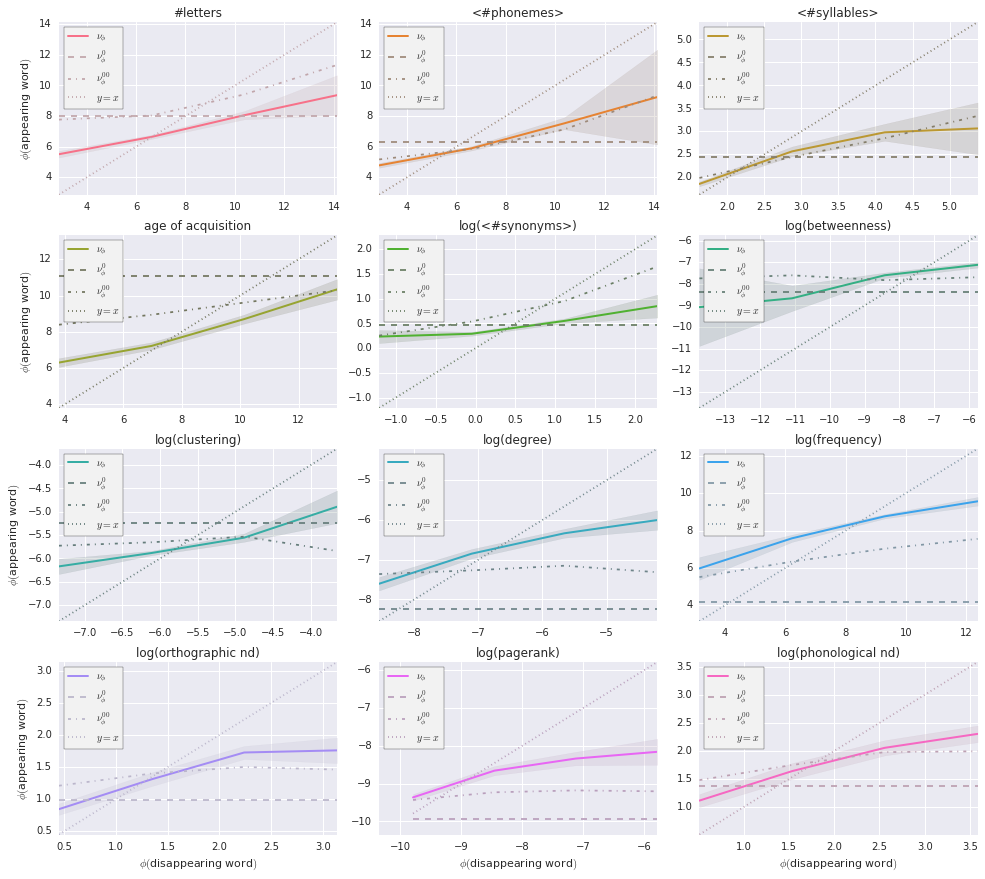

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

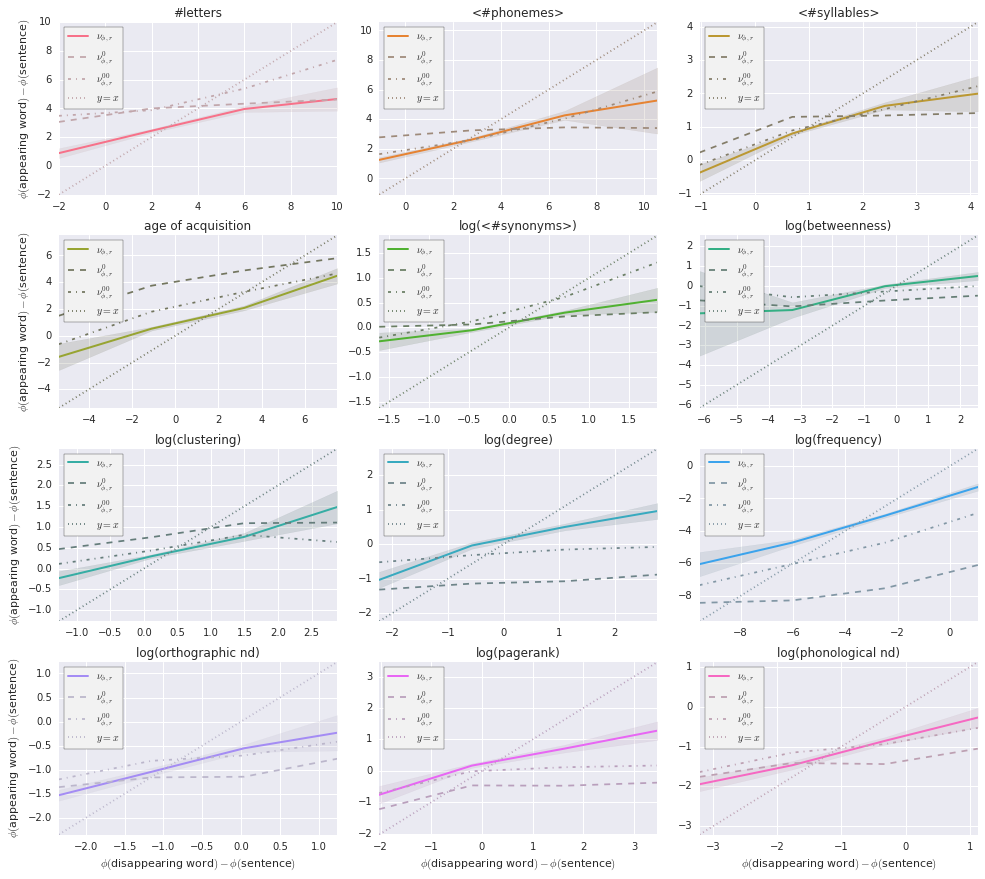

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

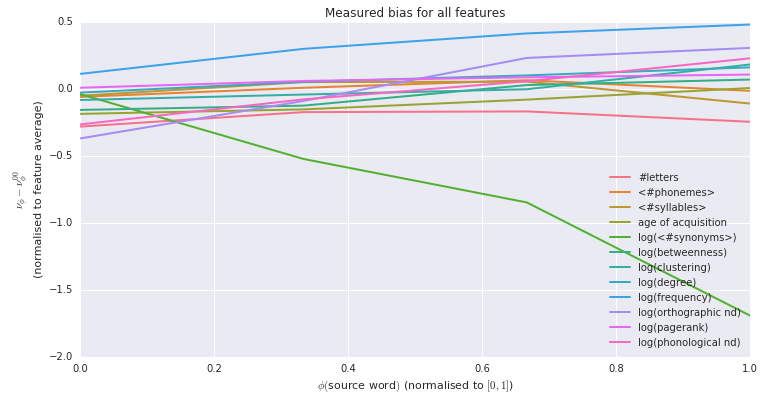

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

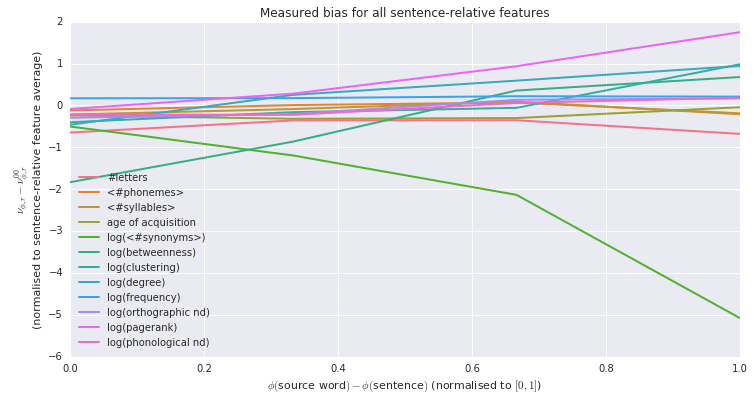

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

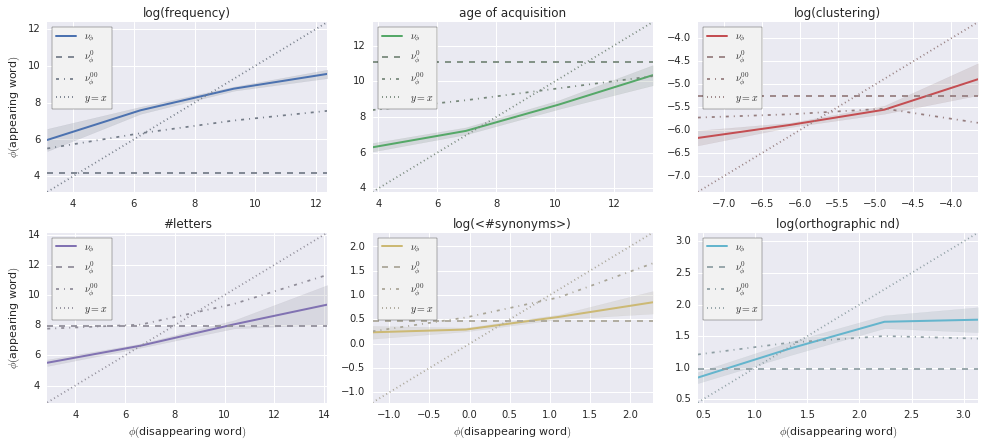

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

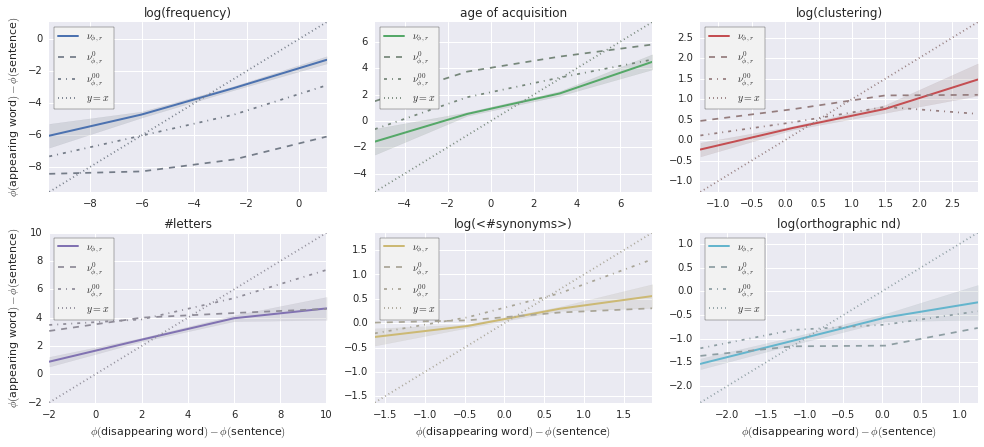

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

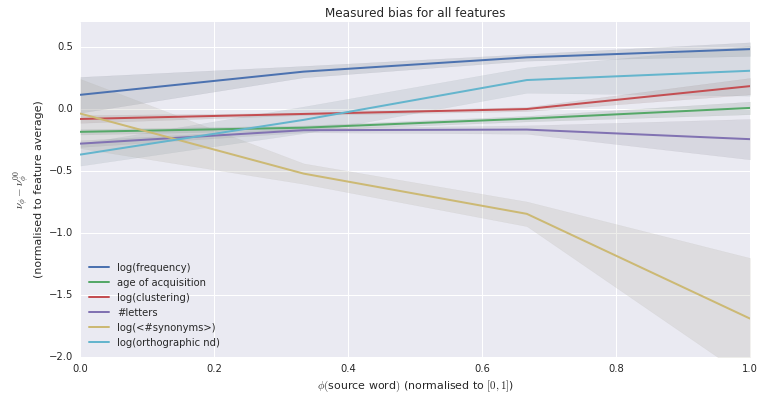

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

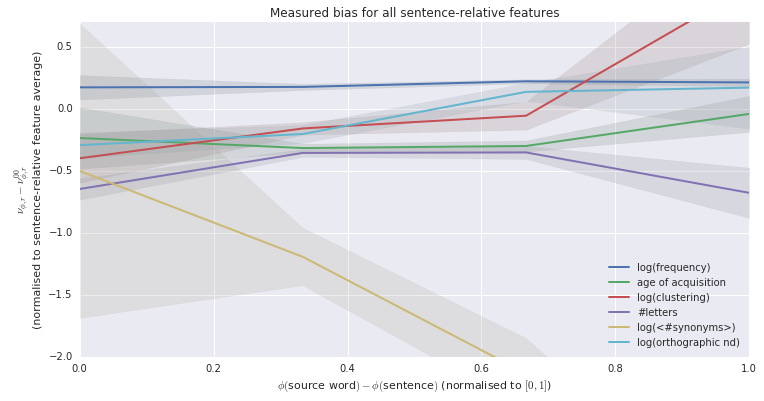

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


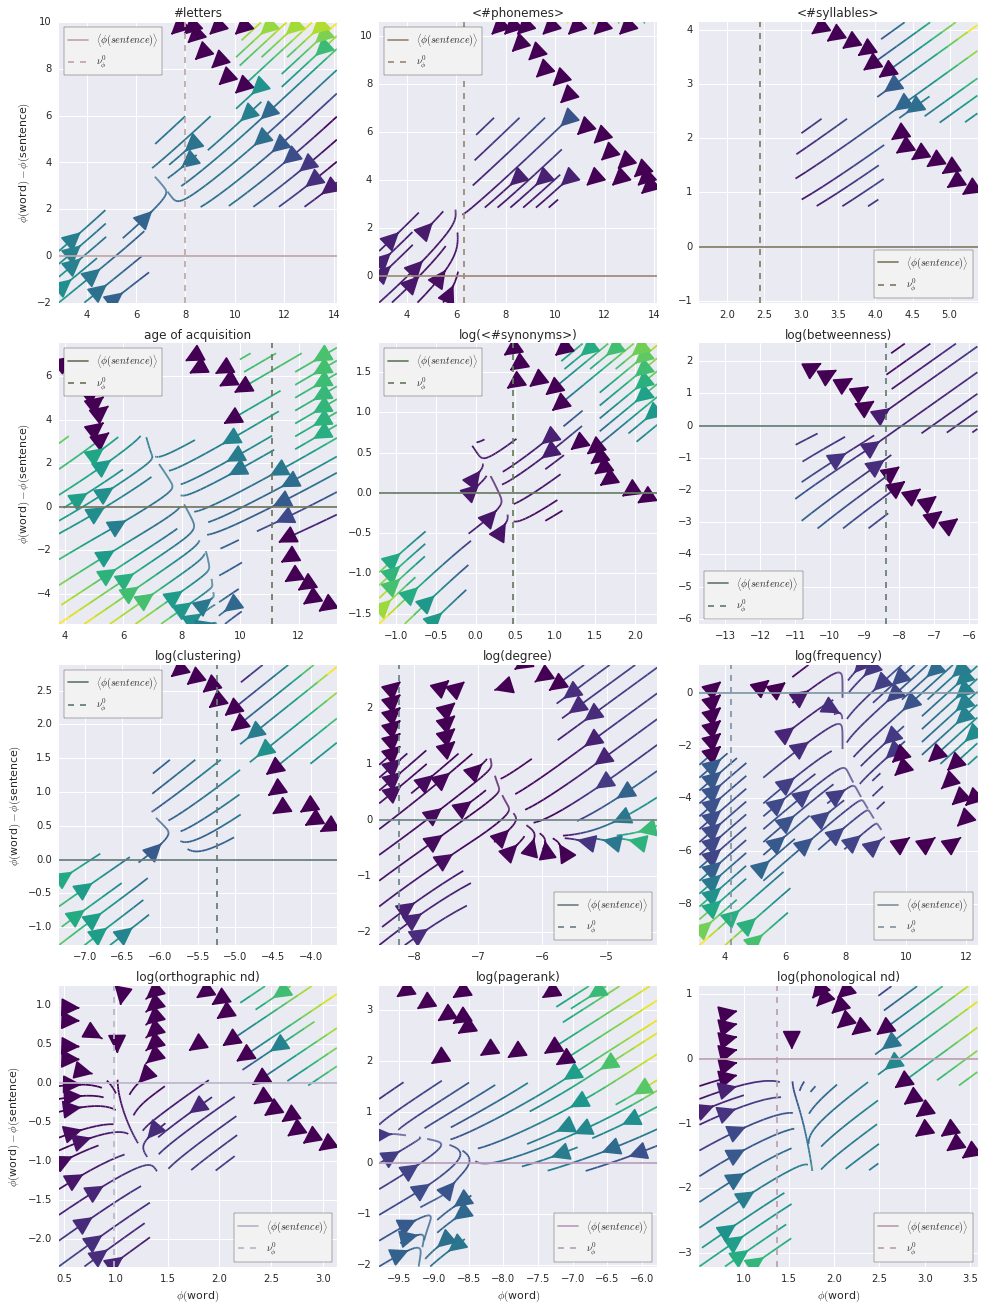

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


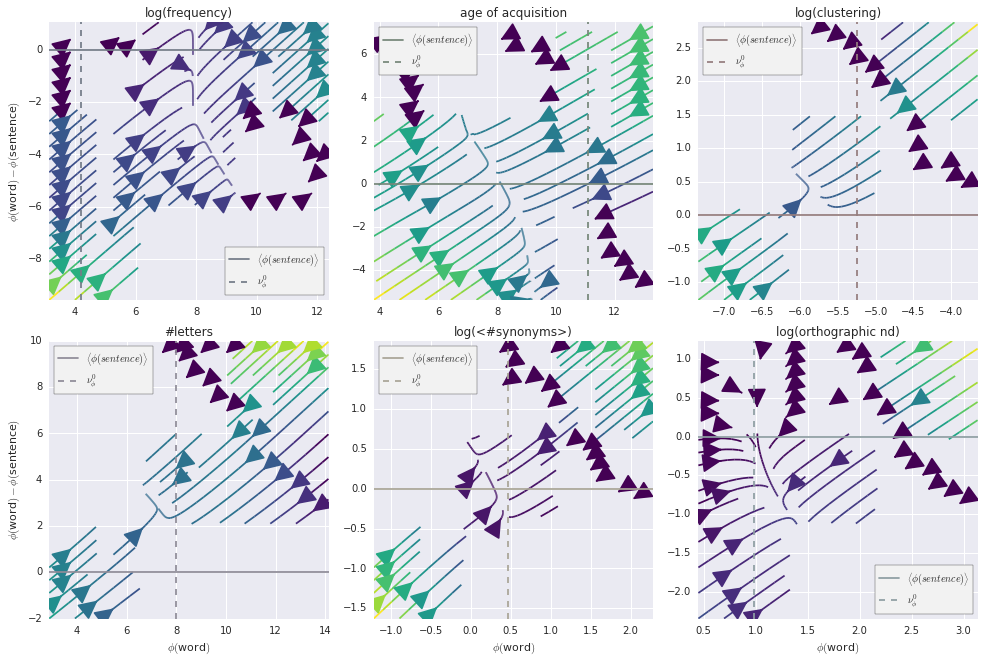

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.52975621  0.17022187  0.08543513  0.073095    0.0349125   0.02993143
  0.02049844  0.01928225  0.01484633  0.00897464  0.00728781]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.472121,0.285413,-0.075083,0.240405,0.223225,-0.429388,0.216021,0.278880,-0.407981,0.282702,-0.164881,-0.003375
Component-1,-0.281377,0.411265,-0.136510,0.296222,0.302160,0.419502,-0.159393,0.293265,0.441438,-0.207965,0.167102,-0.023928
Component-2,0.792863,0.334837,-0.134617,0.114147,0.429848,-0.134532,-0.006948,0.074201,-0.091529,0.096856,-0.020900,-0.038528


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 72339) |          | Elapsed Time: 0:05:39 ETA:  284 days, 6:34:16

  0% (    2 of 72339) |            | Elapsed Time: 0:05:42 ETA:  2 days, 5:20:43

  0% (    8 of 72339) |                   | Elapsed Time: 0:05:43 ETA:  10:57:13

  0% (   15 of 72339) |                    | Elapsed Time: 0:05:44 ETA:  6:56:55

  0% (   27 of 72339) |                    | Elapsed Time: 0:05:45 ETA:  4:29:27

  0% (   39 of 72339) |                    | Elapsed Time: 0:05:46 ETA:  3:34:44

  0% (   51 of 72339) |                    | Elapsed Time: 0:05:47 ETA:  3:05:59

  0% (   58 of 72339) |                    | Elapsed Time: 0:05:48 ETA:  3:05:19

  0% (   66 of 72339) |                    | Elapsed Time: 0:05:49 ETA:  3:01:02

  0% (   74 of 72339) |                    | Elapsed Time: 0:05:50 ETA:  2:57:26

  0% (   87 of 72339) |                    | Elapsed Time: 0:05:51 ETA:  2:08:33

  0% (   97 of 72339) |                    | Elapsed Time: 0:05:52 ETA:  2:01:05

  0% (  106 of 72339) |                    | Elapsed Time: 0:05:53 ETA:  1:58:19

  0% (  120 of 72339) |                    | Elapsed Time: 0:05:54 ETA:  1:55:20

  0% (  135 of 72339) |                    | Elapsed Time: 0:05:55 ETA:  1:51:36

  0% (  146 of 72339) |                    | Elapsed Time: 0:05:56 ETA:  1:53:31

  0% (  162 of 72339) |                    | Elapsed Time: 0:05:58 ETA:  1:43:26

  0% (  177 of 72339) |                    | Elapsed Time: 0:05:59 ETA:  1:37:04

  0% (  192 of 72339) |                    | Elapsed Time: 0:06:00 ETA:  1:35:34

  0% (  200 of 72339) |                    | Elapsed Time: 0:06:01 ETA:  1:40:36

  0% (  213 of 72339) |                    | Elapsed Time: 0:06:02 ETA:  1:37:03

  0% (  228 of 72339) |                    | Elapsed Time: 0:06:03 ETA:  1:31:22

  0% (  246 of 72339) |                    | Elapsed Time: 0:06:04 ETA:  1:28:26

  0% (  261 of 72339) |                    | Elapsed Time: 0:06:05 ETA:  1:28:43

  0% (  278 of 72339) |                    | Elapsed Time: 0:06:06 ETA:  1:23:53

  0% (  289 of 72339) |                    | Elapsed Time: 0:06:07 ETA:  1:27:57

  0% (  301 of 72339) |                    | Elapsed Time: 0:06:08 ETA:  1:29:50

  0% (  316 of 72339) |                    | Elapsed Time: 0:06:10 ETA:  1:25:35

  0% (  327 of 72339) |                    | Elapsed Time: 0:06:11 ETA:  1:22:47

  0% (  343 of 72339) |                    | Elapsed Time: 0:06:12 ETA:  1:21:06

  0% (  357 of 72339) |                    | Elapsed Time: 0:06:13 ETA:  1:22:17

  0% (  372 of 72339) |                    | Elapsed Time: 0:06:14 ETA:  1:24:10

  0% (  385 of 72339) |                    | Elapsed Time: 0:06:15 ETA:  1:25:09

  0% (  396 of 72339) |                    | Elapsed Time: 0:06:16 ETA:  1:29:57

  0% (  404 of 72339) |                    | Elapsed Time: 0:06:17 ETA:  1:32:56

  0% (  417 of 72339) |                    | Elapsed Time: 0:06:18 ETA:  1:31:51

  0% (  438 of 72339) |                    | Elapsed Time: 0:06:19 ETA:  1:28:08

  0% (  460 of 72339) |                    | Elapsed Time: 0:06:20 ETA:  1:20:30

  0% (  469 of 72339) |                    | Elapsed Time: 0:06:21 ETA:  1:24:57

  0% (  490 of 72339) |                    | Elapsed Time: 0:06:22 ETA:  1:19:48

  0% (  510 of 72339) |                    | Elapsed Time: 0:06:23 ETA:  1:16:47

  0% (  543 of 72339) |                    | Elapsed Time: 0:06:24 ETA:  1:06:15

  0% (  572 of 72339) |                    | Elapsed Time: 0:06:25 ETA:  0:58:58

  0% (  595 of 72339) |                    | Elapsed Time: 0:06:26 ETA:  0:52:39

  0% (  614 of 72339) |                    | Elapsed Time: 0:06:27 ETA:  0:50:56

  0% (  628 of 72339) |                    | Elapsed Time: 0:06:28 ETA:  0:52:44

  0% (  648 of 72339) |                    | Elapsed Time: 0:06:29 ETA:  0:53:23

  0% (  671 of 72339) |                    | Elapsed Time: 0:06:30 ETA:  0:49:13

  0% (  693 of 72339) |                    | Elapsed Time: 0:06:31 ETA:  0:48:48

  0% (  715 of 72339) |                    | Elapsed Time: 0:06:32 ETA:  0:48:17

  1% (  731 of 72339) |                    | Elapsed Time: 0:06:34 ETA:  0:53:19

  1% (  755 of 72339) |                    | Elapsed Time: 0:06:35 ETA:  0:54:56

  1% (  778 of 72339) |                    | Elapsed Time: 0:06:36 ETA:  0:55:00

  1% (  812 of 72339) |                    | Elapsed Time: 0:06:37 ETA:  0:50:15

  1% (  837 of 72339) |                    | Elapsed Time: 0:06:38 ETA:  0:46:48

  1% (  850 of 72339) |                    | Elapsed Time: 0:06:39 ETA:  0:48:21

  1% (  878 of 72339) |                    | Elapsed Time: 0:06:40 ETA:  0:46:57

  1% (  905 of 72339) |                    | Elapsed Time: 0:06:41 ETA:  0:45:15

  1% (  935 of 72339) |                    | Elapsed Time: 0:06:42 ETA:  0:43:17

  1% (  966 of 72339) |                    | Elapsed Time: 0:06:43 ETA:  0:40:08

  1% (  994 of 72339) |                    | Elapsed Time: 0:06:44 ETA:  0:39:08

  1% ( 1028 of 72339) |                    | Elapsed Time: 0:06:45 ETA:  0:37:05

  1% ( 1076 of 72339) |                    | Elapsed Time: 0:06:46 ETA:  0:34:37

  1% ( 1108 of 72339) |                    | Elapsed Time: 0:06:47 ETA:  0:33:28

  1% ( 1125 of 72339) |                    | Elapsed Time: 0:06:48 ETA:  0:32:57

  1% ( 1156 of 72339) |                    | Elapsed Time: 0:06:49 ETA:  0:32:37

  1% ( 1202 of 72339) |                    | Elapsed Time: 0:06:50 ETA:  0:30:30

  1% ( 1243 of 72339) |                    | Elapsed Time: 0:06:51 ETA:  0:29:07

  1% ( 1283 of 72339) |                    | Elapsed Time: 0:06:52 ETA:  0:27:57

  1% ( 1319 of 72339) |                    | Elapsed Time: 0:06:53 ETA:  0:27:07

  1% ( 1338 of 72339) |                    | Elapsed Time: 0:06:54 ETA:  0:28:39

  1% ( 1373 of 72339) |                    | Elapsed Time: 0:06:55 ETA:  0:30:14

  1% ( 1409 of 72339) |                    | Elapsed Time: 0:06:56 ETA:  0:29:43

  1% ( 1440 of 72339) |                    | Elapsed Time: 0:06:57 ETA:  0:28:02

  2% ( 1471 of 72339) |                    | Elapsed Time: 0:06:58 ETA:  0:27:57

  2% ( 1499 of 72339) |                    | Elapsed Time: 0:06:59 ETA:  0:30:03

  2% ( 1523 of 72339) |                    | Elapsed Time: 0:07:00 ETA:  0:32:29

  2% ( 1547 of 72339) |                    | Elapsed Time: 0:07:01 ETA:  0:34:53

  2% ( 1567 of 72339) |                    | Elapsed Time: 0:07:02 ETA:  0:37:48

  2% ( 1596 of 72339) |                    | Elapsed Time: 0:07:03 ETA:  0:35:58

  2% ( 1627 of 72339) |                    | Elapsed Time: 0:07:04 ETA:  0:36:46

  2% ( 1658 of 72339) |                    | Elapsed Time: 0:07:05 ETA:  0:37:33

  2% ( 1694 of 72339) |                    | Elapsed Time: 0:07:06 ETA:  0:36:36

  2% ( 1729 of 72339) |                    | Elapsed Time: 0:07:07 ETA:  0:35:53

  2% ( 1766 of 72339) |                    | Elapsed Time: 0:07:08 ETA:  0:34:19

  2% ( 1809 of 72339) |                    | Elapsed Time: 0:07:09 ETA:  0:30:57

  2% ( 1842 of 72339) |                    | Elapsed Time: 0:07:10 ETA:  0:28:58

  2% ( 1869 of 72339) |                    | Elapsed Time: 0:07:11 ETA:  0:29:13

  2% ( 1887 of 72339) |                    | Elapsed Time: 0:07:12 ETA:  0:31:01

  2% ( 1903 of 72339) |                    | Elapsed Time: 0:07:13 ETA:  0:33:26

  2% ( 1915 of 72339) |                    | Elapsed Time: 0:07:14 ETA:  0:38:22

  2% ( 1926 of 72339) |                    | Elapsed Time: 0:07:15 ETA:  0:43:58

  2% ( 1940 of 72339) |                    | Elapsed Time: 0:07:17 ETA:  0:51:00

  2% ( 1953 of 72339) |                    | Elapsed Time: 0:07:18 ETA:  1:00:02

  2% ( 1971 of 72339) |                    | Elapsed Time: 0:07:19 ETA:  1:02:43

  2% ( 1990 of 72339) |                    | Elapsed Time: 0:07:20 ETA:  1:09:43

  2% ( 2023 of 72339) |                    | Elapsed Time: 0:07:21 ETA:  1:06:42

  2% ( 2058 of 72339) |                    | Elapsed Time: 0:07:22 ETA:  0:59:11

  2% ( 2078 of 72339) |                    | Elapsed Time: 0:07:23 ETA:  0:57:39

  2% ( 2107 of 72339) |                    | Elapsed Time: 0:07:24 ETA:  0:51:21

  2% ( 2135 of 72339) |                    | Elapsed Time: 0:07:25 ETA:  0:46:28

  2% ( 2166 of 72339) |                    | Elapsed Time: 0:07:26 ETA:  0:42:09

  3% ( 2198 of 72339) |                    | Elapsed Time: 0:07:27 ETA:  0:37:57

  3% ( 2228 of 72339) |                    | Elapsed Time: 0:07:28 ETA:  0:35:35

  3% ( 2261 of 72339) |                    | Elapsed Time: 0:07:29 ETA:  0:33:06

  3% ( 2289 of 72339) |                    | Elapsed Time: 0:07:30 ETA:  0:33:52

  3% ( 2323 of 72339) |                    | Elapsed Time: 0:07:31 ETA:  0:34:00

  3% ( 2351 of 72339) |                    | Elapsed Time: 0:07:32 ETA:  0:32:45

  3% ( 2386 of 72339) |                    | Elapsed Time: 0:07:33 ETA:  0:31:49

  3% ( 2420 of 72339) |                    | Elapsed Time: 0:07:34 ETA:  0:31:03

  3% ( 2450 of 72339) |                    | Elapsed Time: 0:07:35 ETA:  0:31:10

  3% ( 2484 of 72339) |                    | Elapsed Time: 0:07:36 ETA:  0:30:48

  3% ( 2517 of 72339) |                    | Elapsed Time: 0:07:37 ETA:  0:30:20

  3% ( 2552 of 72339) |                    | Elapsed Time: 0:07:38 ETA:  0:30:07

  3% ( 2583 of 72339) |                    | Elapsed Time: 0:07:39 ETA:  0:29:42

  3% ( 2615 of 72339) |                    | Elapsed Time: 0:07:40 ETA:  0:29:53

  3% ( 2653 of 72339) |                    | Elapsed Time: 0:07:41 ETA:  0:28:38

  3% ( 2689 of 72339) |                    | Elapsed Time: 0:07:42 ETA:  0:28:32

  3% ( 2713 of 72339) |                    | Elapsed Time: 0:07:43 ETA:  0:28:28

  3% ( 2749 of 72339) |                    | Elapsed Time: 0:07:44 ETA:  0:27:46

  3% ( 2786 of 72339) |                    | Elapsed Time: 0:07:45 ETA:  0:27:39

  3% ( 2826 of 72339) |                    | Elapsed Time: 0:07:46 ETA:  0:26:50

  3% ( 2860 of 72339) |                    | Elapsed Time: 0:07:47 ETA:  0:26:52

  3% ( 2887 of 72339) |                    | Elapsed Time: 0:07:48 ETA:  0:27:27

  4% ( 2936 of 72339) |                    | Elapsed Time: 0:07:49 ETA:  0:25:44

  4% ( 2989 of 72339) |                    | Elapsed Time: 0:07:50 ETA:  0:24:12

  4% ( 3046 of 72339) |                    | Elapsed Time: 0:07:51 ETA:  0:22:14

  4% ( 3109 of 72339) |                    | Elapsed Time: 0:07:52 ETA:  0:20:13

  4% ( 3169 of 72339) |                    | Elapsed Time: 0:07:53 ETA:  0:18:34

  4% ( 3220 of 72339) |                    | Elapsed Time: 0:07:54 ETA:  0:17:33

  4% ( 3282 of 72339) |                    | Elapsed Time: 0:07:55 ETA:  0:16:23

  4% ( 3345 of 72339) |                    | Elapsed Time: 0:07:56 ETA:  0:14:55

  4% ( 3417 of 72339) |                    | Elapsed Time: 0:07:57 ETA:  0:12:53

  4% ( 3481 of 72339) |                    | Elapsed Time: 0:07:58 ETA:  0:12:13

  4% ( 3547 of 72339) |                    | Elapsed Time: 0:07:59 ETA:  0:11:41

  4% ( 3611 of 72339) |                    | Elapsed Time: 0:08:00 ETA:  0:11:28

  5% ( 3617 of 72339) |#                   | Elapsed Time: 0:08:00 ETA:  0:11:44

  5% ( 3671 of 72339) |#                   | Elapsed Time: 0:08:01 ETA:  0:11:58

  5% ( 3726 of 72339) |#                   | Elapsed Time: 0:08:02 ETA:  0:11:46

  5% ( 3788 of 72339) |#                   | Elapsed Time: 0:08:03 ETA:  0:11:40

  5% ( 3851 of 72339) |#                   | Elapsed Time: 0:08:04 ETA:  0:11:38

  5% ( 3902 of 72339) |#                   | Elapsed Time: 0:08:05 ETA:  0:12:28

  5% ( 3963 of 72339) |#                   | Elapsed Time: 0:08:06 ETA:  0:12:36

  5% ( 4035 of 72339) |#                   | Elapsed Time: 0:08:07 ETA:  0:12:19

  5% ( 4072 of 72339) |#                   | Elapsed Time: 0:08:08 ETA:  0:13:32

  5% ( 4109 of 72339) |#                   | Elapsed Time: 0:08:09 ETA:  0:14:07

  5% ( 4140 of 72339) |#                   | Elapsed Time: 0:08:10 ETA:  0:15:13

  5% ( 4165 of 72339) |#                   | Elapsed Time: 0:08:11 ETA:  0:16:48

  5% ( 4209 of 72339) |#                   | Elapsed Time: 0:08:12 ETA:  0:17:52

  5% ( 4262 of 72339) |#                   | Elapsed Time: 0:08:13 ETA:  0:18:30

  5% ( 4308 of 72339) |#                   | Elapsed Time: 0:08:14 ETA:  0:18:51

  6% ( 4347 of 72339) |#                   | Elapsed Time: 0:08:15 ETA:  0:20:24

  6% ( 4392 of 72339) |#                   | Elapsed Time: 0:08:17 ETA:  0:22:38

  6% ( 4435 of 72339) |#                   | Elapsed Time: 0:08:18 ETA:  0:22:01

  6% ( 4481 of 72339) |#                   | Elapsed Time: 0:08:19 ETA:  0:21:16

  6% ( 4519 of 72339) |#                   | Elapsed Time: 0:08:20 ETA:  0:20:39

  6% ( 4522 of 72339) |#                   | Elapsed Time: 0:08:20 ETA:  0:20:04

  6% ( 4559 of 72339) |#                   | Elapsed Time: 0:08:21 ETA:  0:20:38

  6% ( 4602 of 72339) |#                   | Elapsed Time: 0:08:22 ETA:  0:21:47

  6% ( 4636 of 72339) |#                   | Elapsed Time: 0:08:23 ETA:  0:22:52

  6% ( 4685 of 72339) |#                   | Elapsed Time: 0:08:24 ETA:  0:22:03

  6% ( 4714 of 72339) |#                   | Elapsed Time: 0:08:25 ETA:  0:23:27

  6% ( 4770 of 72339) |#                   | Elapsed Time: 0:08:26 ETA:  0:22:11

  6% ( 4836 of 72339) |#                   | Elapsed Time: 0:08:27 ETA:  0:20:23

  6% ( 4909 of 72339) |#                   | Elapsed Time: 0:08:28 ETA:  0:17:47

  6% ( 4974 of 72339) |#                   | Elapsed Time: 0:08:29 ETA:  0:16:04

  6% ( 5035 of 72339) |#                   | Elapsed Time: 0:08:30 ETA:  0:14:50

  7% ( 5080 of 72339) |#                   | Elapsed Time: 0:08:31 ETA:  0:14:30

  7% ( 5144 of 72339) |#                   | Elapsed Time: 0:08:32 ETA:  0:13:05

  7% ( 5192 of 72339) |#                   | Elapsed Time: 0:08:33 ETA:  0:13:08

  7% ( 5231 of 72339) |#                   | Elapsed Time: 0:08:34 ETA:  0:12:42

  7% ( 5277 of 72339) |#                   | Elapsed Time: 0:08:35 ETA:  0:13:08

  7% ( 5356 of 72339) |#                   | Elapsed Time: 0:08:36 ETA:  0:12:35

  7% ( 5426 of 72339) |#                   | Elapsed Time: 0:08:37 ETA:  0:12:32

  7% ( 5511 of 72339) |#                   | Elapsed Time: 0:08:38 ETA:  0:11:44

  7% ( 5569 of 72339) |#                   | Elapsed Time: 0:08:39 ETA:  0:11:49

  7% ( 5633 of 72339) |#                   | Elapsed Time: 0:08:40 ETA:  0:11:05

  7% ( 5715 of 72339) |#                   | Elapsed Time: 0:08:41 ETA:  0:10:27

  7% ( 5771 of 72339) |#                   | Elapsed Time: 0:08:42 ETA:  0:10:05

  8% ( 5808 of 72339) |#                   | Elapsed Time: 0:08:43 ETA:  0:10:10

  8% ( 5858 of 72339) |#                   | Elapsed Time: 0:08:44 ETA:  0:10:00

  8% ( 5914 of 72339) |#                   | Elapsed Time: 0:08:45 ETA:  0:10:46

  8% ( 5955 of 72339) |#                   | Elapsed Time: 0:08:46 ETA:  0:12:00

  8% ( 5994 of 72339) |#                   | Elapsed Time: 0:08:47 ETA:  0:13:58

  8% ( 6045 of 72339) |#                   | Elapsed Time: 0:08:48 ETA:  0:14:17

  8% ( 6114 of 72339) |#                   | Elapsed Time: 0:08:49 ETA:  0:14:04

  8% ( 6198 of 72339) |#                   | Elapsed Time: 0:08:50 ETA:  0:14:08

  8% ( 6274 of 72339) |#                   | Elapsed Time: 0:08:51 ETA:  0:13:21

  8% ( 6330 of 72339) |#                   | Elapsed Time: 0:08:52 ETA:  0:11:59

  8% ( 6403 of 72339) |#                   | Elapsed Time: 0:08:53 ETA:  0:11:05

  8% ( 6476 of 72339) |#                   | Elapsed Time: 0:08:54 ETA:  0:10:27

  9% ( 6542 of 72339) |#                   | Elapsed Time: 0:08:55 ETA:  0:09:35

  9% ( 6609 of 72339) |#                   | Elapsed Time: 0:08:56 ETA:  0:08:41

  9% ( 6667 of 72339) |#                   | Elapsed Time: 0:08:57 ETA:  0:08:29

  9% ( 6738 of 72339) |#                   | Elapsed Time: 0:08:58 ETA:  0:08:22

  9% ( 6824 of 72339) |#                   | Elapsed Time: 0:08:59 ETA:  0:08:09

  9% ( 6926 of 72339) |#                   | Elapsed Time: 0:09:00 ETA:  0:07:17

  9% ( 7020 of 72339) |#                   | Elapsed Time: 0:09:01 ETA:  0:06:46

  9% ( 7116 of 72339) |#                   | Elapsed Time: 0:09:02 ETA:  0:06:15

  9% ( 7197 of 72339) |#                   | Elapsed Time: 0:09:03 ETA:  0:06:04

 10% ( 7234 of 72339) |##                  | Elapsed Time: 0:09:04 ETA:  0:05:52

 10% ( 7306 of 72339) |##                  | Elapsed Time: 0:09:05 ETA:  0:05:45

 10% ( 7379 of 72339) |##                  | Elapsed Time: 0:09:06 ETA:  0:05:24

 10% ( 7448 of 72339) |##                  | Elapsed Time: 0:09:07 ETA:  0:05:25

 10% ( 7527 of 72339) |##                  | Elapsed Time: 0:09:08 ETA:  0:05:34

 10% ( 7605 of 72339) |##                  | Elapsed Time: 0:09:09 ETA:  0:06:03

 10% ( 7679 of 72339) |##                  | Elapsed Time: 0:09:10 ETA:  0:06:30

 10% ( 7757 of 72339) |##                  | Elapsed Time: 0:09:11 ETA:  0:06:55

 10% ( 7836 of 72339) |##                  | Elapsed Time: 0:09:12 ETA:  0:06:58

 10% ( 7898 of 72339) |##                  | Elapsed Time: 0:09:13 ETA:  0:07:14

 11% ( 7975 of 72339) |##                  | Elapsed Time: 0:09:14 ETA:  0:07:06

 11% ( 8051 of 72339) |##                  | Elapsed Time: 0:09:15 ETA:  0:07:01

 11% ( 8139 of 72339) |##                  | Elapsed Time: 0:09:16 ETA:  0:06:47

 11% ( 8216 of 72339) |##                  | Elapsed Time: 0:09:17 ETA:  0:06:48

 11% ( 8293 of 72339) |##                  | Elapsed Time: 0:09:18 ETA:  0:06:42

 11% ( 8367 of 72339) |##                  | Elapsed Time: 0:09:19 ETA:  0:06:47

 11% ( 8448 of 72339) |##                  | Elapsed Time: 0:09:20 ETA:  0:06:44

 11% ( 8528 of 72339) |##                  | Elapsed Time: 0:09:21 ETA:  0:06:14

 11% ( 8612 of 72339) |##                  | Elapsed Time: 0:09:22 ETA:  0:06:04

 12% ( 8686 of 72339) |##                  | Elapsed Time: 0:09:23 ETA:  0:06:06

 12% ( 8764 of 72339) |##                  | Elapsed Time: 0:09:24 ETA:  0:06:09

 12% ( 8840 of 72339) |##                  | Elapsed Time: 0:09:25 ETA:  0:06:11

 12% ( 8923 of 72339) |##                  | Elapsed Time: 0:09:26 ETA:  0:06:02

 12% ( 8992 of 72339) |##                  | Elapsed Time: 0:09:27 ETA:  0:06:13

 12% ( 9043 of 72339) |##                  | Elapsed Time: 0:09:28 ETA:  0:05:58

 12% ( 9119 of 72339) |##                  | Elapsed Time: 0:09:29 ETA:  0:06:01

 12% ( 9197 of 72339) |##                  | Elapsed Time: 0:09:30 ETA:  0:06:03

 12% ( 9271 of 72339) |##                  | Elapsed Time: 0:09:31 ETA:  0:06:15

 12% ( 9362 of 72339) |##                  | Elapsed Time: 0:09:32 ETA:  0:05:51

 13% ( 9446 of 72339) |##                  | Elapsed Time: 0:09:33 ETA:  0:05:43

 13% ( 9527 of 72339) |##                  | Elapsed Time: 0:09:34 ETA:  0:05:39

 13% ( 9614 of 72339) |##                  | Elapsed Time: 0:09:35 ETA:  0:05:32

 13% ( 9712 of 72339) |##                  | Elapsed Time: 0:09:36 ETA:  0:05:01

 13% ( 9795 of 72339) |##                  | Elapsed Time: 0:09:37 ETA:  0:05:05

 13% ( 9870 of 72339) |##                  | Elapsed Time: 0:09:38 ETA:  0:05:05

 13% ( 9947 of 72339) |##                  | Elapsed Time: 0:09:39 ETA:  0:05:04

 13% (10020 of 72339) |##                  | Elapsed Time: 0:09:40 ETA:  0:05:05

 13% (10106 of 72339) |##                  | Elapsed Time: 0:09:41 ETA:  0:05:09

 14% (10213 of 72339) |##                  | Elapsed Time: 0:09:42 ETA:  0:04:41

 14% (10308 of 72339) |##                  | Elapsed Time: 0:09:43 ETA:  0:04:20

 14% (10420 of 72339) |##                  | Elapsed Time: 0:09:44 ETA:  0:03:56

 14% (10525 of 72339) |##                  | Elapsed Time: 0:09:45 ETA:  0:03:41

 14% (10637 of 72339) |##                  | Elapsed Time: 0:09:46 ETA:  0:03:13

 14% (10749 of 72339) |##                  | Elapsed Time: 0:09:47 ETA:  0:02:39

 15% (10851 of 72339) |###                 | Elapsed Time: 0:09:48 ETA:  0:01:55

 15% (10959 of 72339) |###                 | Elapsed Time: 0:09:49 ETA:  0:01:35

 15% (11083 of 72339) |###                 | Elapsed Time: 0:09:50 ETA:  0:01:21

 15% (11196 of 72339) |###                 | Elapsed Time: 0:09:51 ETA:  0:01:08

 15% (11270 of 72339) |###                 | Elapsed Time: 0:09:52 ETA:  0:01:34

 15% (11358 of 72339) |###                 | Elapsed Time: 0:09:53 ETA:  0:01:47

 15% (11447 of 72339) |###                 | Elapsed Time: 0:09:54 ETA:  0:02:06

 15% (11536 of 72339) |###                 | Elapsed Time: 0:09:55 ETA:  0:02:25

 16% (11631 of 72339) |###                 | Elapsed Time: 0:09:56 ETA:  0:02:34

 16% (11724 of 72339) |###                 | Elapsed Time: 0:09:57 ETA:  0:02:37

 16% (11756 of 72339) |###                 | Elapsed Time: 0:09:57 ETA:  0:02:49

 16% (11859 of 72339) |###                 | Elapsed Time: 0:09:58 ETA:  0:03:08

 16% (11955 of 72339) |###                 | Elapsed Time: 0:09:59 ETA:  0:03:23

 16% (12037 of 72339) |###                 | Elapsed Time: 0:10:00 ETA:  0:03:14

 16% (12112 of 72339) |###                 | Elapsed Time: 0:10:01 ETA:  0:03:28

 16% (12191 of 72339) |###                 | Elapsed Time: 0:10:02 ETA:  0:03:39

 16% (12277 of 72339) |###                 | Elapsed Time: 0:10:03 ETA:  0:03:41

 17% (12355 of 72339) |###                 | Elapsed Time: 0:10:04 ETA:  0:03:54

 17% (12452 of 72339) |###                 | Elapsed Time: 0:10:05 ETA:  0:03:49

 17% (12535 of 72339) |###                 | Elapsed Time: 0:10:06 ETA:  0:03:55

 17% (12618 of 72339) |###                 | Elapsed Time: 0:10:07 ETA:  0:04:16

 17% (12660 of 72339) |###                 | Elapsed Time: 0:10:08 ETA:  0:05:11

 17% (12749 of 72339) |###                 | Elapsed Time: 0:10:09 ETA:  0:05:01

 17% (12845 of 72339) |###                 | Elapsed Time: 0:10:10 ETA:  0:04:32

 17% (12938 of 72339) |###                 | Elapsed Time: 0:10:11 ETA:  0:04:14

 17% (13020 of 72339) |###                 | Elapsed Time: 0:10:12 ETA:  0:04:19

 18% (13109 of 72339) |###                 | Elapsed Time: 0:10:13 ETA:  0:04:05

 18% (13213 of 72339) |###                 | Elapsed Time: 0:10:14 ETA:  0:03:57

 18% (13320 of 72339) |###                 | Elapsed Time: 0:10:15 ETA:  0:03:29

 18% (13419 of 72339) |###                 | Elapsed Time: 0:10:16 ETA:  0:03:12

 18% (13525 of 72339) |###                 | Elapsed Time: 0:10:17 ETA:  0:02:21

 18% (13564 of 72339) |###                 | Elapsed Time: 0:10:18 ETA:  0:02:15

 18% (13662 of 72339) |###                 | Elapsed Time: 0:10:19 ETA:  0:02:12

 19% (13761 of 72339) |###                 | Elapsed Time: 0:10:20 ETA:  0:02:05

 19% (13854 of 72339) |###                 | Elapsed Time: 0:10:21 ETA:  0:01:54

 19% (13952 of 72339) |###                 | Elapsed Time: 0:10:22 ETA:  0:01:45

 19% (14053 of 72339) |###                 | Elapsed Time: 0:10:23 ETA:  0:01:46

 19% (14152 of 72339) |###                 | Elapsed Time: 0:10:24 ETA:  0:01:51

 19% (14233 of 72339) |###                 | Elapsed Time: 0:10:25 ETA:  0:02:06

 19% (14329 of 72339) |###                 | Elapsed Time: 0:10:26 ETA:  0:02:14

 19% (14419 of 72339) |###                 | Elapsed Time: 0:10:27 ETA:  0:02:17

 20% (14468 of 72339) |####                | Elapsed Time: 0:10:28 ETA:  0:02:33

 20% (14536 of 72339) |####                | Elapsed Time: 0:10:29 ETA:  0:03:03

 20% (14624 of 72339) |####                | Elapsed Time: 0:10:30 ETA:  0:03:06

 20% (14716 of 72339) |####                | Elapsed Time: 0:10:31 ETA:  0:03:12

 20% (14795 of 72339) |####                | Elapsed Time: 0:10:32 ETA:  0:03:35

 20% (14846 of 72339) |####                | Elapsed Time: 0:10:33 ETA:  0:04:34

 20% (14909 of 72339) |####                | Elapsed Time: 0:10:34 ETA:  0:04:58

 20% (14963 of 72339) |####                | Elapsed Time: 0:10:35 ETA:  0:05:59

 20% (15044 of 72339) |####                | Elapsed Time: 0:10:36 ETA:  0:06:13

 20% (15146 of 72339) |####                | Elapsed Time: 0:10:37 ETA:  0:05:30

 21% (15243 of 72339) |####                | Elapsed Time: 0:10:38 ETA:  0:04:49

 21% (15350 of 72339) |####                | Elapsed Time: 0:10:39 ETA:  0:04:24

 21% (15373 of 72339) |####                | Elapsed Time: 0:10:39 ETA:  0:04:35

 21% (15467 of 72339) |####                | Elapsed Time: 0:10:40 ETA:  0:04:13

 21% (15570 of 72339) |####                | Elapsed Time: 0:10:41 ETA:  0:03:07

 21% (15660 of 72339) |####                | Elapsed Time: 0:10:42 ETA:  0:02:36

 21% (15725 of 72339) |####                | Elapsed Time: 0:10:43 ETA:  0:02:23

 21% (15821 of 72339) |####                | Elapsed Time: 0:10:44 ETA:  0:02:06

 22% (15942 of 72339) |####                | Elapsed Time: 0:10:45 ETA:  0:01:46

 22% (16065 of 72339) |####                | Elapsed Time: 0:10:46 ETA:  0:01:21

 22% (16191 of 72339) |####                | Elapsed Time: 0:10:47 ETA:  0:01:03

 22% (16277 of 72339) |####                | Elapsed Time: 0:10:48 ETA:  0:00:50

 22% (16387 of 72339) |####                | Elapsed Time: 0:10:49 ETA:  0:00:37

 22% (16514 of 72339) |####                | Elapsed Time: 0:10:50 ETA:  0:00:18

 23% (16649 of 72339) |####                | Elapsed Time: 0:10:51 ETA:  0:00:00

 23% (16777 of 72339) |####                | Elapsed Time: 0:10:52 ETA:  0:00:00

 23% (16882 of 72339) |####                | Elapsed Time: 0:10:53 ETA:  0:00:00

 23% (16966 of 72339) |####                | Elapsed Time: 0:10:54 ETA:  0:00:00

 23% (17038 of 72339) |####                | Elapsed Time: 0:10:55 ETA:  0:00:00

 23% (17108 of 72339) |####                | Elapsed Time: 0:10:56 ETA:  0:00:34

 23% (17181 of 72339) |####                | Elapsed Time: 0:10:57 ETA:  0:01:03

 23% (17266 of 72339) |####                | Elapsed Time: 0:10:58 ETA:  0:01:23

 24% (17372 of 72339) |####                | Elapsed Time: 0:10:59 ETA:  0:01:40

 24% (17489 of 72339) |####                | Elapsed Time: 0:11:00 ETA:  0:01:56

 24% (17595 of 72339) |####                | Elapsed Time: 0:11:01 ETA:  0:02:16

 24% (17705 of 72339) |####                | Elapsed Time: 0:11:02 ETA:  0:02:10

 24% (17808 of 72339) |####                | Elapsed Time: 0:11:03 ETA:  0:01:51

 24% (17911 of 72339) |####                | Elapsed Time: 0:11:04 ETA:  0:01:22

 24% (18021 of 72339) |####                | Elapsed Time: 0:11:05 ETA:  0:00:48

 25% (18085 of 72339) |#####               | Elapsed Time: 0:11:05 ETA:  0:00:28

 25% (18187 of 72339) |#####               | Elapsed Time: 0:11:06 ETA:  0:00:21

 25% (18279 of 72339) |#####               | Elapsed Time: 0:11:07 ETA:  0:00:31

 25% (18367 of 72339) |#####               | Elapsed Time: 0:11:08 ETA:  0:00:52

 25% (18457 of 72339) |#####               | Elapsed Time: 0:11:09 ETA:  0:01:05

 25% (18549 of 72339) |#####               | Elapsed Time: 0:11:10 ETA:  0:01:21

 25% (18670 of 72339) |#####               | Elapsed Time: 0:11:11 ETA:  0:01:04

 25% (18791 of 72339) |#####               | Elapsed Time: 0:11:12 ETA:  0:00:48

 26% (18904 of 72339) |#####               | Elapsed Time: 0:11:13 ETA:  0:00:44

 26% (18989 of 72339) |#####               | Elapsed Time: 0:11:15 ETA:  0:01:03

 26% (19082 of 72339) |#####               | Elapsed Time: 0:11:16 ETA:  0:01:00

 26% (19176 of 72339) |#####               | Elapsed Time: 0:11:17 ETA:  0:00:54

 26% (19275 of 72339) |#####               | Elapsed Time: 0:11:18 ETA:  0:00:45

 26% (19375 of 72339) |#####               | Elapsed Time: 0:11:19 ETA:  0:00:35

 26% (19477 of 72339) |#####               | Elapsed Time: 0:11:20 ETA:  0:00:51

 27% (19561 of 72339) |#####               | Elapsed Time: 0:11:21 ETA:  0:01:26

 27% (19625 of 72339) |#####               | Elapsed Time: 0:11:22 ETA:  0:02:17

 27% (19701 of 72339) |#####               | Elapsed Time: 0:11:23 ETA:  0:02:18

 27% (19807 of 72339) |#####               | Elapsed Time: 0:11:24 ETA:  0:01:55

 27% (19894 of 72339) |#####               | Elapsed Time: 0:11:24 ETA:  0:01:47

 27% (19993 of 72339) |#####               | Elapsed Time: 0:11:25 ETA:  0:01:41

 27% (20108 of 72339) |#####               | Elapsed Time: 0:11:26 ETA:  0:01:24

 27% (20237 of 72339) |#####               | Elapsed Time: 0:11:27 ETA:  0:00:57

 28% (20347 of 72339) |#####               | Elapsed Time: 0:11:28 ETA:  0:00:49

 28% (20444 of 72339) |#####               | Elapsed Time: 0:11:30 ETA:  0:00:37

 28% (20561 of 72339) |#####               | Elapsed Time: 0:11:31 ETA:  0:00:00

 28% (20669 of 72339) |#####               | Elapsed Time: 0:11:32 ETA:  0:00:00

 28% (20798 of 72339) |#####               | Elapsed Time: 0:11:32 ETA:  0:00:00

 28% (20910 of 72339) |#####               | Elapsed Time: 0:11:33 ETA:  0:00:00

 29% (21007 of 72339) |#####               | Elapsed Time: 0:11:34 ETA:  0:00:00

 29% (21085 of 72339) |#####               | Elapsed Time: 0:11:35 ETA:  0:00:00

 29% (21173 of 72339) |#####               | Elapsed Time: 0:11:37 ETA:  0:00:00

 29% (21294 of 72339) |#####               | Elapsed Time: 0:11:38 ETA:  0:00:00

 29% (21397 of 72339) |#####               | Elapsed Time: 0:11:39 ETA:  0:00:00

 29% (21500 of 72339) |#####               | Elapsed Time: 0:11:40 ETA:  0:00:00

 29% (21616 of 72339) |#####               | Elapsed Time: 0:11:41 ETA:  0:00:00

 30% (21702 of 72339) |######              | Elapsed Time: 0:11:41 ETA:  0:00:00

 30% (21814 of 72339) |######              | Elapsed Time: 0:11:42 ETA:  0:00:00

 30% (21906 of 72339) |######              | Elapsed Time: 0:11:43 ETA:  0:00:03

 30% (22012 of 72339) |######              | Elapsed Time: 0:11:44 ETA:  0:00:00

 30% (22108 of 72339) |######              | Elapsed Time: 0:11:45 ETA:  0:00:00

 30% (22197 of 72339) |######              | Elapsed Time: 0:11:46 ETA:  0:00:00

 30% (22323 of 72339) |######              | Elapsed Time: 0:11:47 ETA:  0:00:00

 31% (22451 of 72339) |######              | Elapsed Time: 0:11:48 ETA:  0:00:00

 31% (22567 of 72339) |######              | Elapsed Time: 0:11:49 ETA:  0:00:00

 31% (22606 of 72339) |######              | Elapsed Time: 0:11:50 ETA:  0:00:00

 31% (22741 of 72339) |######              | Elapsed Time: 0:11:51 ETA:  0:00:00

 31% (22861 of 72339) |######              | Elapsed Time: 0:11:52 ETA:  0:00:00

 31% (22996 of 72339) |######              | Elapsed Time: 0:11:53 ETA:  0:00:00

 31% (23109 of 72339) |######              | Elapsed Time: 0:11:54 ETA:  0:00:00

 32% (23210 of 72339) |######              | Elapsed Time: 0:11:55 ETA:  0:00:00

 32% (23301 of 72339) |######              | Elapsed Time: 0:11:56 ETA:  0:00:00

 32% (23384 of 72339) |######              | Elapsed Time: 0:11:57 ETA:  0:00:00

 32% (23448 of 72339) |######              | Elapsed Time: 0:11:58 ETA:  0:00:00

 32% (23511 of 72339) |######              | Elapsed Time: 0:11:59 ETA:  0:00:00

 32% (23612 of 72339) |######              | Elapsed Time: 0:12:00 ETA:  0:00:26

 32% (23715 of 72339) |######              | Elapsed Time: 0:12:01 ETA:  0:00:40

 32% (23815 of 72339) |######              | Elapsed Time: 0:12:02 ETA:  0:01:12

 33% (23899 of 72339) |######              | Elapsed Time: 0:12:03 ETA:  0:01:40

 33% (23984 of 72339) |######              | Elapsed Time: 0:12:04 ETA:  0:01:56

 33% (24064 of 72339) |######              | Elapsed Time: 0:12:05 ETA:  0:02:08

 33% (24149 of 72339) |######              | Elapsed Time: 0:12:06 ETA:  0:02:05

 33% (24265 of 72339) |######              | Elapsed Time: 0:12:07 ETA:  0:01:10

 33% (24362 of 72339) |######              | Elapsed Time: 0:12:08 ETA:  0:00:42

 33% (24415 of 72339) |######              | Elapsed Time: 0:12:08 ETA:  0:00:40

 33% (24501 of 72339) |######              | Elapsed Time: 0:12:09 ETA:  0:00:56

 34% (24596 of 72339) |######              | Elapsed Time: 0:12:10 ETA:  0:01:00

 34% (24679 of 72339) |######              | Elapsed Time: 0:12:11 ETA:  0:01:00

 34% (24785 of 72339) |######              | Elapsed Time: 0:12:12 ETA:  0:00:38

 34% (24918 of 72339) |######              | Elapsed Time: 0:12:13 ETA:  0:00:00

 34% (25049 of 72339) |######              | Elapsed Time: 0:12:14 ETA:  0:00:00

 34% (25122 of 72339) |######              | Elapsed Time: 0:12:15 ETA:  0:00:00

 34% (25219 of 72339) |######              | Elapsed Time: 0:12:16 ETA:  0:00:00

 34% (25306 of 72339) |######              | Elapsed Time: 0:12:17 ETA:  0:00:00

 35% (25319 of 72339) |#######             | Elapsed Time: 0:12:17 ETA:  0:00:00

 35% (25370 of 72339) |#######             | Elapsed Time: 0:12:18 ETA:  0:00:34

 35% (25452 of 72339) |#######             | Elapsed Time: 0:12:19 ETA:  0:00:34

 35% (25573 of 72339) |#######             | Elapsed Time: 0:12:20 ETA:  0:00:18

 35% (25713 of 72339) |#######             | Elapsed Time: 0:12:21 ETA:  0:00:11

 35% (25802 of 72339) |#######             | Elapsed Time: 0:12:22 ETA:  0:00:52

 35% (25884 of 72339) |#######             | Elapsed Time: 0:12:23 ETA:  0:00:42

 35% (25966 of 72339) |#######             | Elapsed Time: 0:12:24 ETA:  0:00:56

 36% (26049 of 72339) |#######             | Elapsed Time: 0:12:25 ETA:  0:01:00

 36% (26154 of 72339) |#######             | Elapsed Time: 0:12:26 ETA:  0:00:36

 36% (26223 of 72339) |#######             | Elapsed Time: 0:12:27 ETA:  0:00:00

 36% (26324 of 72339) |#######             | Elapsed Time: 0:12:28 ETA:  0:00:00

 36% (26448 of 72339) |#######             | Elapsed Time: 0:12:29 ETA:  0:00:00

 36% (26571 of 72339) |#######             | Elapsed Time: 0:12:30 ETA:  0:00:00

 36% (26667 of 72339) |#######             | Elapsed Time: 0:12:31 ETA:  0:00:00

 37% (26778 of 72339) |#######             | Elapsed Time: 0:12:32 ETA:  0:00:00

 37% (26895 of 72339) |#######             | Elapsed Time: 0:12:33 ETA:  0:00:00

 37% (26976 of 72339) |#######             | Elapsed Time: 0:12:34 ETA:  0:00:00

 37% (27062 of 72339) |#######             | Elapsed Time: 0:12:35 ETA:  0:00:00

 37% (27128 of 72339) |#######             | Elapsed Time: 0:12:36 ETA:  0:00:00

 37% (27222 of 72339) |#######             | Elapsed Time: 0:12:37 ETA:  0:00:00

 37% (27322 of 72339) |#######             | Elapsed Time: 0:12:38 ETA:  0:00:00

 37% (27424 of 72339) |#######             | Elapsed Time: 0:12:39 ETA:  0:00:00

 38% (27514 of 72339) |#######             | Elapsed Time: 0:12:40 ETA:  0:00:00

 38% (27601 of 72339) |#######             | Elapsed Time: 0:12:41 ETA:  0:00:00

 38% (27711 of 72339) |#######             | Elapsed Time: 0:12:42 ETA:  0:00:03

 38% (27827 of 72339) |#######             | Elapsed Time: 0:12:43 ETA:  0:00:00

 38% (27909 of 72339) |#######             | Elapsed Time: 0:12:44 ETA:  0:00:00

 38% (27971 of 72339) |#######             | Elapsed Time: 0:12:45 ETA:  0:00:10

 38% (28032 of 72339) |#######             | Elapsed Time: 0:12:46 ETA:  0:00:41

 38% (28132 of 72339) |#######             | Elapsed Time: 0:12:47 ETA:  0:00:41

 39% (28213 of 72339) |#######             | Elapsed Time: 0:12:48 ETA:  0:01:02

 39% (28287 of 72339) |#######             | Elapsed Time: 0:12:49 ETA:  0:01:19

 39% (28362 of 72339) |#######             | Elapsed Time: 0:12:50 ETA:  0:01:33

 39% (28454 of 72339) |#######             | Elapsed Time: 0:12:51 ETA:  0:01:52

 39% (28548 of 72339) |#######             | Elapsed Time: 0:12:52 ETA:  0:02:18

 39% (28632 of 72339) |#######             | Elapsed Time: 0:12:53 ETA:  0:02:15

 39% (28728 of 72339) |#######             | Elapsed Time: 0:12:54 ETA:  0:01:32

 39% (28833 of 72339) |#######             | Elapsed Time: 0:12:55 ETA:  0:00:43

 40% (28936 of 72339) |########            | Elapsed Time: 0:12:56 ETA:  0:00:36

 40% (29017 of 72339) |########            | Elapsed Time: 0:12:57 ETA:  0:00:30

 40% (29111 of 72339) |########            | Elapsed Time: 0:12:58 ETA:  0:00:13

 40% (29197 of 72339) |########            | Elapsed Time: 0:12:59 ETA:  0:00:18

 40% (29305 of 72339) |########            | Elapsed Time: 0:13:00 ETA:  0:00:03

 40% (29427 of 72339) |########            | Elapsed Time: 0:13:01 ETA:  0:00:00

 40% (29510 of 72339) |########            | Elapsed Time: 0:13:02 ETA:  0:00:00

 40% (29577 of 72339) |########            | Elapsed Time: 0:13:03 ETA:  0:00:14

 41% (29668 of 72339) |########            | Elapsed Time: 0:13:04 ETA:  0:00:18

 41% (29779 of 72339) |########            | Elapsed Time: 0:13:05 ETA:  0:00:00

 41% (29840 of 72339) |########            | Elapsed Time: 0:13:06 ETA:  0:00:00

 41% (29956 of 72339) |########            | Elapsed Time: 0:13:07 ETA:  0:00:00

 41% (30072 of 72339) |########            | Elapsed Time: 0:13:08 ETA:  0:00:00

 41% (30175 of 72339) |########            | Elapsed Time: 0:13:09 ETA:  0:00:00

 41% (30271 of 72339) |########            | Elapsed Time: 0:13:10 ETA:  0:00:00

 41% (30363 of 72339) |########            | Elapsed Time: 0:13:11 ETA:  0:00:00

 42% (30440 of 72339) |########            | Elapsed Time: 0:13:12 ETA:  0:00:00

 42% (30534 of 72339) |########            | Elapsed Time: 0:13:13 ETA:  0:00:00

 42% (30620 of 72339) |########            | Elapsed Time: 0:13:14 ETA:  0:00:00

 42% (30745 of 72339) |########            | Elapsed Time: 0:13:15 ETA:  0:00:00

 42% (30852 of 72339) |########            | Elapsed Time: 0:13:16 ETA:  0:00:00

 42% (30966 of 72339) |########            | Elapsed Time: 0:13:17 ETA:  0:00:00

 42% (31050 of 72339) |########            | Elapsed Time: 0:13:18 ETA:  0:00:00

 43% (31129 of 72339) |########            | Elapsed Time: 0:13:19 ETA:  0:00:00

 43% (31209 of 72339) |########            | Elapsed Time: 0:13:20 ETA:  0:00:00

 43% (31283 of 72339) |########            | Elapsed Time: 0:13:21 ETA:  0:00:00

 43% (31378 of 72339) |########            | Elapsed Time: 0:13:22 ETA:  0:00:00

 43% (31486 of 72339) |########            | Elapsed Time: 0:13:23 ETA:  0:00:00

 43% (31541 of 72339) |########            | Elapsed Time: 0:13:24 ETA:  0:00:21

 43% (31618 of 72339) |########            | Elapsed Time: 0:13:25 ETA:  0:00:53

 43% (31649 of 72339) |########            | Elapsed Time: 0:13:25 ETA:  0:01:29

 43% (31748 of 72339) |########            | Elapsed Time: 0:13:26 ETA:  0:01:08

 44% (31851 of 72339) |########            | Elapsed Time: 0:13:27 ETA:  0:00:39

 44% (31944 of 72339) |########            | Elapsed Time: 0:13:28 ETA:  0:00:22

 44% (32034 of 72339) |########            | Elapsed Time: 0:13:29 ETA:  0:00:04

 44% (32128 of 72339) |########            | Elapsed Time: 0:13:30 ETA:  0:00:03

 44% (32220 of 72339) |########            | Elapsed Time: 0:13:31 ETA:  0:00:17

 44% (32330 of 72339) |########            | Elapsed Time: 0:13:32 ETA:  0:00:00

 44% (32396 of 72339) |########            | Elapsed Time: 0:13:33 ETA:  0:00:00

 44% (32471 of 72339) |########            | Elapsed Time: 0:13:34 ETA:  0:00:00

 45% (32553 of 72339) |#########           | Elapsed Time: 0:13:35 ETA:  0:00:00

 45% (32639 of 72339) |#########           | Elapsed Time: 0:13:36 ETA:  0:00:00

 45% (32729 of 72339) |#########           | Elapsed Time: 0:13:37 ETA:  0:00:00

 45% (32818 of 72339) |#########           | Elapsed Time: 0:13:38 ETA:  0:00:00

 45% (32904 of 72339) |#########           | Elapsed Time: 0:13:39 ETA:  0:00:06

 45% (32995 of 72339) |#########           | Elapsed Time: 0:13:40 ETA:  0:00:05

 45% (33085 of 72339) |#########           | Elapsed Time: 0:13:41 ETA:  0:00:28

 45% (33148 of 72339) |#########           | Elapsed Time: 0:13:42 ETA:  0:00:30

 45% (33214 of 72339) |#########           | Elapsed Time: 0:13:43 ETA:  0:00:39

 46% (33280 of 72339) |#########           | Elapsed Time: 0:13:44 ETA:  0:01:18

 46% (33370 of 72339) |#########           | Elapsed Time: 0:13:45 ETA:  0:01:13

 46% (33457 of 72339) |#########           | Elapsed Time: 0:13:46 ETA:  0:01:30

 46% (33557 of 72339) |#########           | Elapsed Time: 0:13:47 ETA:  0:01:09

 46% (33662 of 72339) |#########           | Elapsed Time: 0:13:48 ETA:  0:00:49

 46% (33765 of 72339) |#########           | Elapsed Time: 0:13:49 ETA:  0:00:29

 46% (33879 of 72339) |#########           | Elapsed Time: 0:13:50 ETA:  0:00:00

 46% (33990 of 72339) |#########           | Elapsed Time: 0:13:51 ETA:  0:00:00

 47% (34084 of 72339) |#########           | Elapsed Time: 0:13:52 ETA:  0:00:00

 47% (34150 of 72339) |#########           | Elapsed Time: 0:13:53 ETA:  0:00:00

 47% (34241 of 72339) |#########           | Elapsed Time: 0:13:54 ETA:  0:00:00

 47% (34326 of 72339) |#########           | Elapsed Time: 0:13:55 ETA:  0:00:00

 47% (34362 of 72339) |#########           | Elapsed Time: 0:13:56 ETA:  0:00:00

 47% (34441 of 72339) |#########           | Elapsed Time: 0:13:57 ETA:  0:00:00

 47% (34515 of 72339) |#########           | Elapsed Time: 0:13:58 ETA:  0:00:00

 47% (34618 of 72339) |#########           | Elapsed Time: 0:13:59 ETA:  0:00:00

 48% (34731 of 72339) |#########           | Elapsed Time: 0:14:00 ETA:  0:00:00

 48% (34830 of 72339) |#########           | Elapsed Time: 0:14:01 ETA:  0:00:00

 48% (34934 of 72339) |#########           | Elapsed Time: 0:14:02 ETA:  0:00:00

 48% (35030 of 72339) |#########           | Elapsed Time: 0:14:03 ETA:  0:00:00

 48% (35132 of 72339) |#########           | Elapsed Time: 0:14:04 ETA:  0:00:00

 48% (35233 of 72339) |#########           | Elapsed Time: 0:14:05 ETA:  0:00:00

 48% (35266 of 72339) |#########           | Elapsed Time: 0:14:05 ETA:  0:00:00

 48% (35386 of 72339) |#########           | Elapsed Time: 0:14:06 ETA:  0:00:00

 49% (35489 of 72339) |#########           | Elapsed Time: 0:14:07 ETA:  0:00:00

 49% (35604 of 72339) |#########           | Elapsed Time: 0:14:08 ETA:  0:00:00

 49% (35709 of 72339) |#########           | Elapsed Time: 0:14:09 ETA:  0:00:00

 49% (35817 of 72339) |#########           | Elapsed Time: 0:14:10 ETA:  0:00:00

 49% (35921 of 72339) |#########           | Elapsed Time: 0:14:11 ETA:  0:00:00

 49% (36038 of 72339) |#########           | Elapsed Time: 0:14:12 ETA:  0:00:00

 50% (36170 of 72339) |##########          | Elapsed Time: 0:14:13 ETA:  0:00:00

 50% (36261 of 72339) |##########          | Elapsed Time: 0:14:14 ETA:  0:00:00

 50% (36333 of 72339) |##########          | Elapsed Time: 0:14:15 ETA:  0:00:00

 50% (36407 of 72339) |##########          | Elapsed Time: 0:14:16 ETA:  0:00:00

 50% (36511 of 72339) |##########          | Elapsed Time: 0:14:17 ETA:  0:00:00

 50% (36635 of 72339) |##########          | Elapsed Time: 0:14:18 ETA:  0:00:00

 50% (36748 of 72339) |##########          | Elapsed Time: 0:14:19 ETA:  0:00:00

 50% (36873 of 72339) |##########          | Elapsed Time: 0:14:20 ETA:  0:00:00

 51% (37005 of 72339) |##########          | Elapsed Time: 0:14:21 ETA:  0:00:00

 51% (37074 of 72339) |##########          | Elapsed Time: 0:14:22 ETA:  0:00:00

 51% (37197 of 72339) |##########          | Elapsed Time: 0:14:23 ETA:  0:00:00

 51% (37302 of 72339) |##########          | Elapsed Time: 0:14:24 ETA:  0:00:00

 51% (37419 of 72339) |##########          | Elapsed Time: 0:14:25 ETA:  0:00:00

 51% (37511 of 72339) |##########          | Elapsed Time: 0:14:26 ETA:  0:00:00

 51% (37602 of 72339) |##########          | Elapsed Time: 0:14:27 ETA:  0:00:00

 52% (37702 of 72339) |##########          | Elapsed Time: 0:14:28 ETA:  0:00:00

 52% (37800 of 72339) |##########          | Elapsed Time: 0:14:29 ETA:  0:00:00

 52% (37896 of 72339) |##########          | Elapsed Time: 0:14:30 ETA:  0:00:00

 52% (37978 of 72339) |##########          | Elapsed Time: 0:14:31 ETA:  0:00:00

 52% (38011 of 72339) |##########          | Elapsed Time: 0:14:32 ETA:  0:00:00

 52% (38054 of 72339) |##########          | Elapsed Time: 0:14:33 ETA:  0:00:00

 52% (38154 of 72339) |##########          | Elapsed Time: 0:14:34 ETA:  0:00:08

 52% (38251 of 72339) |##########          | Elapsed Time: 0:14:35 ETA:  0:00:00

 53% (38347 of 72339) |##########          | Elapsed Time: 0:14:36 ETA:  0:00:00

 53% (38439 of 72339) |##########          | Elapsed Time: 0:14:37 ETA:  0:00:09

 53% (38547 of 72339) |##########          | Elapsed Time: 0:14:38 ETA:  0:00:00

 53% (38637 of 72339) |##########          | Elapsed Time: 0:14:39 ETA:  0:00:03

 53% (38758 of 72339) |##########          | Elapsed Time: 0:14:40 ETA:  0:00:00

 53% (38883 of 72339) |##########          | Elapsed Time: 0:14:41 ETA:  0:00:00

 53% (38999 of 72339) |##########          | Elapsed Time: 0:14:42 ETA:  0:00:00

 54% (39100 of 72339) |##########          | Elapsed Time: 0:14:43 ETA:  0:00:00

 54% (39190 of 72339) |##########          | Elapsed Time: 0:14:44 ETA:  0:00:00

 54% (39267 of 72339) |##########          | Elapsed Time: 0:14:45 ETA:  0:00:00

 54% (39336 of 72339) |##########          | Elapsed Time: 0:14:46 ETA:  0:00:00

 54% (39430 of 72339) |##########          | Elapsed Time: 0:14:47 ETA:  0:00:00

 54% (39529 of 72339) |##########          | Elapsed Time: 0:14:48 ETA:  0:00:00

 54% (39625 of 72339) |##########          | Elapsed Time: 0:14:49 ETA:  0:00:00

 54% (39735 of 72339) |##########          | Elapsed Time: 0:14:50 ETA:  0:00:00

 55% (39787 of 72339) |###########         | Elapsed Time: 0:14:51 ETA:  0:00:00

 55% (39882 of 72339) |###########         | Elapsed Time: 0:14:52 ETA:  0:00:00

 55% (39953 of 72339) |###########         | Elapsed Time: 0:14:53 ETA:  0:00:00

 55% (40036 of 72339) |###########         | Elapsed Time: 0:14:54 ETA:  0:00:00

 55% (40093 of 72339) |###########         | Elapsed Time: 0:14:55 ETA:  0:00:00

 55% (40145 of 72339) |###########         | Elapsed Time: 0:14:56 ETA:  0:00:00

 55% (40188 of 72339) |###########         | Elapsed Time: 0:14:57 ETA:  0:00:42

 55% (40250 of 72339) |###########         | Elapsed Time: 0:14:58 ETA:  0:01:32

 55% (40325 of 72339) |###########         | Elapsed Time: 0:14:59 ETA:  0:02:30

 55% (40362 of 72339) |###########         | Elapsed Time: 0:15:00 ETA:  0:04:01

 55% (40414 of 72339) |###########         | Elapsed Time: 0:15:01 ETA:  0:05:32

 55% (40475 of 72339) |###########         | Elapsed Time: 0:15:02 ETA:  0:05:59

 56% (40526 of 72339) |###########         | Elapsed Time: 0:15:03 ETA:  0:07:18

 56% (40583 of 72339) |###########         | Elapsed Time: 0:15:04 ETA:  0:07:19

 56% (40648 of 72339) |###########         | Elapsed Time: 0:15:05 ETA:  0:06:43

 56% (40674 of 72339) |###########         | Elapsed Time: 0:15:06 ETA:  0:08:19

 56% (40691 of 72339) |###########         | Elapsed Time: 0:15:07 ETA:  0:13:04

 56% (40738 of 72339) |###########         | Elapsed Time: 0:15:08 ETA:  0:12:16

 56% (40774 of 72339) |###########         | Elapsed Time: 0:15:09 ETA:  0:13:29

 56% (40820 of 72339) |###########         | Elapsed Time: 0:15:10 ETA:  0:14:34

 56% (40863 of 72339) |###########         | Elapsed Time: 0:15:11 ETA:  0:15:26

 56% (40903 of 72339) |###########         | Elapsed Time: 0:15:12 ETA:  0:17:01

 56% (40980 of 72339) |###########         | Elapsed Time: 0:15:13 ETA:  0:15:51

 56% (41100 of 72339) |###########         | Elapsed Time: 0:15:14 ETA:  0:07:58

 56% (41205 of 72339) |###########         | Elapsed Time: 0:15:15 ETA:  0:03:45

 57% (41297 of 72339) |###########         | Elapsed Time: 0:15:16 ETA:  0:02:49

 57% (41347 of 72339) |###########         | Elapsed Time: 0:15:17 ETA:  0:02:42

 57% (41422 of 72339) |###########         | Elapsed Time: 0:15:18 ETA:  0:01:36

 57% (41503 of 72339) |###########         | Elapsed Time: 0:15:19 ETA:  0:00:42

 57% (41575 of 72339) |###########         | Elapsed Time: 0:15:20 ETA:  0:00:00

 57% (41595 of 72339) |###########         | Elapsed Time: 0:15:21 ETA:  0:00:00

 57% (41655 of 72339) |###########         | Elapsed Time: 0:15:22 ETA:  0:00:00

 57% (41718 of 72339) |###########         | Elapsed Time: 0:15:23 ETA:  0:00:47

 57% (41783 of 72339) |###########         | Elapsed Time: 0:15:24 ETA:  0:01:53

 57% (41853 of 72339) |###########         | Elapsed Time: 0:15:25 ETA:  0:02:34

 57% (41924 of 72339) |###########         | Elapsed Time: 0:15:26 ETA:  0:01:54

 58% (42010 of 72339) |###########         | Elapsed Time: 0:15:27 ETA:  0:01:34

 58% (42082 of 72339) |###########         | Elapsed Time: 0:15:28 ETA:  0:01:50

 58% (42127 of 72339) |###########         | Elapsed Time: 0:15:29 ETA:  0:02:41

 58% (42152 of 72339) |###########         | Elapsed Time: 0:15:30 ETA:  0:04:08

 58% (42180 of 72339) |###########         | Elapsed Time: 0:15:31 ETA:  0:05:20

 58% (42209 of 72339) |###########         | Elapsed Time: 0:15:32 ETA:  0:06:54

 58% (42251 of 72339) |###########         | Elapsed Time: 0:15:33 ETA:  0:08:03

 58% (42303 of 72339) |###########         | Elapsed Time: 0:15:34 ETA:  0:09:01

 58% (42411 of 72339) |###########         | Elapsed Time: 0:15:35 ETA:  0:07:08

 58% (42478 of 72339) |###########         | Elapsed Time: 0:15:36 ETA:  0:08:02

 58% (42500 of 72339) |###########         | Elapsed Time: 0:15:36 ETA:  0:09:10

 58% (42575 of 72339) |###########         | Elapsed Time: 0:15:37 ETA:  0:07:28

 58% (42623 of 72339) |###########         | Elapsed Time: 0:15:38 ETA:  0:06:20

 59% (42708 of 72339) |###########         | Elapsed Time: 0:15:39 ETA:  0:03:56

 59% (42763 of 72339) |###########         | Elapsed Time: 0:15:40 ETA:  0:02:53

 59% (42837 of 72339) |###########         | Elapsed Time: 0:15:41 ETA:  0:01:49

 59% (42873 of 72339) |###########         | Elapsed Time: 0:15:42 ETA:  0:02:15

 59% (42929 of 72339) |###########         | Elapsed Time: 0:15:43 ETA:  0:04:04

 59% (42986 of 72339) |###########         | Elapsed Time: 0:15:44 ETA:  0:04:28

 59% (43078 of 72339) |###########         | Elapsed Time: 0:15:45 ETA:  0:03:12

 59% (43164 of 72339) |###########         | Elapsed Time: 0:15:46 ETA:  0:02:50

 59% (43234 of 72339) |###########         | Elapsed Time: 0:15:47 ETA:  0:02:07

 59% (43342 of 72339) |###########         | Elapsed Time: 0:15:48 ETA:  0:01:26

 60% (43404 of 72339) |############        | Elapsed Time: 0:15:49 ETA:  0:00:29

 60% (43514 of 72339) |############        | Elapsed Time: 0:15:50 ETA:  0:00:00

 60% (43611 of 72339) |############        | Elapsed Time: 0:15:51 ETA:  0:00:00

 60% (43710 of 72339) |############        | Elapsed Time: 0:15:52 ETA:  0:00:00

 60% (43817 of 72339) |############        | Elapsed Time: 0:15:53 ETA:  0:00:00

 60% (43921 of 72339) |############        | Elapsed Time: 0:15:54 ETA:  0:00:00

 60% (43998 of 72339) |############        | Elapsed Time: 0:15:55 ETA:  0:00:00

 60% (44106 of 72339) |############        | Elapsed Time: 0:15:56 ETA:  0:00:00

 61% (44193 of 72339) |############        | Elapsed Time: 0:15:57 ETA:  0:00:00

 61% (44308 of 72339) |############        | Elapsed Time: 0:15:58 ETA:  0:00:00

 61% (44424 of 72339) |############        | Elapsed Time: 0:15:59 ETA:  0:00:00

 61% (44544 of 72339) |############        | Elapsed Time: 0:16:00 ETA:  0:00:00

 61% (44643 of 72339) |############        | Elapsed Time: 0:16:01 ETA:  0:00:00

 61% (44727 of 72339) |############        | Elapsed Time: 0:16:02 ETA:  0:00:00

 61% (44817 of 72339) |############        | Elapsed Time: 0:16:03 ETA:  0:00:00

 62% (44873 of 72339) |############        | Elapsed Time: 0:16:04 ETA:  0:00:00

 62% (44936 of 72339) |############        | Elapsed Time: 0:16:05 ETA:  0:00:00

 62% (45002 of 72339) |############        | Elapsed Time: 0:16:06 ETA:  0:00:00

 62% (45065 of 72339) |############        | Elapsed Time: 0:16:07 ETA:  0:00:00

 62% (45141 of 72339) |############        | Elapsed Time: 0:16:08 ETA:  0:00:00

 62% (45212 of 72339) |############        | Elapsed Time: 0:16:09 ETA:  0:00:09

 62% (45292 of 72339) |############        | Elapsed Time: 0:16:10 ETA:  0:00:36

 62% (45365 of 72339) |############        | Elapsed Time: 0:16:11 ETA:  0:00:54

 62% (45422 of 72339) |############        | Elapsed Time: 0:16:12 ETA:  0:01:49

 62% (45517 of 72339) |############        | Elapsed Time: 0:16:13 ETA:  0:00:45

 63% (45612 of 72339) |############        | Elapsed Time: 0:16:14 ETA:  0:00:00

 63% (45711 of 72339) |############        | Elapsed Time: 0:16:15 ETA:  0:00:00

 63% (45788 of 72339) |############        | Elapsed Time: 0:16:16 ETA:  0:00:00

 63% (45864 of 72339) |############        | Elapsed Time: 0:16:17 ETA:  0:00:00

 63% (45974 of 72339) |############        | Elapsed Time: 0:16:18 ETA:  0:00:00

 63% (46054 of 72339) |############        | Elapsed Time: 0:16:19 ETA:  0:00:00

 63% (46117 of 72339) |############        | Elapsed Time: 0:16:20 ETA:  0:00:00

 63% (46232 of 72339) |############        | Elapsed Time: 0:16:21 ETA:  0:00:00

 63% (46294 of 72339) |############        | Elapsed Time: 0:16:22 ETA:  0:00:00

 64% (46338 of 72339) |############        | Elapsed Time: 0:16:23 ETA:  0:00:00

 64% (46377 of 72339) |############        | Elapsed Time: 0:16:24 ETA:  0:00:00

 64% (46414 of 72339) |############        | Elapsed Time: 0:16:25 ETA:  0:00:07

 64% (46517 of 72339) |############        | Elapsed Time: 0:16:26 ETA:  0:00:00

 64% (46599 of 72339) |############        | Elapsed Time: 0:16:27 ETA:  0:00:07

 64% (46711 of 72339) |############        | Elapsed Time: 0:16:28 ETA:  0:00:00

 64% (46825 of 72339) |############        | Elapsed Time: 0:16:29 ETA:  0:00:00

 64% (46923 of 72339) |############        | Elapsed Time: 0:16:30 ETA:  0:00:00

 64% (47007 of 72339) |############        | Elapsed Time: 0:16:31 ETA:  0:00:00

 65% (47021 of 72339) |#############       | Elapsed Time: 0:16:31 ETA:  0:00:00

 65% (47114 of 72339) |#############       | Elapsed Time: 0:16:32 ETA:  0:00:00

 65% (47218 of 72339) |#############       | Elapsed Time: 0:16:33 ETA:  0:00:00

 65% (47271 of 72339) |#############       | Elapsed Time: 0:16:34 ETA:  0:00:00

 65% (47334 of 72339) |#############       | Elapsed Time: 0:16:35 ETA:  0:00:00

 65% (47449 of 72339) |#############       | Elapsed Time: 0:16:36 ETA:  0:00:00

 65% (47545 of 72339) |#############       | Elapsed Time: 0:16:37 ETA:  0:00:00

 65% (47634 of 72339) |#############       | Elapsed Time: 0:16:38 ETA:  0:00:00

 65% (47731 of 72339) |#############       | Elapsed Time: 0:16:39 ETA:  0:00:00

 66% (47827 of 72339) |#############       | Elapsed Time: 0:16:40 ETA:  0:00:00

 66% (47925 of 72339) |#############       | Elapsed Time: 0:16:41 ETA:  0:00:00

 66% (48010 of 72339) |#############       | Elapsed Time: 0:16:42 ETA:  0:00:00

 66% (48101 of 72339) |#############       | Elapsed Time: 0:16:43 ETA:  0:00:00

 66% (48200 of 72339) |#############       | Elapsed Time: 0:16:44 ETA:  0:00:00

 66% (48307 of 72339) |#############       | Elapsed Time: 0:16:45 ETA:  0:00:00

 66% (48383 of 72339) |#############       | Elapsed Time: 0:16:46 ETA:  0:00:00

 66% (48433 of 72339) |#############       | Elapsed Time: 0:16:47 ETA:  0:00:00

 67% (48526 of 72339) |#############       | Elapsed Time: 0:16:48 ETA:  0:00:00

 67% (48620 of 72339) |#############       | Elapsed Time: 0:16:49 ETA:  0:00:00

 67% (48720 of 72339) |#############       | Elapsed Time: 0:16:50 ETA:  0:00:00

 67% (48811 of 72339) |#############       | Elapsed Time: 0:16:51 ETA:  0:00:00

 67% (48829 of 72339) |#############       | Elapsed Time: 0:16:52 ETA:  0:00:00

 67% (48924 of 72339) |#############       | Elapsed Time: 0:16:53 ETA:  0:00:00

 67% (49006 of 72339) |#############       | Elapsed Time: 0:16:54 ETA:  0:00:00

 67% (49072 of 72339) |#############       | Elapsed Time: 0:16:55 ETA:  0:00:00

 67% (49154 of 72339) |#############       | Elapsed Time: 0:16:56 ETA:  0:00:00

 68% (49264 of 72339) |#############       | Elapsed Time: 0:16:57 ETA:  0:00:00

 68% (49312 of 72339) |#############       | Elapsed Time: 0:16:58 ETA:  0:00:00

 68% (49411 of 72339) |#############       | Elapsed Time: 0:16:59 ETA:  0:00:00

 68% (49486 of 72339) |#############       | Elapsed Time: 0:17:00 ETA:  0:00:00

 68% (49565 of 72339) |#############       | Elapsed Time: 0:17:01 ETA:  0:00:00

 68% (49656 of 72339) |#############       | Elapsed Time: 0:17:02 ETA:  0:00:00

 68% (49734 of 72339) |#############       | Elapsed Time: 0:17:02 ETA:  0:00:00

 68% (49847 of 72339) |#############       | Elapsed Time: 0:17:03 ETA:  0:00:00

 69% (49952 of 72339) |#############       | Elapsed Time: 0:17:04 ETA:  0:00:00

 69% (50047 of 72339) |#############       | Elapsed Time: 0:17:05 ETA:  0:00:00

 69% (50147 of 72339) |#############       | Elapsed Time: 0:17:06 ETA:  0:00:00

 69% (50247 of 72339) |#############       | Elapsed Time: 0:17:07 ETA:  0:00:00

 69% (50317 of 72339) |#############       | Elapsed Time: 0:17:08 ETA:  0:00:00

 69% (50403 of 72339) |#############       | Elapsed Time: 0:17:09 ETA:  0:00:00

 69% (50493 of 72339) |#############       | Elapsed Time: 0:17:10 ETA:  0:00:00

 69% (50593 of 72339) |#############       | Elapsed Time: 0:17:11 ETA:  0:00:00

 70% (50638 of 72339) |##############      | Elapsed Time: 0:17:12 ETA:  0:00:00

 70% (50714 of 72339) |##############      | Elapsed Time: 0:17:13 ETA:  0:00:00

 70% (50813 of 72339) |##############      | Elapsed Time: 0:17:14 ETA:  0:00:00

 70% (50918 of 72339) |##############      | Elapsed Time: 0:17:15 ETA:  0:00:00

 70% (51006 of 72339) |##############      | Elapsed Time: 0:17:16 ETA:  0:00:00

 70% (51118 of 72339) |##############      | Elapsed Time: 0:17:17 ETA:  0:00:00

 70% (51210 of 72339) |##############      | Elapsed Time: 0:17:18 ETA:  0:00:00

 70% (51320 of 72339) |##############      | Elapsed Time: 0:17:19 ETA:  0:00:00

 71% (51397 of 72339) |##############      | Elapsed Time: 0:17:20 ETA:  0:00:00

 71% (51494 of 72339) |##############      | Elapsed Time: 0:17:21 ETA:  0:00:00

 71% (51542 of 72339) |##############      | Elapsed Time: 0:17:21 ETA:  0:00:00

 71% (51635 of 72339) |##############      | Elapsed Time: 0:17:22 ETA:  0:00:00

 71% (51728 of 72339) |##############      | Elapsed Time: 0:17:23 ETA:  0:00:00

 71% (51824 of 72339) |##############      | Elapsed Time: 0:17:24 ETA:  0:00:00

 71% (51925 of 72339) |##############      | Elapsed Time: 0:17:25 ETA:  0:00:00

 71% (52014 of 72339) |##############      | Elapsed Time: 0:17:26 ETA:  0:00:00

 71% (52078 of 72339) |##############      | Elapsed Time: 0:17:27 ETA:  0:00:00

 72% (52139 of 72339) |##############      | Elapsed Time: 0:17:28 ETA:  0:00:00

 72% (52255 of 72339) |##############      | Elapsed Time: 0:17:29 ETA:  0:00:00

 72% (52340 of 72339) |##############      | Elapsed Time: 0:17:30 ETA:  0:00:00

 72% (52423 of 72339) |##############      | Elapsed Time: 0:17:31 ETA:  0:00:00

 72% (52446 of 72339) |##############      | Elapsed Time: 0:17:32 ETA:  0:00:00

 72% (52536 of 72339) |##############      | Elapsed Time: 0:17:33 ETA:  0:00:00

 72% (52638 of 72339) |##############      | Elapsed Time: 0:17:34 ETA:  0:00:00

 72% (52770 of 72339) |##############      | Elapsed Time: 0:17:35 ETA:  0:00:00

 73% (52839 of 72339) |##############      | Elapsed Time: 0:17:36 ETA:  0:00:00

 73% (52951 of 72339) |##############      | Elapsed Time: 0:17:37 ETA:  0:00:00

 73% (53070 of 72339) |##############      | Elapsed Time: 0:17:38 ETA:  0:00:00

 73% (53187 of 72339) |##############      | Elapsed Time: 0:17:39 ETA:  0:00:00

 73% (53306 of 72339) |##############      | Elapsed Time: 0:17:40 ETA:  0:00:00

 73% (53351 of 72339) |##############      | Elapsed Time: 0:17:40 ETA:  0:00:00

 73% (53427 of 72339) |##############      | Elapsed Time: 0:17:41 ETA:  0:00:00

 74% (53545 of 72339) |##############      | Elapsed Time: 0:17:42 ETA:  0:00:00

 74% (53642 of 72339) |##############      | Elapsed Time: 0:17:43 ETA:  0:00:00

 74% (53744 of 72339) |##############      | Elapsed Time: 0:17:44 ETA:  0:00:00

 74% (53843 of 72339) |##############      | Elapsed Time: 0:17:45 ETA:  0:00:00

 74% (53951 of 72339) |##############      | Elapsed Time: 0:17:46 ETA:  0:00:00

 74% (54042 of 72339) |##############      | Elapsed Time: 0:17:47 ETA:  0:00:00

 74% (54164 of 72339) |##############      | Elapsed Time: 0:17:48 ETA:  0:00:00

 75% (54255 of 72339) |###############     | Elapsed Time: 0:17:49 ETA:  0:00:00

 75% (54372 of 72339) |###############     | Elapsed Time: 0:17:50 ETA:  0:00:00

 75% (54494 of 72339) |###############     | Elapsed Time: 0:17:51 ETA:  0:00:00

 75% (54552 of 72339) |###############     | Elapsed Time: 0:17:52 ETA:  0:00:00

 75% (54662 of 72339) |###############     | Elapsed Time: 0:17:53 ETA:  0:00:00

 75% (54730 of 72339) |###############     | Elapsed Time: 0:17:54 ETA:  0:00:00

 75% (54839 of 72339) |###############     | Elapsed Time: 0:17:55 ETA:  0:00:00

 75% (54948 of 72339) |###############     | Elapsed Time: 0:17:56 ETA:  0:00:00

 76% (55065 of 72339) |###############     | Elapsed Time: 0:17:57 ETA:  0:00:00

 76% (55159 of 72339) |###############     | Elapsed Time: 0:17:58 ETA:  0:00:00

 76% (55277 of 72339) |###############     | Elapsed Time: 0:17:59 ETA:  0:00:00

 76% (55355 of 72339) |###############     | Elapsed Time: 0:18:00 ETA:  0:00:00

 76% (55430 of 72339) |###############     | Elapsed Time: 0:18:01 ETA:  0:00:00

 76% (55488 of 72339) |###############     | Elapsed Time: 0:18:02 ETA:  0:00:00

 76% (55544 of 72339) |###############     | Elapsed Time: 0:18:03 ETA:  0:00:00

 76% (55619 of 72339) |###############     | Elapsed Time: 0:18:04 ETA:  0:00:00

 77% (55735 of 72339) |###############     | Elapsed Time: 0:18:05 ETA:  0:00:00

 77% (55842 of 72339) |###############     | Elapsed Time: 0:18:06 ETA:  0:00:00

 77% (55948 of 72339) |###############     | Elapsed Time: 0:18:07 ETA:  0:00:00

 77% (56063 of 72339) |###############     | Elapsed Time: 0:18:08 ETA:  0:00:00

 77% (56167 of 72339) |###############     | Elapsed Time: 0:18:09 ETA:  0:00:00

 77% (56256 of 72339) |###############     | Elapsed Time: 0:18:10 ETA:  0:00:00

 77% (56363 of 72339) |###############     | Elapsed Time: 0:18:11 ETA:  0:00:00

 78% (56465 of 72339) |###############     | Elapsed Time: 0:18:12 ETA:  0:00:00

 78% (56582 of 72339) |###############     | Elapsed Time: 0:18:13 ETA:  0:00:00

 78% (56658 of 72339) |###############     | Elapsed Time: 0:18:14 ETA:  0:00:00

 78% (56728 of 72339) |###############     | Elapsed Time: 0:18:15 ETA:  0:00:00

 78% (56843 of 72339) |###############     | Elapsed Time: 0:18:16 ETA:  0:00:00

 78% (56928 of 72339) |###############     | Elapsed Time: 0:18:17 ETA:  0:00:00

 78% (56967 of 72339) |###############     | Elapsed Time: 0:18:18 ETA:  0:00:00

 78% (57049 of 72339) |###############     | Elapsed Time: 0:18:19 ETA:  0:00:00

 78% (57128 of 72339) |###############     | Elapsed Time: 0:18:20 ETA:  0:00:00

 79% (57211 of 72339) |###############     | Elapsed Time: 0:18:21 ETA:  0:00:00

 79% (57301 of 72339) |###############     | Elapsed Time: 0:18:22 ETA:  0:00:00

 79% (57403 of 72339) |###############     | Elapsed Time: 0:18:23 ETA:  0:00:00

 79% (57506 of 72339) |###############     | Elapsed Time: 0:18:24 ETA:  0:00:00

 79% (57590 of 72339) |###############     | Elapsed Time: 0:18:25 ETA:  0:00:00

 79% (57692 of 72339) |###############     | Elapsed Time: 0:18:26 ETA:  0:00:00

 79% (57781 of 72339) |###############     | Elapsed Time: 0:18:27 ETA:  0:00:00

 80% (57872 of 72339) |################    | Elapsed Time: 0:18:28 ETA:  0:00:00

 80% (57971 of 72339) |################    | Elapsed Time: 0:18:29 ETA:  0:00:00

 80% (58070 of 72339) |################    | Elapsed Time: 0:18:30 ETA:  0:00:00

 80% (58186 of 72339) |################    | Elapsed Time: 0:18:31 ETA:  0:00:00

 80% (58291 of 72339) |################    | Elapsed Time: 0:18:32 ETA:  0:00:00

 80% (58344 of 72339) |################    | Elapsed Time: 0:18:33 ETA:  0:00:00

 80% (58387 of 72339) |################    | Elapsed Time: 0:18:34 ETA:  0:00:00

 80% (58472 of 72339) |################    | Elapsed Time: 0:18:35 ETA:  0:00:00

 80% (58568 of 72339) |################    | Elapsed Time: 0:18:36 ETA:  0:00:00

 81% (58632 of 72339) |################    | Elapsed Time: 0:18:37 ETA:  0:00:00

 81% (58710 of 72339) |################    | Elapsed Time: 0:18:38 ETA:  0:00:00

 81% (58776 of 72339) |################    | Elapsed Time: 0:18:39 ETA:  0:00:00

 81% (58860 of 72339) |################    | Elapsed Time: 0:18:40 ETA:  0:00:00

 81% (58930 of 72339) |################    | Elapsed Time: 0:18:41 ETA:  0:00:00

 81% (59023 of 72339) |################    | Elapsed Time: 0:18:42 ETA:  0:00:00

 81% (59095 of 72339) |################    | Elapsed Time: 0:18:43 ETA:  0:00:00

 81% (59165 of 72339) |################    | Elapsed Time: 0:18:44 ETA:  0:00:00

 81% (59266 of 72339) |################    | Elapsed Time: 0:18:45 ETA:  0:00:00

 82% (59384 of 72339) |################    | Elapsed Time: 0:18:46 ETA:  0:00:00

 82% (59473 of 72339) |################    | Elapsed Time: 0:18:47 ETA:  0:00:00

 82% (59562 of 72339) |################    | Elapsed Time: 0:18:48 ETA:  0:00:00

 82% (59680 of 72339) |################    | Elapsed Time: 0:18:49 ETA:  0:00:00

 82% (59763 of 72339) |################    | Elapsed Time: 0:18:50 ETA:  0:00:00

 82% (59866 of 72339) |################    | Elapsed Time: 0:18:51 ETA:  0:00:00

 82% (59957 of 72339) |################    | Elapsed Time: 0:18:52 ETA:  0:00:00

 83% (60057 of 72339) |################    | Elapsed Time: 0:18:53 ETA:  0:00:00

 83% (60150 of 72339) |################    | Elapsed Time: 0:18:54 ETA:  0:00:00

 83% (60252 of 72339) |################    | Elapsed Time: 0:18:55 ETA:  0:00:00

 83% (60361 of 72339) |################    | Elapsed Time: 0:18:56 ETA:  0:00:00

 83% (60459 of 72339) |################    | Elapsed Time: 0:18:57 ETA:  0:00:00

 83% (60557 of 72339) |################    | Elapsed Time: 0:18:58 ETA:  0:00:00

 83% (60584 of 72339) |################    | Elapsed Time: 0:18:58 ETA:  0:00:00

 83% (60672 of 72339) |################    | Elapsed Time: 0:18:59 ETA:  0:00:00

 84% (60777 of 72339) |################    | Elapsed Time: 0:19:00 ETA:  0:00:00

 84% (60877 of 72339) |################    | Elapsed Time: 0:19:01 ETA:  0:00:00

 84% (60984 of 72339) |################    | Elapsed Time: 0:19:03 ETA:  0:00:00

 84% (61091 of 72339) |################    | Elapsed Time: 0:19:04 ETA:  0:00:00

 84% (61183 of 72339) |################    | Elapsed Time: 0:19:05 ETA:  0:00:00

 84% (61278 of 72339) |################    | Elapsed Time: 0:19:06 ETA:  0:00:00

 84% (61392 of 72339) |################    | Elapsed Time: 0:19:07 ETA:  0:00:00

 85% (61489 of 72339) |#################   | Elapsed Time: 0:19:07 ETA:  0:00:00

 85% (61586 of 72339) |#################   | Elapsed Time: 0:19:08 ETA:  0:00:00

 85% (61699 of 72339) |#################   | Elapsed Time: 0:19:09 ETA:  0:00:00

 85% (61788 of 72339) |#################   | Elapsed Time: 0:19:10 ETA:  0:00:00

 85% (61849 of 72339) |#################   | Elapsed Time: 0:19:11 ETA:  0:00:00

 85% (61913 of 72339) |#################   | Elapsed Time: 0:19:12 ETA:  0:00:00

 85% (61954 of 72339) |#################   | Elapsed Time: 0:19:14 ETA:  0:00:00

 85% (62036 of 72339) |#################   | Elapsed Time: 0:19:15 ETA:  0:00:00

 85% (62143 of 72339) |#################   | Elapsed Time: 0:19:16 ETA:  0:00:00

 85% (62209 of 72339) |#################   | Elapsed Time: 0:19:17 ETA:  0:00:00

 86% (62270 of 72339) |#################   | Elapsed Time: 0:19:18 ETA:  0:00:00

 86% (62346 of 72339) |#################   | Elapsed Time: 0:19:19 ETA:  0:00:00

 86% (62393 of 72339) |#################   | Elapsed Time: 0:19:19 ETA:  0:00:00

 86% (62476 of 72339) |#################   | Elapsed Time: 0:19:20 ETA:  0:00:00

 86% (62570 of 72339) |#################   | Elapsed Time: 0:19:21 ETA:  0:00:00

 86% (62646 of 72339) |#################   | Elapsed Time: 0:19:22 ETA:  0:00:00

 86% (62753 of 72339) |#################   | Elapsed Time: 0:19:23 ETA:  0:00:00

 86% (62864 of 72339) |#################   | Elapsed Time: 0:19:24 ETA:  0:00:00

 87% (62961 of 72339) |#################   | Elapsed Time: 0:19:25 ETA:  0:00:00

 87% (63046 of 72339) |#################   | Elapsed Time: 0:19:26 ETA:  0:00:00

 87% (63135 of 72339) |#################   | Elapsed Time: 0:19:27 ETA:  0:00:00

 87% (63172 of 72339) |#################   | Elapsed Time: 0:19:28 ETA:  0:00:00

 87% (63220 of 72339) |#################   | Elapsed Time: 0:19:29 ETA:  0:00:00

 87% (63297 of 72339) |#################   | Elapsed Time: 0:19:30 ETA:  0:00:00

 87% (63353 of 72339) |#################   | Elapsed Time: 0:19:31 ETA:  0:00:00

 87% (63436 of 72339) |#################   | Elapsed Time: 0:19:32 ETA:  0:00:00

 87% (63509 of 72339) |#################   | Elapsed Time: 0:19:33 ETA:  0:00:00

 87% (63582 of 72339) |#################   | Elapsed Time: 0:19:34 ETA:  0:00:00

 88% (63663 of 72339) |#################   | Elapsed Time: 0:19:35 ETA:  0:00:00

 88% (63746 of 72339) |#################   | Elapsed Time: 0:19:36 ETA:  0:00:00

 88% (63812 of 72339) |#################   | Elapsed Time: 0:19:37 ETA:  0:00:00

 88% (63910 of 72339) |#################   | Elapsed Time: 0:19:38 ETA:  0:00:00

 88% (64023 of 72339) |#################   | Elapsed Time: 0:19:39 ETA:  0:00:00

 88% (64111 of 72339) |#################   | Elapsed Time: 0:19:40 ETA:  0:00:00

 88% (64201 of 72339) |#################   | Elapsed Time: 0:19:41 ETA:  0:00:00

 88% (64275 of 72339) |#################   | Elapsed Time: 0:19:42 ETA:  0:00:00

 88% (64354 of 72339) |#################   | Elapsed Time: 0:19:43 ETA:  0:00:00

 89% (64429 of 72339) |#################   | Elapsed Time: 0:19:44 ETA:  0:00:00

 89% (64503 of 72339) |#################   | Elapsed Time: 0:19:45 ETA:  0:00:00

 89% (64599 of 72339) |#################   | Elapsed Time: 0:19:46 ETA:  0:00:00

 89% (64676 of 72339) |#################   | Elapsed Time: 0:19:47 ETA:  0:00:00

 89% (64740 of 72339) |#################   | Elapsed Time: 0:19:48 ETA:  0:00:00

 89% (64827 of 72339) |#################   | Elapsed Time: 0:19:49 ETA:  0:00:00

 89% (64922 of 72339) |#################   | Elapsed Time: 0:19:51 ETA:  0:00:00

 89% (65014 of 72339) |#################   | Elapsed Time: 0:19:52 ETA:  0:00:00

 90% (65106 of 72339) |##################  | Elapsed Time: 0:19:53 ETA:  0:00:00

 90% (65188 of 72339) |##################  | Elapsed Time: 0:19:54 ETA:  0:00:00

 90% (65284 of 72339) |##################  | Elapsed Time: 0:19:55 ETA:  0:00:00

 90% (65363 of 72339) |##################  | Elapsed Time: 0:19:56 ETA:  0:00:00

 90% (65466 of 72339) |##################  | Elapsed Time: 0:19:57 ETA:  0:00:00

 90% (65556 of 72339) |##################  | Elapsed Time: 0:19:58 ETA:  0:00:00

 90% (65657 of 72339) |##################  | Elapsed Time: 0:19:59 ETA:  0:00:00

 90% (65750 of 72339) |##################  | Elapsed Time: 0:20:00 ETA:  0:00:00

 90% (65818 of 72339) |##################  | Elapsed Time: 0:20:01 ETA:  0:00:00

 91% (65892 of 72339) |##################  | Elapsed Time: 0:20:02 ETA:  0:00:00

 91% (66010 of 72339) |##################  | Elapsed Time: 0:20:03 ETA:  0:00:00

 91% (66081 of 72339) |##################  | Elapsed Time: 0:20:04 ETA:  0:00:00

 91% (66176 of 72339) |##################  | Elapsed Time: 0:20:05 ETA:  0:00:00

 91% (66261 of 72339) |##################  | Elapsed Time: 0:20:06 ETA:  0:00:00

 91% (66327 of 72339) |##################  | Elapsed Time: 0:20:07 ETA:  0:00:00

 91% (66397 of 72339) |##################  | Elapsed Time: 0:20:08 ETA:  0:00:00

 91% (66491 of 72339) |##################  | Elapsed Time: 0:20:09 ETA:  0:00:00

 92% (66580 of 72339) |##################  | Elapsed Time: 0:20:10 ETA:  0:00:00

 92% (66655 of 72339) |##################  | Elapsed Time: 0:20:11 ETA:  0:00:00

 92% (66755 of 72339) |##################  | Elapsed Time: 0:20:12 ETA:  0:00:00

 92% (66850 of 72339) |##################  | Elapsed Time: 0:20:13 ETA:  0:00:00

 92% (66914 of 72339) |##################  | Elapsed Time: 0:20:14 ETA:  0:00:00

 92% (67008 of 72339) |##################  | Elapsed Time: 0:20:15 ETA:  0:00:00

 92% (67113 of 72339) |##################  | Elapsed Time: 0:20:16 ETA:  0:00:00

 92% (67180 of 72339) |##################  | Elapsed Time: 0:20:17 ETA:  0:00:00

 92% (67261 of 72339) |##################  | Elapsed Time: 0:20:18 ETA:  0:00:00

 93% (67338 of 72339) |##################  | Elapsed Time: 0:20:19 ETA:  0:00:00

 93% (67433 of 72339) |##################  | Elapsed Time: 0:20:20 ETA:  0:00:00

 93% (67509 of 72339) |##################  | Elapsed Time: 0:20:21 ETA:  0:00:00

 93% (67596 of 72339) |##################  | Elapsed Time: 0:20:22 ETA:  0:00:00

 93% (67691 of 72339) |##################  | Elapsed Time: 0:20:23 ETA:  0:00:00

 93% (67773 of 72339) |##################  | Elapsed Time: 0:20:24 ETA:  0:00:00

 93% (67818 of 72339) |##################  | Elapsed Time: 0:20:24 ETA:  0:00:00

 93% (67918 of 72339) |##################  | Elapsed Time: 0:20:25 ETA:  0:00:00

 94% (68006 of 72339) |##################  | Elapsed Time: 0:20:26 ETA:  0:00:00

 94% (68090 of 72339) |##################  | Elapsed Time: 0:20:27 ETA:  0:00:00

 94% (68163 of 72339) |##################  | Elapsed Time: 0:20:28 ETA:  0:00:00

 94% (68240 of 72339) |##################  | Elapsed Time: 0:20:29 ETA:  0:00:00

 94% (68331 of 72339) |##################  | Elapsed Time: 0:20:30 ETA:  0:00:00

 94% (68426 of 72339) |##################  | Elapsed Time: 0:20:31 ETA:  0:00:00

 94% (68513 of 72339) |##################  | Elapsed Time: 0:20:32 ETA:  0:00:00

 94% (68604 of 72339) |##################  | Elapsed Time: 0:20:33 ETA:  0:00:00

 94% (68699 of 72339) |##################  | Elapsed Time: 0:20:34 ETA:  0:00:00

 95% (68723 of 72339) |################### | Elapsed Time: 0:20:35 ETA:  0:00:00

 95% (68819 of 72339) |################### | Elapsed Time: 0:20:36 ETA:  0:00:00

 95% (68903 of 72339) |################### | Elapsed Time: 0:20:37 ETA:  0:00:00

 95% (68992 of 72339) |################### | Elapsed Time: 0:20:38 ETA:  0:00:00

 95% (69096 of 72339) |################### | Elapsed Time: 0:20:39 ETA:  0:00:00

 95% (69157 of 72339) |################### | Elapsed Time: 0:20:40 ETA:  0:00:00

 95% (69205 of 72339) |################### | Elapsed Time: 0:20:41 ETA:  0:00:00

 95% (69292 of 72339) |################### | Elapsed Time: 0:20:42 ETA:  0:00:00

 95% (69378 of 72339) |################### | Elapsed Time: 0:20:43 ETA:  0:00:00

 96% (69467 of 72339) |################### | Elapsed Time: 0:20:44 ETA:  0:00:00

 96% (69534 of 72339) |################### | Elapsed Time: 0:20:45 ETA:  0:00:00

 96% (69605 of 72339) |################### | Elapsed Time: 0:20:46 ETA:  0:00:00

 96% (69627 of 72339) |################### | Elapsed Time: 0:20:46 ETA:  0:00:00

 96% (69689 of 72339) |################### | Elapsed Time: 0:20:47 ETA:  0:00:00

 96% (69742 of 72339) |################### | Elapsed Time: 0:20:48 ETA:  0:00:00

 96% (69816 of 72339) |################### | Elapsed Time: 0:20:49 ETA:  0:00:00

 96% (69888 of 72339) |################### | Elapsed Time: 0:20:50 ETA:  0:00:00

 96% (69971 of 72339) |################### | Elapsed Time: 0:20:51 ETA:  0:00:00

 96% (70017 of 72339) |################### | Elapsed Time: 0:20:52 ETA:  0:00:00

 96% (70081 of 72339) |################### | Elapsed Time: 0:20:53 ETA:  0:00:00

 96% (70140 of 72339) |################### | Elapsed Time: 0:20:54 ETA:  0:00:00

 97% (70184 of 72339) |################### | Elapsed Time: 0:20:55 ETA:  0:00:00

 97% (70226 of 72339) |################### | Elapsed Time: 0:20:56 ETA:  0:00:00

 97% (70254 of 72339) |################### | Elapsed Time: 0:20:57 ETA:  0:00:39

 97% (70320 of 72339) |################### | Elapsed Time: 0:20:58 ETA:  0:00:57

 97% (70394 of 72339) |################### | Elapsed Time: 0:20:59 ETA:  0:00:53

 97% (70438 of 72339) |################### | Elapsed Time: 0:21:00 ETA:  0:02:42

 97% (70481 of 72339) |################### | Elapsed Time: 0:21:01 ETA:  0:02:50

 97% (70531 of 72339) |################### | Elapsed Time: 0:21:02 ETA:  0:03:08

 97% (70603 of 72339) |################### | Elapsed Time: 0:21:03 ETA:  0:02:23

 97% (70657 of 72339) |################### | Elapsed Time: 0:21:04 ETA:  0:01:49

 97% (70721 of 72339) |################### | Elapsed Time: 0:21:05 ETA:  0:00:49

 97% (70783 of 72339) |################### | Elapsed Time: 0:21:06 ETA:  0:00:00

 97% (70851 of 72339) |################### | Elapsed Time: 0:21:07 ETA:  0:00:00

 98% (70916 of 72339) |################### | Elapsed Time: 0:21:08 ETA:  0:00:00

 98% (70994 of 72339) |################### | Elapsed Time: 0:21:10 ETA:  0:00:00

 98% (71062 of 72339) |################### | Elapsed Time: 0:21:11 ETA:  0:00:00

 98% (71103 of 72339) |################### | Elapsed Time: 0:21:12 ETA:  0:00:00

 98% (71134 of 72339) |################### | Elapsed Time: 0:21:13 ETA:  0:00:00

 98% (71171 of 72339) |################### | Elapsed Time: 0:21:14 ETA:  0:00:35

 98% (71206 of 72339) |################### | Elapsed Time: 0:21:15 ETA:  0:01:57

 98% (71242 of 72339) |################### | Elapsed Time: 0:21:16 ETA:  0:03:17

 98% (71270 of 72339) |################### | Elapsed Time: 0:21:17 ETA:  0:05:29

 98% (71302 of 72339) |################### | Elapsed Time: 0:21:18 ETA:  0:07:48

 98% (71372 of 72339) |################### | Elapsed Time: 0:21:19 ETA:  0:08:25

 98% (71423 of 72339) |################### | Elapsed Time: 0:21:20 ETA:  0:09:55

 98% (71435 of 72339) |################### | Elapsed Time: 0:21:20 ETA:  0:09:27

 98% (71483 of 72339) |################### | Elapsed Time: 0:21:21 ETA:  0:08:28

 98% (71509 of 72339) |################### | Elapsed Time: 0:21:23 ETA:  0:10:30

 98% (71535 of 72339) |################### | Elapsed Time: 0:21:24 ETA:  0:11:10

 98% (71594 of 72339) |################### | Elapsed Time: 0:21:25 ETA:  0:08:58

 99% (71656 of 72339) |################### | Elapsed Time: 0:21:26 ETA:  0:06:04

 99% (71713 of 72339) |################### | Elapsed Time: 0:21:27 ETA:  0:04:19

 99% (71754 of 72339) |################### | Elapsed Time: 0:21:28 ETA:  0:06:15

 99% (71804 of 72339) |################### | Elapsed Time: 0:21:29 ETA:  0:06:13

 99% (71868 of 72339) |################### | Elapsed Time: 0:21:30 ETA:  0:05:06

 99% (71917 of 72339) |################### | Elapsed Time: 0:21:31 ETA:  0:04:29

 99% (71974 of 72339) |################### | Elapsed Time: 0:21:32 ETA:  0:01:57

 99% (72009 of 72339) |################### | Elapsed Time: 0:21:33 ETA:  0:01:29

 99% (72075 of 72339) |################### | Elapsed Time: 0:21:34 ETA:  0:01:08

 99% (72150 of 72339) |################### | Elapsed Time: 0:21:35 ETA:  0:00:30

 99% (72217 of 72339) |################### | Elapsed Time: 0:21:36 ETA:  0:00:04

 99% (72310 of 72339) |################### | Elapsed Time: 0:21:37 ETA:  0:00:00

100% (72339 of 72339) |####################| Elapsed Time: 0:21:37 Time: 0:21:37


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

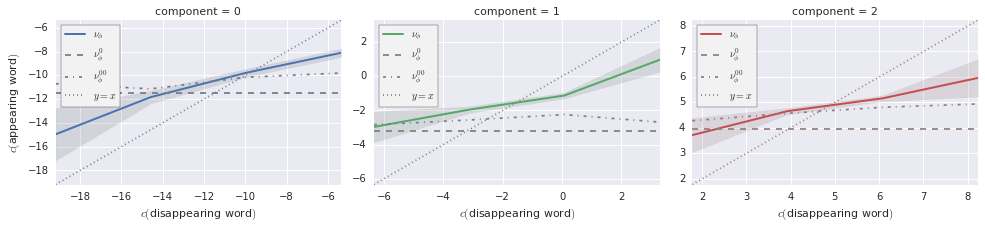

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.55784921  0.18365586  0.15018901  0.04219483  0.03675768]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.712453,-0.085526,0.327760,-0.548574,0.276978,-0.004393
Component-1,0.397477,0.107835,-0.513516,-0.699796,0.277420,0.002923
Component-2,-0.571879,0.102800,-0.774512,0.244408,-0.038108,0.036472


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 72339) |          | Elapsed Time: 0:01:00 ETA:  50 days, 18:51:50

  0% (   99 of 72339) |                    | Elapsed Time: 0:01:01 ETA:  0:11:19

  0% (  197 of 72339) |                    | Elapsed Time: 0:01:02 ETA:  0:11:17

  0% (  304 of 72339) |                    | Elapsed Time: 0:01:03 ETA:  0:10:54

  0% (  411 of 72339) |                    | Elapsed Time: 0:01:04 ETA:  0:10:43

  0% (  525 of 72339) |                    | Elapsed Time: 0:01:05 ETA:  0:10:26

  0% (  638 of 72339) |                    | Elapsed Time: 0:01:06 ETA:  0:10:16

  1% (  753 of 72339) |                    | Elapsed Time: 0:01:07 ETA:  0:10:07

  1% (  872 of 72339) |                    | Elapsed Time: 0:01:08 ETA:  0:09:58

  1% (  905 of 72339) |                    | Elapsed Time: 0:01:08 ETA:  0:09:57

  1% ( 1014 of 72339) |                    | Elapsed Time: 0:01:09 ETA:  0:09:48

  1% ( 1118 of 72339) |                    | Elapsed Time: 0:01:11 ETA:  0:09:43

  1% ( 1233 of 72339) |                    | Elapsed Time: 0:01:12 ETA:  0:09:37

  1% ( 1258 of 72339) |                   | Elapsed Time: 0:16:45 ETA:  22:01:58

  1% ( 1366 of 72339) |                   | Elapsed Time: 0:16:46 ETA:  22:11:30

  2% ( 1477 of 72339) |                   | Elapsed Time: 0:16:47 ETA:  22:14:42

  2% ( 1591 of 72339) |                   | Elapsed Time: 0:16:48 ETA:  22:16:17

  2% ( 1720 of 72339) |                   | Elapsed Time: 0:16:49 ETA:  22:00:18

  2% ( 1809 of 72339) |                   | Elapsed Time: 0:16:49 ETA:  20:37:58

  2% ( 1952 of 72339) |                   | Elapsed Time: 0:16:50 ETA:  19:52:28

  2% ( 2062 of 72339) |                   | Elapsed Time: 0:16:51 ETA:  19:44:45

  2% ( 2132 of 72339) |                   | Elapsed Time: 0:16:52 ETA:  20:44:53

  3% ( 2200 of 72339) |                    | Elapsed Time: 0:16:53 ETA:  0:00:00

  3% ( 2263 of 72339) |                    | Elapsed Time: 0:16:54 ETA:  0:00:00

  3% ( 2329 of 72339) |                    | Elapsed Time: 0:16:55 ETA:  0:00:00

  3% ( 2399 of 72339) |                    | Elapsed Time: 0:16:56 ETA:  0:00:00

  3% ( 2476 of 72339) |                    | Elapsed Time: 0:16:57 ETA:  0:00:00

  3% ( 2541 of 72339) |                    | Elapsed Time: 0:16:58 ETA:  0:00:00

  3% ( 2607 of 72339) |                    | Elapsed Time: 0:16:59 ETA:  0:00:00

  3% ( 2676 of 72339) |                    | Elapsed Time: 0:17:00 ETA:  0:00:50

  3% ( 2713 of 72339) |                    | Elapsed Time: 0:17:01 ETA:  0:01:04

  3% ( 2781 of 72339) |                    | Elapsed Time: 0:17:02 ETA:  0:01:02

  3% ( 2855 of 72339) |                    | Elapsed Time: 0:17:03 ETA:  0:00:42

  4% ( 2980 of 72339) |                    | Elapsed Time: 0:17:04 ETA:  0:00:00

  4% ( 3107 of 72339) |                    | Elapsed Time: 0:17:05 ETA:  0:00:00

  4% ( 3228 of 72339) |                    | Elapsed Time: 0:17:06 ETA:  0:00:00

  4% ( 3334 of 72339) |                    | Elapsed Time: 0:17:07 ETA:  0:00:00

  4% ( 3449 of 72339) |                    | Elapsed Time: 0:17:08 ETA:  0:00:00

  4% ( 3564 of 72339) |                    | Elapsed Time: 0:17:09 ETA:  0:00:00

  5% ( 3617 of 72339) |#                   | Elapsed Time: 0:17:10 ETA:  0:00:00

  5% ( 3738 of 72339) |#                   | Elapsed Time: 0:17:11 ETA:  0:00:00

  5% ( 3865 of 72339) |#                   | Elapsed Time: 0:17:12 ETA:  0:00:00

  5% ( 3994 of 72339) |#                   | Elapsed Time: 0:17:13 ETA:  0:00:00

  5% ( 4109 of 72339) |#                   | Elapsed Time: 0:17:14 ETA:  0:00:00

  5% ( 4238 of 72339) |#                   | Elapsed Time: 0:17:15 ETA:  0:00:00

  6% ( 4363 of 72339) |#                   | Elapsed Time: 0:17:16 ETA:  0:00:00

  6% ( 4489 of 72339) |#                   | Elapsed Time: 0:17:17 ETA:  0:00:00

  6% ( 4522 of 72339) |#                   | Elapsed Time: 0:17:17 ETA:  0:00:00

  6% ( 4650 of 72339) |#                   | Elapsed Time: 0:17:18 ETA:  0:00:00

  6% ( 4775 of 72339) |#                   | Elapsed Time: 0:17:19 ETA:  0:00:00

  6% ( 4899 of 72339) |#                   | Elapsed Time: 0:17:20 ETA:  0:00:00

  6% ( 5003 of 72339) |#                   | Elapsed Time: 0:17:21 ETA:  0:00:00

  7% ( 5104 of 72339) |#                   | Elapsed Time: 0:17:22 ETA:  0:00:00

  7% ( 5195 of 72339) |#                   | Elapsed Time: 0:17:23 ETA:  0:00:00

  7% ( 5252 of 72339) |#                   | Elapsed Time: 0:17:24 ETA:  0:00:00

  7% ( 5382 of 72339) |#                   | Elapsed Time: 0:17:25 ETA:  0:00:00

  7% ( 5426 of 72339) |#                   | Elapsed Time: 0:17:25 ETA:  0:00:00

  7% ( 5557 of 72339) |#                   | Elapsed Time: 0:17:26 ETA:  0:00:00

  7% ( 5679 of 72339) |#                   | Elapsed Time: 0:17:27 ETA:  0:00:00

  7% ( 5784 of 72339) |#                   | Elapsed Time: 0:17:28 ETA:  0:00:00

  8% ( 5863 of 72339) |#                   | Elapsed Time: 0:17:29 ETA:  0:00:00

  8% ( 5951 of 72339) |#                   | Elapsed Time: 0:17:30 ETA:  0:00:00

  8% ( 6015 of 72339) |#                   | Elapsed Time: 0:17:31 ETA:  0:00:00

  8% ( 6113 of 72339) |#                   | Elapsed Time: 0:17:32 ETA:  0:00:00

  8% ( 6252 of 72339) |#                   | Elapsed Time: 0:17:33 ETA:  0:00:00

  8% ( 6330 of 72339) |#                   | Elapsed Time: 0:17:34 ETA:  0:00:00

  8% ( 6427 of 72339) |#                   | Elapsed Time: 0:17:35 ETA:  0:00:00

  9% ( 6514 of 72339) |#                   | Elapsed Time: 0:17:36 ETA:  0:00:00

  9% ( 6601 of 72339) |#                   | Elapsed Time: 0:17:37 ETA:  0:00:00

  9% ( 6697 of 72339) |#                   | Elapsed Time: 0:17:38 ETA:  0:00:00

  9% ( 6799 of 72339) |#                   | Elapsed Time: 0:17:39 ETA:  0:00:00

  9% ( 6940 of 72339) |#                   | Elapsed Time: 0:17:40 ETA:  0:00:00

  9% ( 7061 of 72339) |#                   | Elapsed Time: 0:17:41 ETA:  0:00:00

  9% ( 7189 of 72339) |#                   | Elapsed Time: 0:17:42 ETA:  0:00:00

 10% ( 7234 of 72339) |##                  | Elapsed Time: 0:17:43 ETA:  0:00:00

 10% ( 7339 of 72339) |##                  | Elapsed Time: 0:17:44 ETA:  0:00:00

 10% ( 7441 of 72339) |##                  | Elapsed Time: 0:17:45 ETA:  0:00:00

 10% ( 7542 of 72339) |##                  | Elapsed Time: 0:17:46 ETA:  0:00:00

 10% ( 7649 of 72339) |##                  | Elapsed Time: 0:17:47 ETA:  0:00:00

 10% ( 7754 of 72339) |##                  | Elapsed Time: 0:17:48 ETA:  0:00:00

 10% ( 7846 of 72339) |##                  | Elapsed Time: 0:17:49 ETA:  0:00:00

 11% ( 7959 of 72339) |##                  | Elapsed Time: 0:17:50 ETA:  0:00:00

 11% ( 8070 of 72339) |##                  | Elapsed Time: 0:17:51 ETA:  0:00:00

 11% ( 8139 of 72339) |##                  | Elapsed Time: 0:17:51 ETA:  0:00:00

 11% ( 8253 of 72339) |##                  | Elapsed Time: 0:17:52 ETA:  0:00:00

 11% ( 8369 of 72339) |##                  | Elapsed Time: 0:17:53 ETA:  0:00:00

 11% ( 8487 of 72339) |##                  | Elapsed Time: 0:17:54 ETA:  0:00:00

 11% ( 8598 of 72339) |##                  | Elapsed Time: 0:17:55 ETA:  0:00:00

 12% ( 8709 of 72339) |##                  | Elapsed Time: 0:17:56 ETA:  0:00:00

 12% ( 8816 of 72339) |##                  | Elapsed Time: 0:17:57 ETA:  0:00:00

 12% ( 8924 of 72339) |##                  | Elapsed Time: 0:17:58 ETA:  0:00:00

 12% ( 9043 of 72339) |##                  | Elapsed Time: 0:17:59 ETA:  0:00:00

 12% ( 9152 of 72339) |##                  | Elapsed Time: 0:18:00 ETA:  0:00:00

 12% ( 9278 of 72339) |##                  | Elapsed Time: 0:18:01 ETA:  0:00:00

 12% ( 9390 of 72339) |##                  | Elapsed Time: 0:18:02 ETA:  0:00:00

 13% ( 9516 of 72339) |##                  | Elapsed Time: 0:18:03 ETA:  0:00:00

 13% ( 9651 of 72339) |##                  | Elapsed Time: 0:18:04 ETA:  0:00:00

 13% ( 9770 of 72339) |##                  | Elapsed Time: 0:18:05 ETA:  0:00:00

 13% ( 9889 of 72339) |##                  | Elapsed Time: 0:18:06 ETA:  0:00:00

 13% ( 9947 of 72339) |##                  | Elapsed Time: 0:18:07 ETA:  0:00:00

 13% (10066 of 72339) |##                  | Elapsed Time: 0:18:08 ETA:  0:00:00

 14% (10201 of 72339) |##                  | Elapsed Time: 0:18:09 ETA:  0:00:00

 14% (10342 of 72339) |##                  | Elapsed Time: 0:18:10 ETA:  0:00:00

 14% (10480 of 72339) |##                  | Elapsed Time: 0:18:11 ETA:  0:00:00

 14% (10623 of 72339) |##                  | Elapsed Time: 0:18:12 ETA:  0:00:00

 14% (10770 of 72339) |##                  | Elapsed Time: 0:18:13 ETA:  0:00:00

 15% (10851 of 72339) |###                 | Elapsed Time: 0:18:14 ETA:  0:00:00

 15% (10997 of 72339) |###                 | Elapsed Time: 0:18:15 ETA:  0:00:00

 15% (11142 of 72339) |###                 | Elapsed Time: 0:18:16 ETA:  0:00:00

 15% (11271 of 72339) |###                 | Elapsed Time: 0:18:17 ETA:  0:00:00

 15% (11394 of 72339) |###                 | Elapsed Time: 0:18:18 ETA:  0:00:00

 15% (11518 of 72339) |###                 | Elapsed Time: 0:18:19 ETA:  0:00:00

 16% (11640 of 72339) |###                 | Elapsed Time: 0:18:20 ETA:  0:00:00

 16% (11756 of 72339) |###                 | Elapsed Time: 0:18:21 ETA:  0:00:00

 16% (11869 of 72339) |###                 | Elapsed Time: 0:18:22 ETA:  0:00:00

 16% (11982 of 72339) |###                 | Elapsed Time: 0:18:23 ETA:  0:00:00

 16% (12090 of 72339) |###                 | Elapsed Time: 0:18:24 ETA:  0:00:00

 16% (12207 of 72339) |###                 | Elapsed Time: 0:18:25 ETA:  0:00:00

 17% (12322 of 72339) |###                 | Elapsed Time: 0:18:26 ETA:  0:00:00

 17% (12439 of 72339) |###                 | Elapsed Time: 0:18:27 ETA:  0:00:00

 17% (12549 of 72339) |###                 | Elapsed Time: 0:18:28 ETA:  0:00:00

 17% (12660 of 72339) |###                 | Elapsed Time: 0:18:29 ETA:  0:00:00

 17% (12785 of 72339) |###                 | Elapsed Time: 0:18:30 ETA:  0:00:00

 17% (12904 of 72339) |###                 | Elapsed Time: 0:18:31 ETA:  0:00:00

 17% (13017 of 72339) |###                 | Elapsed Time: 0:18:32 ETA:  0:00:00

 18% (13128 of 72339) |###                 | Elapsed Time: 0:18:33 ETA:  0:00:00

 18% (13257 of 72339) |###                 | Elapsed Time: 0:18:34 ETA:  0:00:00

 18% (13378 of 72339) |###                 | Elapsed Time: 0:18:35 ETA:  0:00:00

 18% (13499 of 72339) |###                 | Elapsed Time: 0:18:36 ETA:  0:00:00

 18% (13564 of 72339) |###                 | Elapsed Time: 0:18:36 ETA:  0:00:00

 18% (13681 of 72339) |###                 | Elapsed Time: 0:18:37 ETA:  0:00:00

 19% (13799 of 72339) |###                 | Elapsed Time: 0:18:38 ETA:  0:00:00

 19% (13905 of 72339) |###                 | Elapsed Time: 0:18:39 ETA:  0:00:00

 19% (14036 of 72339) |###                 | Elapsed Time: 0:18:40 ETA:  0:00:00

 19% (14158 of 72339) |###                 | Elapsed Time: 0:18:41 ETA:  0:00:00

 19% (14282 of 72339) |###                 | Elapsed Time: 0:18:42 ETA:  0:00:00

 19% (14411 of 72339) |###                 | Elapsed Time: 0:18:43 ETA:  0:00:00

 20% (14468 of 72339) |####                | Elapsed Time: 0:18:44 ETA:  0:00:00

 20% (14570 of 72339) |####                | Elapsed Time: 0:18:45 ETA:  0:00:00

 20% (14681 of 72339) |####                | Elapsed Time: 0:18:46 ETA:  0:00:00

 20% (14787 of 72339) |####                | Elapsed Time: 0:18:47 ETA:  0:00:00

 20% (14856 of 72339) |####                | Elapsed Time: 0:18:48 ETA:  0:00:00

 20% (14938 of 72339) |####                | Elapsed Time: 0:18:49 ETA:  0:00:00

 20% (15040 of 72339) |####                | Elapsed Time: 0:18:50 ETA:  0:00:00

 20% (15174 of 72339) |####                | Elapsed Time: 0:18:51 ETA:  0:00:00

 21% (15305 of 72339) |####                | Elapsed Time: 0:18:52 ETA:  0:00:00

 21% (15373 of 72339) |####                | Elapsed Time: 0:18:52 ETA:  0:00:00

 21% (15497 of 72339) |####                | Elapsed Time: 0:18:53 ETA:  0:00:00

 21% (15621 of 72339) |####                | Elapsed Time: 0:18:54 ETA:  0:00:00

 21% (15713 of 72339) |####                | Elapsed Time: 0:18:55 ETA:  0:00:00

 21% (15850 of 72339) |####                | Elapsed Time: 0:18:56 ETA:  0:00:00

 22% (15987 of 72339) |####                | Elapsed Time: 0:18:57 ETA:  0:00:00

 22% (16134 of 72339) |####                | Elapsed Time: 0:18:58 ETA:  0:00:00

 22% (16277 of 72339) |####                | Elapsed Time: 0:18:59 ETA:  0:00:00

 22% (16416 of 72339) |####                | Elapsed Time: 0:19:01 ETA:  0:00:00

 22% (16576 of 72339) |####                | Elapsed Time: 0:19:02 ETA:  0:00:00

 23% (16739 of 72339) |####                | Elapsed Time: 0:19:03 ETA:  0:00:00

 23% (16886 of 72339) |####                | Elapsed Time: 0:19:04 ETA:  0:00:00

 23% (16979 of 72339) |####                | Elapsed Time: 0:19:05 ETA:  0:00:00

 23% (17075 of 72339) |####                | Elapsed Time: 0:19:06 ETA:  0:00:00

 23% (17181 of 72339) |####                | Elapsed Time: 0:19:07 ETA:  0:00:00

 23% (17301 of 72339) |####                | Elapsed Time: 0:19:08 ETA:  0:00:00

 24% (17446 of 72339) |####                | Elapsed Time: 0:19:09 ETA:  0:00:00

 24% (17588 of 72339) |####                | Elapsed Time: 0:19:10 ETA:  0:00:00

 24% (17732 of 72339) |####                | Elapsed Time: 0:19:11 ETA:  0:00:00

 24% (17866 of 72339) |####                | Elapsed Time: 0:19:12 ETA:  0:00:00

 24% (18007 of 72339) |####                | Elapsed Time: 0:19:13 ETA:  0:00:00

 25% (18085 of 72339) |#####               | Elapsed Time: 0:19:13 ETA:  0:00:00

 25% (18218 of 72339) |#####               | Elapsed Time: 0:19:14 ETA:  0:00:00

 25% (18327 of 72339) |#####               | Elapsed Time: 0:19:15 ETA:  0:00:00

 25% (18438 of 72339) |#####               | Elapsed Time: 0:19:16 ETA:  0:00:00

 25% (18540 of 72339) |#####               | Elapsed Time: 0:19:17 ETA:  0:00:00

 25% (18674 of 72339) |#####               | Elapsed Time: 0:19:18 ETA:  0:00:00

 26% (18826 of 72339) |#####               | Elapsed Time: 0:19:19 ETA:  0:00:00

 26% (18950 of 72339) |#####               | Elapsed Time: 0:19:20 ETA:  0:00:00

 26% (18989 of 72339) |#####               | Elapsed Time: 0:19:21 ETA:  0:00:00

 26% (19108 of 72339) |#####               | Elapsed Time: 0:19:22 ETA:  0:00:00

 26% (19230 of 72339) |#####               | Elapsed Time: 0:19:23 ETA:  0:00:00

 26% (19350 of 72339) |#####               | Elapsed Time: 0:19:24 ETA:  0:00:00

 26% (19477 of 72339) |#####               | Elapsed Time: 0:19:25 ETA:  0:00:00

 27% (19599 of 72339) |#####               | Elapsed Time: 0:19:26 ETA:  0:00:00

 27% (19722 of 72339) |#####               | Elapsed Time: 0:19:27 ETA:  0:00:00

 27% (19843 of 72339) |#####               | Elapsed Time: 0:19:28 ETA:  0:00:00

 27% (19894 of 72339) |#####               | Elapsed Time: 0:19:28 ETA:  0:00:00

 27% (20020 of 72339) |#####               | Elapsed Time: 0:19:29 ETA:  0:00:00

 27% (20154 of 72339) |#####               | Elapsed Time: 0:19:30 ETA:  0:00:00

 28% (20301 of 72339) |#####               | Elapsed Time: 0:19:31 ETA:  0:00:00

 28% (20431 of 72339) |#####               | Elapsed Time: 0:19:32 ETA:  0:00:00

 28% (20565 of 72339) |#####               | Elapsed Time: 0:19:33 ETA:  0:00:00

 28% (20696 of 72339) |#####               | Elapsed Time: 0:19:34 ETA:  0:00:00

 28% (20798 of 72339) |#####               | Elapsed Time: 0:19:35 ETA:  0:00:00

 28% (20942 of 72339) |#####               | Elapsed Time: 0:19:36 ETA:  0:00:00

 29% (21071 of 72339) |#####               | Elapsed Time: 0:19:37 ETA:  0:00:00

 29% (21196 of 72339) |#####               | Elapsed Time: 0:19:38 ETA:  0:00:00

 29% (21358 of 72339) |#####               | Elapsed Time: 0:19:39 ETA:  0:00:00

 29% (21504 of 72339) |#####               | Elapsed Time: 0:19:40 ETA:  0:00:00

 29% (21656 of 72339) |#####               | Elapsed Time: 0:19:41 ETA:  0:00:00

 30% (21702 of 72339) |######              | Elapsed Time: 0:19:41 ETA:  0:00:00

 30% (21845 of 72339) |######              | Elapsed Time: 0:19:42 ETA:  0:00:00

 30% (21972 of 72339) |######              | Elapsed Time: 0:19:43 ETA:  0:00:00

 30% (22088 of 72339) |######              | Elapsed Time: 0:19:44 ETA:  0:00:00

 30% (22214 of 72339) |######              | Elapsed Time: 0:19:45 ETA:  0:00:00

 30% (22370 of 72339) |######              | Elapsed Time: 0:19:46 ETA:  0:00:00

 31% (22533 of 72339) |######              | Elapsed Time: 0:19:47 ETA:  0:00:00

 31% (22606 of 72339) |######              | Elapsed Time: 0:19:48 ETA:  0:00:00

 31% (22776 of 72339) |######              | Elapsed Time: 0:19:49 ETA:  0:00:00

 31% (22947 of 72339) |######              | Elapsed Time: 0:19:50 ETA:  0:00:00

 31% (23094 of 72339) |######              | Elapsed Time: 0:19:51 ETA:  0:00:00

 32% (23228 of 72339) |######              | Elapsed Time: 0:19:52 ETA:  0:00:00

 32% (23337 of 72339) |######              | Elapsed Time: 0:19:53 ETA:  0:00:00

 32% (23426 of 72339) |######              | Elapsed Time: 0:19:54 ETA:  0:00:00

 32% (23511 of 72339) |######              | Elapsed Time: 0:19:55 ETA:  0:00:00

 32% (23639 of 72339) |######              | Elapsed Time: 0:19:56 ETA:  0:00:00

 32% (23758 of 72339) |######              | Elapsed Time: 0:19:57 ETA:  0:00:00

 32% (23869 of 72339) |######              | Elapsed Time: 0:19:58 ETA:  0:00:00

 33% (23969 of 72339) |######              | Elapsed Time: 0:19:59 ETA:  0:00:00

 33% (24071 of 72339) |######              | Elapsed Time: 0:20:00 ETA:  0:00:00

 33% (24199 of 72339) |######              | Elapsed Time: 0:20:01 ETA:  0:00:00

 33% (24322 of 72339) |######              | Elapsed Time: 0:20:02 ETA:  0:00:00

 33% (24415 of 72339) |######              | Elapsed Time: 0:20:02 ETA:  0:00:00

 33% (24538 of 72339) |######              | Elapsed Time: 0:20:03 ETA:  0:00:00

 34% (24641 of 72339) |######              | Elapsed Time: 0:20:04 ETA:  0:00:00

 34% (24753 of 72339) |######              | Elapsed Time: 0:20:05 ETA:  0:00:00

 34% (24904 of 72339) |######              | Elapsed Time: 0:20:06 ETA:  0:00:00

 34% (25060 of 72339) |######              | Elapsed Time: 0:20:07 ETA:  0:00:00

 34% (25157 of 72339) |######              | Elapsed Time: 0:20:08 ETA:  0:00:00

 34% (25291 of 72339) |######              | Elapsed Time: 0:20:09 ETA:  0:00:00

 35% (25319 of 72339) |#######             | Elapsed Time: 0:20:10 ETA:  0:00:00

 35% (25389 of 72339) |#######             | Elapsed Time: 0:20:11 ETA:  0:00:00

 35% (25520 of 72339) |#######             | Elapsed Time: 0:20:12 ETA:  0:00:00

 35% (25679 of 72339) |#######             | Elapsed Time: 0:20:13 ETA:  0:00:00

 35% (25799 of 72339) |#######             | Elapsed Time: 0:20:14 ETA:  0:00:00

 35% (25908 of 72339) |#######             | Elapsed Time: 0:20:15 ETA:  0:00:00

 35% (26022 of 72339) |#######             | Elapsed Time: 0:20:16 ETA:  0:00:00

 36% (26140 of 72339) |#######             | Elapsed Time: 0:20:17 ETA:  0:00:00

 36% (26223 of 72339) |#######             | Elapsed Time: 0:20:17 ETA:  0:00:00

 36% (26340 of 72339) |#######             | Elapsed Time: 0:20:18 ETA:  0:00:00

 36% (26486 of 72339) |#######             | Elapsed Time: 0:20:19 ETA:  0:00:00

 36% (26631 of 72339) |#######             | Elapsed Time: 0:20:20 ETA:  0:00:00

 37% (26768 of 72339) |#######             | Elapsed Time: 0:20:21 ETA:  0:00:00

 37% (26899 of 72339) |#######             | Elapsed Time: 0:20:22 ETA:  0:00:00

 37% (27002 of 72339) |#######             | Elapsed Time: 0:20:23 ETA:  0:00:00

 37% (27128 of 72339) |#######             | Elapsed Time: 0:20:24 ETA:  0:00:00

 37% (27244 of 72339) |#######             | Elapsed Time: 0:20:25 ETA:  0:00:00

 37% (27373 of 72339) |#######             | Elapsed Time: 0:20:26 ETA:  0:00:00

 38% (27508 of 72339) |#######             | Elapsed Time: 0:20:27 ETA:  0:00:00

 38% (27632 of 72339) |#######             | Elapsed Time: 0:20:28 ETA:  0:00:00

 38% (27797 of 72339) |#######             | Elapsed Time: 0:20:29 ETA:  0:00:00

 38% (27919 of 72339) |#######             | Elapsed Time: 0:20:30 ETA:  0:00:00

 38% (28013 of 72339) |#######             | Elapsed Time: 0:20:31 ETA:  0:00:00

 38% (28032 of 72339) |#######             | Elapsed Time: 0:20:32 ETA:  0:00:00

 38% (28166 of 72339) |#######             | Elapsed Time: 0:20:33 ETA:  0:00:00

 39% (28271 of 72339) |#######             | Elapsed Time: 0:20:34 ETA:  0:00:00

 39% (28388 of 72339) |#######             | Elapsed Time: 0:20:35 ETA:  0:00:00

 39% (28529 of 72339) |#######             | Elapsed Time: 0:20:36 ETA:  0:00:00

 39% (28663 of 72339) |#######             | Elapsed Time: 0:20:37 ETA:  0:00:00

 39% (28795 of 72339) |#######             | Elapsed Time: 0:20:38 ETA:  0:00:00

 40% (28936 of 72339) |########            | Elapsed Time: 0:20:39 ETA:  0:00:00

 40% (29065 of 72339) |########            | Elapsed Time: 0:20:40 ETA:  0:00:00

 40% (29198 of 72339) |########            | Elapsed Time: 0:20:41 ETA:  0:00:00

 40% (29339 of 72339) |########            | Elapsed Time: 0:20:42 ETA:  0:00:00

 40% (29478 of 72339) |########            | Elapsed Time: 0:20:43 ETA:  0:00:00

 40% (29596 of 72339) |########            | Elapsed Time: 0:20:44 ETA:  0:00:00

 41% (29748 of 72339) |########            | Elapsed Time: 0:20:45 ETA:  0:00:00

 41% (29840 of 72339) |########            | Elapsed Time: 0:20:45 ETA:  0:00:00

 41% (29981 of 72339) |########            | Elapsed Time: 0:20:46 ETA:  0:00:00

 41% (30119 of 72339) |########            | Elapsed Time: 0:20:47 ETA:  0:00:00

 41% (30252 of 72339) |########            | Elapsed Time: 0:20:48 ETA:  0:00:00

 41% (30381 of 72339) |########            | Elapsed Time: 0:20:49 ETA:  0:00:00

 42% (30504 of 72339) |########            | Elapsed Time: 0:20:50 ETA:  0:00:00

 42% (30634 of 72339) |########            | Elapsed Time: 0:20:51 ETA:  0:00:00

 42% (30745 of 72339) |########            | Elapsed Time: 0:20:52 ETA:  0:00:00

 42% (30874 of 72339) |########            | Elapsed Time: 0:20:53 ETA:  0:00:00

 42% (31017 of 72339) |########            | Elapsed Time: 0:20:54 ETA:  0:00:00

 43% (31124 of 72339) |########            | Elapsed Time: 0:20:55 ETA:  0:00:00

 43% (31230 of 72339) |########            | Elapsed Time: 0:20:56 ETA:  0:00:00

 43% (31358 of 72339) |########            | Elapsed Time: 0:20:57 ETA:  0:00:00

 43% (31496 of 72339) |########            | Elapsed Time: 0:20:58 ETA:  0:00:00

 43% (31579 of 72339) |########            | Elapsed Time: 0:20:59 ETA:  0:00:00

 43% (31649 of 72339) |########            | Elapsed Time: 0:21:00 ETA:  0:00:00

 43% (31787 of 72339) |########            | Elapsed Time: 0:21:01 ETA:  0:00:00

 44% (31911 of 72339) |########            | Elapsed Time: 0:21:02 ETA:  0:00:00

 44% (32037 of 72339) |########            | Elapsed Time: 0:21:03 ETA:  0:00:00

 44% (32170 of 72339) |########            | Elapsed Time: 0:21:04 ETA:  0:00:00

 44% (32312 of 72339) |########            | Elapsed Time: 0:21:05 ETA:  0:00:00

 44% (32406 of 72339) |########            | Elapsed Time: 0:21:06 ETA:  0:00:00

 44% (32518 of 72339) |########            | Elapsed Time: 0:21:07 ETA:  0:00:00

 45% (32553 of 72339) |#########           | Elapsed Time: 0:21:07 ETA:  0:00:00

 45% (32676 of 72339) |#########           | Elapsed Time: 0:21:08 ETA:  0:00:00

 45% (32792 of 72339) |#########           | Elapsed Time: 0:21:09 ETA:  0:00:00

 45% (32932 of 72339) |#########           | Elapsed Time: 0:21:10 ETA:  0:00:00

 45% (33067 of 72339) |#########           | Elapsed Time: 0:21:11 ETA:  0:00:00

 45% (33190 of 72339) |#########           | Elapsed Time: 0:21:12 ETA:  0:00:00

 46% (33281 of 72339) |#########           | Elapsed Time: 0:21:13 ETA:  0:00:00

 46% (33396 of 72339) |#########           | Elapsed Time: 0:21:14 ETA:  0:00:00

 46% (33457 of 72339) |#########           | Elapsed Time: 0:21:15 ETA:  0:00:00

 46% (33589 of 72339) |#########           | Elapsed Time: 0:21:16 ETA:  0:00:00

 46% (33715 of 72339) |#########           | Elapsed Time: 0:21:17 ETA:  0:00:00

 46% (33859 of 72339) |#########           | Elapsed Time: 0:21:18 ETA:  0:00:00

 47% (34009 of 72339) |#########           | Elapsed Time: 0:21:19 ETA:  0:00:00

 47% (34135 of 72339) |#########           | Elapsed Time: 0:21:20 ETA:  0:00:00

 47% (34264 of 72339) |#########           | Elapsed Time: 0:21:21 ETA:  0:00:00

 47% (34362 of 72339) |#########           | Elapsed Time: 0:21:22 ETA:  0:00:00

 47% (34478 of 72339) |#########           | Elapsed Time: 0:21:23 ETA:  0:00:00

 47% (34601 of 72339) |#########           | Elapsed Time: 0:21:24 ETA:  0:00:00

 48% (34752 of 72339) |#########           | Elapsed Time: 0:21:25 ETA:  0:00:00

 48% (34882 of 72339) |#########           | Elapsed Time: 0:21:26 ETA:  0:00:00

 48% (35012 of 72339) |#########           | Elapsed Time: 0:21:27 ETA:  0:00:00

 48% (35144 of 72339) |#########           | Elapsed Time: 0:21:28 ETA:  0:00:00

 48% (35266 of 72339) |#########           | Elapsed Time: 0:21:29 ETA:  0:00:00

 48% (35407 of 72339) |#########           | Elapsed Time: 0:21:30 ETA:  0:00:00

 49% (35542 of 72339) |#########           | Elapsed Time: 0:21:31 ETA:  0:00:00

 49% (35691 of 72339) |#########           | Elapsed Time: 0:21:32 ETA:  0:00:00

 49% (35850 of 72339) |#########           | Elapsed Time: 0:21:33 ETA:  0:00:00

 49% (35993 of 72339) |#########           | Elapsed Time: 0:21:34 ETA:  0:00:00

 50% (36170 of 72339) |##########          | Elapsed Time: 0:21:35 ETA:  0:00:00

 50% (36291 of 72339) |##########          | Elapsed Time: 0:21:36 ETA:  0:00:00

 50% (36386 of 72339) |##########          | Elapsed Time: 0:21:37 ETA:  0:00:00

 50% (36511 of 72339) |##########          | Elapsed Time: 0:21:38 ETA:  0:00:00

 50% (36655 of 72339) |##########          | Elapsed Time: 0:21:39 ETA:  0:00:00

 50% (36783 of 72339) |##########          | Elapsed Time: 0:21:40 ETA:  0:00:00

 51% (36920 of 72339) |##########          | Elapsed Time: 0:21:41 ETA:  0:00:00

 51% (37074 of 72339) |##########          | Elapsed Time: 0:21:42 ETA:  0:00:00

 51% (37227 of 72339) |##########          | Elapsed Time: 0:21:43 ETA:  0:00:00

 51% (37362 of 72339) |##########          | Elapsed Time: 0:21:44 ETA:  0:00:00

 51% (37493 of 72339) |##########          | Elapsed Time: 0:21:45 ETA:  0:00:00

 51% (37613 of 72339) |##########          | Elapsed Time: 0:21:46 ETA:  0:00:00

 52% (37727 of 72339) |##########          | Elapsed Time: 0:21:47 ETA:  0:00:00

 52% (37843 of 72339) |##########          | Elapsed Time: 0:21:48 ETA:  0:00:00

 52% (37951 of 72339) |##########          | Elapsed Time: 0:21:49 ETA:  0:00:00

 52% (37978 of 72339) |##########          | Elapsed Time: 0:21:49 ETA:  0:00:00

 52% (38094 of 72339) |##########          | Elapsed Time: 0:21:50 ETA:  0:00:00

 52% (38216 of 72339) |##########          | Elapsed Time: 0:21:51 ETA:  0:00:00

 52% (38331 of 72339) |##########          | Elapsed Time: 0:21:52 ETA:  0:00:00

 53% (38454 of 72339) |##########          | Elapsed Time: 0:21:53 ETA:  0:00:00

 53% (38592 of 72339) |##########          | Elapsed Time: 0:21:54 ETA:  0:00:00

 53% (38747 of 72339) |##########          | Elapsed Time: 0:21:55 ETA:  0:00:00

 53% (38883 of 72339) |##########          | Elapsed Time: 0:21:56 ETA:  0:00:00

 53% (39032 of 72339) |##########          | Elapsed Time: 0:21:57 ETA:  0:00:00

 54% (39148 of 72339) |##########          | Elapsed Time: 0:21:58 ETA:  0:00:00

 54% (39270 of 72339) |##########          | Elapsed Time: 0:21:59 ETA:  0:00:00

 54% (39395 of 72339) |##########          | Elapsed Time: 0:22:00 ETA:  0:00:00

 54% (39529 of 72339) |##########          | Elapsed Time: 0:22:01 ETA:  0:00:00

 54% (39648 of 72339) |##########          | Elapsed Time: 0:22:02 ETA:  0:00:00

 55% (39787 of 72339) |###########         | Elapsed Time: 0:22:03 ETA:  0:00:00

 55% (39927 of 72339) |###########         | Elapsed Time: 0:22:04 ETA:  0:00:00

 55% (40079 of 72339) |###########         | Elapsed Time: 0:22:05 ETA:  0:00:00

 55% (40204 of 72339) |###########         | Elapsed Time: 0:22:06 ETA:  0:00:00

 55% (40341 of 72339) |###########         | Elapsed Time: 0:22:07 ETA:  0:00:00

 55% (40465 of 72339) |###########         | Elapsed Time: 0:22:08 ETA:  0:00:00

 56% (40602 of 72339) |###########         | Elapsed Time: 0:22:09 ETA:  0:00:00

 56% (40691 of 72339) |###########         | Elapsed Time: 0:22:10 ETA:  0:00:00

 56% (40828 of 72339) |###########         | Elapsed Time: 0:22:11 ETA:  0:00:00

 56% (40952 of 72339) |###########         | Elapsed Time: 0:22:12 ETA:  0:00:00

 56% (41115 of 72339) |###########         | Elapsed Time: 0:22:13 ETA:  0:00:00

 57% (41279 of 72339) |###########         | Elapsed Time: 0:22:14 ETA:  0:00:00

 57% (41412 of 72339) |###########         | Elapsed Time: 0:22:15 ETA:  0:00:00

 57% (41551 of 72339) |###########         | Elapsed Time: 0:22:16 ETA:  0:00:00

 57% (41595 of 72339) |###########         | Elapsed Time: 0:22:16 ETA:  0:00:00

 57% (41731 of 72339) |###########         | Elapsed Time: 0:22:17 ETA:  0:00:00

 57% (41851 of 72339) |###########         | Elapsed Time: 0:22:18 ETA:  0:00:00

 58% (41985 of 72339) |###########         | Elapsed Time: 0:22:19 ETA:  0:00:00

 58% (42107 of 72339) |###########         | Elapsed Time: 0:22:20 ETA:  0:00:00

 58% (42201 of 72339) |###########         | Elapsed Time: 0:22:21 ETA:  0:00:00

 58% (42358 of 72339) |###########         | Elapsed Time: 0:22:22 ETA:  0:00:00

 58% (42500 of 72339) |###########         | Elapsed Time: 0:22:23 ETA:  0:00:00

 58% (42636 of 72339) |###########         | Elapsed Time: 0:22:24 ETA:  0:00:00

 59% (42772 of 72339) |###########         | Elapsed Time: 0:22:25 ETA:  0:00:00

 59% (42906 of 72339) |###########         | Elapsed Time: 0:22:26 ETA:  0:00:00

 59% (43042 of 72339) |###########         | Elapsed Time: 0:22:27 ETA:  0:00:00

 59% (43172 of 72339) |###########         | Elapsed Time: 0:22:28 ETA:  0:00:00

 59% (43318 of 72339) |###########         | Elapsed Time: 0:22:29 ETA:  0:00:00

 60% (43404 of 72339) |############        | Elapsed Time: 0:22:30 ETA:  0:00:00

 60% (43534 of 72339) |############        | Elapsed Time: 0:22:31 ETA:  0:00:00

 60% (43655 of 72339) |############        | Elapsed Time: 0:22:32 ETA:  0:00:00

 60% (43799 of 72339) |############        | Elapsed Time: 0:22:33 ETA:  0:00:00

 60% (43934 of 72339) |############        | Elapsed Time: 0:22:34 ETA:  0:00:00

 60% (44066 of 72339) |############        | Elapsed Time: 0:22:35 ETA:  0:00:00

 61% (44202 of 72339) |############        | Elapsed Time: 0:22:36 ETA:  0:00:00

 61% (44308 of 72339) |############        | Elapsed Time: 0:22:37 ETA:  0:00:00

 61% (44446 of 72339) |############        | Elapsed Time: 0:22:38 ETA:  0:00:00

 61% (44584 of 72339) |############        | Elapsed Time: 0:22:39 ETA:  0:00:00

 61% (44696 of 72339) |############        | Elapsed Time: 0:22:40 ETA:  0:00:00

 61% (44806 of 72339) |############        | Elapsed Time: 0:22:41 ETA:  0:00:00

 62% (44892 of 72339) |############        | Elapsed Time: 0:22:42 ETA:  0:00:00

 62% (44981 of 72339) |############        | Elapsed Time: 0:22:43 ETA:  0:00:00

 62% (45070 of 72339) |############        | Elapsed Time: 0:22:44 ETA:  0:00:00

 62% (45184 of 72339) |############        | Elapsed Time: 0:22:45 ETA:  0:00:00

 62% (45212 of 72339) |############        | Elapsed Time: 0:22:45 ETA:  0:00:00

 62% (45335 of 72339) |############        | Elapsed Time: 0:22:46 ETA:  0:00:00

 62% (45462 of 72339) |############        | Elapsed Time: 0:22:47 ETA:  0:00:00

 63% (45600 of 72339) |############        | Elapsed Time: 0:22:48 ETA:  0:00:00

 63% (45732 of 72339) |############        | Elapsed Time: 0:22:49 ETA:  0:00:00

 63% (45839 of 72339) |############        | Elapsed Time: 0:22:50 ETA:  0:00:00

 63% (45984 of 72339) |############        | Elapsed Time: 0:22:51 ETA:  0:00:00

 63% (46117 of 72339) |############        | Elapsed Time: 0:22:52 ETA:  0:00:00

 63% (46267 of 72339) |############        | Elapsed Time: 0:22:53 ETA:  0:00:00

 64% (46346 of 72339) |############        | Elapsed Time: 0:22:54 ETA:  0:00:00

 64% (46431 of 72339) |############        | Elapsed Time: 0:22:55 ETA:  0:00:00

 64% (46579 of 72339) |############        | Elapsed Time: 0:22:56 ETA:  0:00:00

 64% (46735 of 72339) |############        | Elapsed Time: 0:22:57 ETA:  0:00:00

 64% (46881 of 72339) |############        | Elapsed Time: 0:22:58 ETA:  0:00:00

 65% (47021 of 72339) |#############       | Elapsed Time: 0:22:59 ETA:  0:00:00

 65% (47149 of 72339) |#############       | Elapsed Time: 0:23:00 ETA:  0:00:00

 65% (47257 of 72339) |#############       | Elapsed Time: 0:23:01 ETA:  0:00:00

 65% (47344 of 72339) |#############       | Elapsed Time: 0:23:02 ETA:  0:00:00

 65% (47483 of 72339) |#############       | Elapsed Time: 0:23:03 ETA:  0:00:00

 65% (47612 of 72339) |#############       | Elapsed Time: 0:23:04 ETA:  0:00:00

 66% (47748 of 72339) |#############       | Elapsed Time: 0:23:05 ETA:  0:00:00

 66% (47890 of 72339) |#############       | Elapsed Time: 0:23:06 ETA:  0:00:00

 66% (47925 of 72339) |#############       | Elapsed Time: 0:23:06 ETA:  0:00:00

 66% (48052 of 72339) |#############       | Elapsed Time: 0:23:07 ETA:  0:00:00

 66% (48196 of 72339) |#############       | Elapsed Time: 0:23:08 ETA:  0:00:00

 66% (48338 of 72339) |#############       | Elapsed Time: 0:23:09 ETA:  0:00:00

 66% (48455 of 72339) |#############       | Elapsed Time: 0:23:10 ETA:  0:00:00

 67% (48602 of 72339) |#############       | Elapsed Time: 0:23:11 ETA:  0:00:00

 67% (48737 of 72339) |#############       | Elapsed Time: 0:23:12 ETA:  0:00:00

 67% (48829 of 72339) |#############       | Elapsed Time: 0:23:13 ETA:  0:00:00

 67% (48956 of 72339) |#############       | Elapsed Time: 0:23:14 ETA:  0:00:00

 67% (49065 of 72339) |#############       | Elapsed Time: 0:23:15 ETA:  0:00:00

 67% (49167 of 72339) |#############       | Elapsed Time: 0:23:16 ETA:  0:00:00

 68% (49291 of 72339) |#############       | Elapsed Time: 0:23:17 ETA:  0:00:00

 68% (49407 of 72339) |#############       | Elapsed Time: 0:23:18 ETA:  0:00:00

 68% (49499 of 72339) |#############       | Elapsed Time: 0:23:19 ETA:  0:00:00

 68% (49614 of 72339) |#############       | Elapsed Time: 0:23:20 ETA:  0:00:00

 68% (49734 of 72339) |#############       | Elapsed Time: 0:23:21 ETA:  0:00:00

 68% (49833 of 72339) |#############       | Elapsed Time: 0:23:22 ETA:  0:00:00

 69% (49925 of 72339) |#############       | Elapsed Time: 0:23:23 ETA:  0:00:00

 69% (50003 of 72339) |#############       | Elapsed Time: 0:23:24 ETA:  0:00:00

 69% (50085 of 72339) |#############       | Elapsed Time: 0:23:25 ETA:  0:00:00

 69% (50166 of 72339) |#############       | Elapsed Time: 0:23:26 ETA:  0:00:00

 69% (50237 of 72339) |#############       | Elapsed Time: 0:23:27 ETA:  0:00:00

 69% (50310 of 72339) |#############       | Elapsed Time: 0:23:28 ETA:  0:00:00

 69% (50412 of 72339) |#############       | Elapsed Time: 0:23:29 ETA:  0:00:00

 69% (50504 of 72339) |#############       | Elapsed Time: 0:23:30 ETA:  0:00:00

 69% (50583 of 72339) |#############       | Elapsed Time: 0:23:31 ETA:  0:00:00

 70% (50638 of 72339) |##############      | Elapsed Time: 0:23:32 ETA:  0:00:00

 70% (50712 of 72339) |##############      | Elapsed Time: 0:23:33 ETA:  0:00:00

 70% (50819 of 72339) |##############      | Elapsed Time: 0:23:34 ETA:  0:00:00

 70% (50925 of 72339) |##############      | Elapsed Time: 0:23:35 ETA:  0:00:00

 70% (51011 of 72339) |##############      | Elapsed Time: 0:23:36 ETA:  0:00:00

 70% (51116 of 72339) |##############      | Elapsed Time: 0:23:37 ETA:  0:00:00

 70% (51212 of 72339) |##############      | Elapsed Time: 0:23:38 ETA:  0:00:00

 70% (51267 of 72339) |##############      | Elapsed Time: 0:23:39 ETA:  0:00:00

 70% (51358 of 72339) |##############      | Elapsed Time: 0:23:40 ETA:  0:00:00

 71% (51464 of 72339) |##############      | Elapsed Time: 0:23:41 ETA:  0:00:00

 71% (51542 of 72339) |##############      | Elapsed Time: 0:23:41 ETA:  0:00:00

 71% (51653 of 72339) |##############      | Elapsed Time: 0:23:42 ETA:  0:00:00

 71% (51777 of 72339) |##############      | Elapsed Time: 0:23:43 ETA:  0:00:00

 71% (51927 of 72339) |##############      | Elapsed Time: 0:23:44 ETA:  0:00:00

 71% (52060 of 72339) |##############      | Elapsed Time: 0:23:45 ETA:  0:00:00

 72% (52146 of 72339) |##############      | Elapsed Time: 0:23:46 ETA:  0:00:00

 72% (52288 of 72339) |##############      | Elapsed Time: 0:23:47 ETA:  0:00:00

 72% (52396 of 72339) |##############      | Elapsed Time: 0:23:48 ETA:  0:00:00

 72% (52446 of 72339) |##############      | Elapsed Time: 0:23:49 ETA:  0:00:00

 72% (52581 of 72339) |##############      | Elapsed Time: 0:23:50 ETA:  0:00:00

 72% (52741 of 72339) |##############      | Elapsed Time: 0:23:51 ETA:  0:00:00

 73% (52847 of 72339) |##############      | Elapsed Time: 0:23:52 ETA:  0:00:00

 73% (52989 of 72339) |##############      | Elapsed Time: 0:23:53 ETA:  0:00:00

 73% (53129 of 72339) |##############      | Elapsed Time: 0:23:54 ETA:  0:00:00

 73% (53289 of 72339) |##############      | Elapsed Time: 0:23:55 ETA:  0:00:00

 73% (53351 of 72339) |##############      | Elapsed Time: 0:23:55 ETA:  0:00:00

 73% (53434 of 72339) |##############      | Elapsed Time: 0:23:56 ETA:  0:00:00

 74% (53572 of 72339) |##############      | Elapsed Time: 0:23:57 ETA:  0:00:00

 74% (53722 of 72339) |##############      | Elapsed Time: 0:23:58 ETA:  0:00:00

 74% (53848 of 72339) |##############      | Elapsed Time: 0:23:59 ETA:  0:00:00

 74% (53975 of 72339) |##############      | Elapsed Time: 0:24:00 ETA:  0:00:00

 74% (54124 of 72339) |##############      | Elapsed Time: 0:24:01 ETA:  0:00:00

 75% (54255 of 72339) |###############     | Elapsed Time: 0:24:02 ETA:  0:00:00

 75% (54413 of 72339) |###############     | Elapsed Time: 0:24:03 ETA:  0:00:00

 75% (54531 of 72339) |###############     | Elapsed Time: 0:24:04 ETA:  0:00:00

 75% (54651 of 72339) |###############     | Elapsed Time: 0:24:05 ETA:  0:00:00

 75% (54756 of 72339) |###############     | Elapsed Time: 0:24:06 ETA:  0:00:00

 75% (54901 of 72339) |###############     | Elapsed Time: 0:24:07 ETA:  0:00:00

 76% (55054 of 72339) |###############     | Elapsed Time: 0:24:08 ETA:  0:00:00

 76% (55159 of 72339) |###############     | Elapsed Time: 0:24:09 ETA:  0:00:00

 76% (55306 of 72339) |###############     | Elapsed Time: 0:24:10 ETA:  0:00:00

 76% (55424 of 72339) |###############     | Elapsed Time: 0:24:11 ETA:  0:00:00

 76% (55513 of 72339) |###############     | Elapsed Time: 0:24:12 ETA:  0:00:00

 76% (55606 of 72339) |###############     | Elapsed Time: 0:24:13 ETA:  0:00:00

 77% (55742 of 72339) |###############     | Elapsed Time: 0:24:14 ETA:  0:00:00

 77% (55878 of 72339) |###############     | Elapsed Time: 0:24:15 ETA:  0:00:00

 77% (56029 of 72339) |###############     | Elapsed Time: 0:24:16 ETA:  0:00:00

 77% (56063 of 72339) |###############     | Elapsed Time: 0:24:16 ETA:  0:00:00

 77% (56206 of 72339) |###############     | Elapsed Time: 0:24:17 ETA:  0:00:00

 77% (56345 of 72339) |###############     | Elapsed Time: 0:24:18 ETA:  0:00:00

 78% (56493 of 72339) |###############     | Elapsed Time: 0:24:19 ETA:  0:00:00

 78% (56622 of 72339) |###############     | Elapsed Time: 0:24:20 ETA:  0:00:00

 78% (56745 of 72339) |###############     | Elapsed Time: 0:24:21 ETA:  0:00:00

 78% (56902 of 72339) |###############     | Elapsed Time: 0:24:22 ETA:  0:00:00

 78% (56967 of 72339) |###############     | Elapsed Time: 0:24:23 ETA:  0:00:00

 78% (57100 of 72339) |###############     | Elapsed Time: 0:24:24 ETA:  0:00:00

 79% (57202 of 72339) |###############     | Elapsed Time: 0:24:25 ETA:  0:00:00

 79% (57313 of 72339) |###############     | Elapsed Time: 0:24:26 ETA:  0:00:00

 79% (57473 of 72339) |###############     | Elapsed Time: 0:24:27 ETA:  0:00:00

 79% (57603 of 72339) |###############     | Elapsed Time: 0:24:28 ETA:  0:00:00

 79% (57731 of 72339) |###############     | Elapsed Time: 0:24:29 ETA:  0:00:00

 80% (57872 of 72339) |################    | Elapsed Time: 0:24:30 ETA:  0:00:00

 80% (58012 of 72339) |################    | Elapsed Time: 0:24:31 ETA:  0:00:00

 80% (58149 of 72339) |################    | Elapsed Time: 0:24:32 ETA:  0:00:00

 80% (58310 of 72339) |################    | Elapsed Time: 0:24:33 ETA:  0:00:00

 80% (58375 of 72339) |################    | Elapsed Time: 0:24:34 ETA:  0:00:00

 80% (58493 of 72339) |################    | Elapsed Time: 0:24:35 ETA:  0:00:00

 81% (58607 of 72339) |################    | Elapsed Time: 0:24:36 ETA:  0:00:00

 81% (58730 of 72339) |################    | Elapsed Time: 0:24:37 ETA:  0:00:00

 81% (58776 of 72339) |################    | Elapsed Time: 0:24:37 ETA:  0:00:00

 81% (58891 of 72339) |################    | Elapsed Time: 0:24:38 ETA:  0:00:00

 81% (59013 of 72339) |################    | Elapsed Time: 0:24:39 ETA:  0:00:00

 81% (59125 of 72339) |################    | Elapsed Time: 0:24:40 ETA:  0:00:00

 81% (59257 of 72339) |################    | Elapsed Time: 0:24:41 ETA:  0:00:00

 82% (59416 of 72339) |################    | Elapsed Time: 0:24:42 ETA:  0:00:00

 82% (59559 of 72339) |################    | Elapsed Time: 0:24:43 ETA:  0:00:00

 82% (59680 of 72339) |################    | Elapsed Time: 0:24:44 ETA:  0:00:00

 82% (59793 of 72339) |################    | Elapsed Time: 0:24:45 ETA:  0:00:00

 82% (59939 of 72339) |################    | Elapsed Time: 0:24:46 ETA:  0:00:00

 83% (60073 of 72339) |################    | Elapsed Time: 0:24:47 ETA:  0:00:00

 83% (60219 of 72339) |################    | Elapsed Time: 0:24:48 ETA:  0:00:00

 83% (60359 of 72339) |################    | Elapsed Time: 0:24:49 ETA:  0:00:00

 83% (60476 of 72339) |################    | Elapsed Time: 0:24:50 ETA:  0:00:00

 83% (60584 of 72339) |################    | Elapsed Time: 0:24:51 ETA:  0:00:00

 83% (60713 of 72339) |################    | Elapsed Time: 0:24:52 ETA:  0:00:00

 84% (60791 of 72339) |################    | Elapsed Time: 0:24:53 ETA:  0:00:00

 84% (60886 of 72339) |################    | Elapsed Time: 0:24:54 ETA:  0:00:00

 84% (60978 of 72339) |################    | Elapsed Time: 0:24:55 ETA:  0:00:00

 84% (61060 of 72339) |################    | Elapsed Time: 0:24:56 ETA:  0:00:00

 84% (61153 of 72339) |################    | Elapsed Time: 0:24:57 ETA:  0:00:00

 84% (61246 of 72339) |################    | Elapsed Time: 0:24:58 ETA:  0:00:00

 84% (61330 of 72339) |################    | Elapsed Time: 0:24:59 ETA:  0:00:00

 84% (61417 of 72339) |################    | Elapsed Time: 0:25:00 ETA:  0:00:00

 84% (61455 of 72339) |################    | Elapsed Time: 0:25:01 ETA:  0:00:00

 85% (61489 of 72339) |#################   | Elapsed Time: 0:25:02 ETA:  0:00:00

 85% (61553 of 72339) |#################   | Elapsed Time: 0:25:03 ETA:  0:00:00

 85% (61600 of 72339) |#################   | Elapsed Time: 0:25:04 ETA:  0:00:00

 85% (61683 of 72339) |#################   | Elapsed Time: 0:25:05 ETA:  0:00:00

 85% (61768 of 72339) |#################   | Elapsed Time: 0:25:06 ETA:  0:00:00

 85% (61841 of 72339) |#################   | Elapsed Time: 0:25:07 ETA:  0:00:00

 85% (61906 of 72339) |#################   | Elapsed Time: 0:25:08 ETA:  0:00:00

 85% (61990 of 72339) |#################   | Elapsed Time: 0:25:09 ETA:  0:00:00

 85% (62091 of 72339) |#################   | Elapsed Time: 0:25:10 ETA:  0:00:00

 85% (62211 of 72339) |#################   | Elapsed Time: 0:25:11 ETA:  0:00:00

 86% (62297 of 72339) |#################   | Elapsed Time: 0:25:12 ETA:  0:00:00

 86% (62393 of 72339) |#################   | Elapsed Time: 0:25:13 ETA:  0:00:00

 86% (62526 of 72339) |#################   | Elapsed Time: 0:25:14 ETA:  0:00:00

 86% (62626 of 72339) |#################   | Elapsed Time: 0:25:15 ETA:  0:00:00

 86% (62771 of 72339) |#################   | Elapsed Time: 0:25:16 ETA:  0:00:00

 86% (62904 of 72339) |#################   | Elapsed Time: 0:25:17 ETA:  0:00:00

 87% (63031 of 72339) |#################   | Elapsed Time: 0:25:18 ETA:  0:00:00

 87% (63169 of 72339) |#################   | Elapsed Time: 0:25:19 ETA:  0:00:00

 87% (63297 of 72339) |#################   | Elapsed Time: 0:25:20 ETA:  0:00:00

 87% (63430 of 72339) |#################   | Elapsed Time: 0:25:21 ETA:  0:00:00

 87% (63554 of 72339) |#################   | Elapsed Time: 0:25:22 ETA:  0:00:00

 88% (63681 of 72339) |#################   | Elapsed Time: 0:25:23 ETA:  0:00:00

 88% (63816 of 72339) |#################   | Elapsed Time: 0:25:24 ETA:  0:00:00

 88% (63963 of 72339) |#################   | Elapsed Time: 0:25:25 ETA:  0:00:00

 88% (64109 of 72339) |#################   | Elapsed Time: 0:25:26 ETA:  0:00:00

 88% (64201 of 72339) |#################   | Elapsed Time: 0:25:27 ETA:  0:00:00

 88% (64326 of 72339) |#################   | Elapsed Time: 0:25:28 ETA:  0:00:00

 89% (64447 of 72339) |#################   | Elapsed Time: 0:25:29 ETA:  0:00:00

 89% (64576 of 72339) |#################   | Elapsed Time: 0:25:30 ETA:  0:00:00

 89% (64700 of 72339) |#################   | Elapsed Time: 0:25:31 ETA:  0:00:00

 89% (64823 of 72339) |#################   | Elapsed Time: 0:25:32 ETA:  0:00:00

 89% (64959 of 72339) |#################   | Elapsed Time: 0:25:33 ETA:  0:00:00

 90% (65106 of 72339) |##################  | Elapsed Time: 0:25:34 ETA:  0:00:00

 90% (65237 of 72339) |##################  | Elapsed Time: 0:25:35 ETA:  0:00:00

 90% (65376 of 72339) |##################  | Elapsed Time: 0:25:36 ETA:  0:00:00

 90% (65524 of 72339) |##################  | Elapsed Time: 0:25:37 ETA:  0:00:00

 90% (65663 of 72339) |##################  | Elapsed Time: 0:25:38 ETA:  0:00:00

 90% (65785 of 72339) |##################  | Elapsed Time: 0:25:39 ETA:  0:00:00

 91% (65902 of 72339) |##################  | Elapsed Time: 0:25:40 ETA:  0:00:00

 91% (66010 of 72339) |##################  | Elapsed Time: 0:25:41 ETA:  0:00:00

 91% (66129 of 72339) |##################  | Elapsed Time: 0:25:42 ETA:  0:00:00

 91% (66249 of 72339) |##################  | Elapsed Time: 0:25:43 ETA:  0:00:00

 91% (66360 of 72339) |##################  | Elapsed Time: 0:25:44 ETA:  0:00:00

 91% (66480 of 72339) |##################  | Elapsed Time: 0:25:45 ETA:  0:00:00

 92% (66614 of 72339) |##################  | Elapsed Time: 0:25:46 ETA:  0:00:00

 92% (66742 of 72339) |##################  | Elapsed Time: 0:25:47 ETA:  0:00:00

 92% (66914 of 72339) |##################  | Elapsed Time: 0:25:48 ETA:  0:00:00

 92% (67054 of 72339) |##################  | Elapsed Time: 0:25:49 ETA:  0:00:00

 92% (67182 of 72339) |##################  | Elapsed Time: 0:25:50 ETA:  0:00:00

 93% (67306 of 72339) |##################  | Elapsed Time: 0:25:51 ETA:  0:00:00

 93% (67446 of 72339) |##################  | Elapsed Time: 0:25:52 ETA:  0:00:00

 93% (67588 of 72339) |##################  | Elapsed Time: 0:25:53 ETA:  0:00:00

 93% (67738 of 72339) |##################  | Elapsed Time: 0:25:54 ETA:  0:00:00

 93% (67818 of 72339) |##################  | Elapsed Time: 0:25:55 ETA:  0:00:00

 93% (67957 of 72339) |##################  | Elapsed Time: 0:25:56 ETA:  0:00:00

 94% (68093 of 72339) |##################  | Elapsed Time: 0:25:57 ETA:  0:00:00

 94% (68222 of 72339) |##################  | Elapsed Time: 0:25:58 ETA:  0:00:00

 94% (68348 of 72339) |##################  | Elapsed Time: 0:25:59 ETA:  0:00:00

 94% (68493 of 72339) |##################  | Elapsed Time: 0:26:00 ETA:  0:00:00

 94% (68633 of 72339) |##################  | Elapsed Time: 0:26:01 ETA:  0:00:00

 95% (68723 of 72339) |################### | Elapsed Time: 0:26:01 ETA:  0:00:00

 95% (68846 of 72339) |################### | Elapsed Time: 0:26:02 ETA:  0:00:00

 95% (68995 of 72339) |################### | Elapsed Time: 0:26:03 ETA:  0:00:00

 95% (69138 of 72339) |################### | Elapsed Time: 0:26:04 ETA:  0:00:00

 95% (69273 of 72339) |################### | Elapsed Time: 0:26:05 ETA:  0:00:00

 95% (69398 of 72339) |################### | Elapsed Time: 0:26:06 ETA:  0:00:00

 96% (69530 of 72339) |################### | Elapsed Time: 0:26:07 ETA:  0:00:00

 96% (69627 of 72339) |################### | Elapsed Time: 0:26:08 ETA:  0:00:00

 96% (69762 of 72339) |################### | Elapsed Time: 0:26:09 ETA:  0:00:00

 96% (69877 of 72339) |################### | Elapsed Time: 0:26:10 ETA:  0:00:00

 96% (70007 of 72339) |################### | Elapsed Time: 0:26:11 ETA:  0:00:00

 96% (70134 of 72339) |################### | Elapsed Time: 0:26:12 ETA:  0:00:00

 97% (70247 of 72339) |################### | Elapsed Time: 0:26:13 ETA:  0:00:00

 97% (70307 of 72339) |################### | Elapsed Time: 0:26:14 ETA:  0:00:00

 97% (70367 of 72339) |################### | Elapsed Time: 0:26:15 ETA:  0:00:00

 97% (70435 of 72339) |################### | Elapsed Time: 0:26:16 ETA:  0:00:00

 97% (70531 of 72339) |################### | Elapsed Time: 0:26:17 ETA:  0:00:00

 97% (70608 of 72339) |################### | Elapsed Time: 0:26:18 ETA:  0:00:00

 97% (70694 of 72339) |################### | Elapsed Time: 0:26:19 ETA:  0:00:00

 97% (70767 of 72339) |################### | Elapsed Time: 0:26:20 ETA:  0:00:00

 97% (70835 of 72339) |################### | Elapsed Time: 0:26:21 ETA:  0:00:00

 98% (70914 of 72339) |################### | Elapsed Time: 0:26:22 ETA:  0:00:00

 98% (70984 of 72339) |################### | Elapsed Time: 0:26:23 ETA:  0:00:00

 98% (71063 of 72339) |################### | Elapsed Time: 0:26:24 ETA:  0:00:00

 98% (71133 of 72339) |################### | Elapsed Time: 0:26:25 ETA:  0:00:00

 98% (71196 of 72339) |################### | Elapsed Time: 0:26:26 ETA:  0:00:00

 98% (71272 of 72339) |################### | Elapsed Time: 0:26:27 ETA:  0:00:00

 98% (71353 of 72339) |################### | Elapsed Time: 0:26:28 ETA:  0:00:00

 98% (71419 of 72339) |################### | Elapsed Time: 0:26:29 ETA:  0:00:00

 98% (71435 of 72339) |################### | Elapsed Time: 0:26:30 ETA:  0:00:00

 98% (71499 of 72339) |################### | Elapsed Time: 0:26:31 ETA:  0:00:00

 98% (71600 of 72339) |################### | Elapsed Time: 0:26:32 ETA:  0:00:00

 99% (71698 of 72339) |################### | Elapsed Time: 0:26:33 ETA:  0:00:00

 99% (71822 of 72339) |################### | Elapsed Time: 0:26:34 ETA:  0:00:00

 99% (71957 of 72339) |################### | Elapsed Time: 0:26:35 ETA:  0:00:00

 99% (72071 of 72339) |################### | Elapsed Time: 0:26:36 ETA:  0:00:00

 99% (72194 of 72339) |################### | Elapsed Time: 0:26:37 ETA:  0:00:00

100% (72339 of 72339) |####################| Elapsed Time: 0:26:38 Time: 0:26:38


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

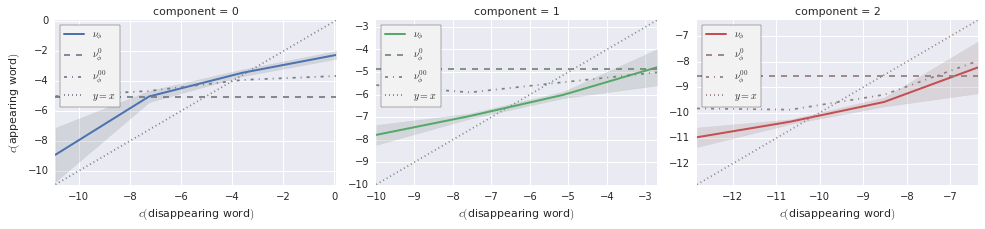

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1912 (cluster-unique) substitutions, but the PCA is in fact computed on 916 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.